In [2]:
import os
import torch
import pandas as pd
from utils.data_processing import *
from utils.statistic_tests import *
from utils.vizualization import *

os.environ['CUDA_VISIBLE_DEVICES'] = "1"
torch.cuda.is_available()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Roberta-base

In [4]:
model = roberta_model
tokenizer = roberta_tokenizer
print(f"{model.config._name_or_path} has {model.config.num_hidden_layers} hidden layers.")

# Preprocessing 
data_df = retrieve_preprocessed_df("../data/en_TaskIndependentData.json",print_ignored=True, tokenizer=tokenizer) 
data_df.head()


roberta-base has 12 hidden layers.
We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
Only MWEs that are tokenized like row['mwe'].split() have been retrieved at this step.      Specifically, we kept MWEs split into 2 tokens, in the singular form, and no different form from the MWE string ('running' != 'run').      To see the ignored rows, set print_ignored=True.
40 rows dropped where MWE not found as sublist in sentence.
There are 1,884 remaining sentences in the dataset.


id         mwe literal_meaning                _1    _2    _3  0/1  \
0  38  sacred cow      divine cow  above criticism   None  None    1   
1  38  sacred cow      divine cow  above criticism   None  None    0   
2  38  sacred cow      divine cow  above criticism   None  None    0   
3  38  sacred cow      divine cow  above criticism   None  None    0   
4  38  sacred cow      divine cow  above criticism   None  None    0   

       fine_grained                                              prior  \
0        divine cow     Like beef, pork is also forbidden in Hinduism.   
1  above criticism   Besides, the Rights group said the Minister of...   
2  above criticism   But in the Macquarie judgment, Judge Sandy Str...   
3  above criticism   The Commissioner of Police, CP Abutu Yaro, who...   
4  above criticism   The committee shall come up with findings and ...   

                                            sentence  \
0  However, unlike the sacred cow, the pig repres...   
1  The Rights group said the ministry has continu...   
2  Barwick says historically there has been littl...   
3  The state police boss also directed the full e...   
4  There is no sacred cow under the law of probit...   

                                               after  \
0  This is considered to be particularly impure a...   
1  HURIWA recalled that the Federal Government on...   
2  The Fair Work Act is clear that employers cann...   
3  No stone would be left unturned because we are...   
4  For a deterrent in future, the Chairman shall ...   

                                        prior_tokens  \
0  [Like, Ġbeef, ,, Ġpork, Ġis, Ġalso, Ġforbidden...   
1  [Besides, ,, Ġthe, ĠRights, Ġgroup, Ġsaid, Ġth...   
2  [But, Ġin, Ġthe, ĠMac, qu, arie, Ġjudgment, ,,...   
3  [The, ĠCommissioner, Ġof, ĠPolice, ,, ĠCP, ĠAb...   
4  [The, Ġcommittee, Ġshall, Ġcome, Ġup, Ġwith, Ġ...   

                                     sentence_tokens  \
0  [However, ,, Ġunlike, Ġthe, Ġsacred, Ġcow, ,, ...   
1  [The, ĠRights, Ġgroup, Ġsaid, Ġthe, Ġministry,...   
2  [Bar, wick, Ġsays, Ġhistorically, Ġthere, Ġhas...   
3  [The, Ġstate, Ġpolice, Ġboss, Ġalso, Ġdirected...   
4  [There, Ġis, Ġno, Ġsacred, Ġcow, Ġunder, Ġthe,...   

                                        after_tokens  tokenized_mwe  \
0  [This, Ġis, Ġconsidered, Ġto, Ġbe, Ġparticular...  [sacred, cow]   
1  [H, URI, WA, Ġrecalled, Ġthat, Ġthe, ĠFederal,...  [sacred, cow]   
2  [The, ĠFair, ĠWork, ĠAct, Ġis, Ġclear, Ġthat, ...  [sacred, cow]   
3  [No, Ġstone, Ġwould, Ġbe, Ġleft, Ġunt, urned, ...  [sacred, cow]   
4  [For, Ġa, Ġdeterrent, Ġin, Ġfuture, ,, Ġthe, Ġ...  [sacred, cow]   

                          normalized_sentence_tokens  
0  [However, ,, unlike, the, sacred, cow, ,, the,...  
1  [The, Rights, group, said, the, ministry, has,...  
2  [Bar, wick, says, historically, there, has, be...  
3  [The, state, police, boss, also, directed, the...  
4  [There, is, no, sacred, cow, under, the, law, ...

In [5]:
selected_pairs, pair_info = create_literal_idiomatic_pairs(data_df, unique_occurrences=False)
pair_df = get_pair_info_df(pair_info)
pair_df['difference'] = pair_df.apply(lambda row: compute_difference(row, 'literal', 'idiomatic'), axis=1)
pair_df['most_represented'] = pair_df.apply(get_most_represented, axis=1)
pair_df = pair_df[(pair_df['literal'] > 3) & (pair_df['idiomatic'] > 3)]

pair_df = pair_df.sort_index()
pair_df

mwe              literal  idiomatic  difference most_represented
acid test              7          9           2        idiomatic
ancient history       15          7           8          literal
bad hat                9          8           1          literal
best man              10         10           0            equal
big fish               7          4           3          literal
blue blood             4         13           9        idiomatic
brass ring             9         16           7        idiomatic
brick wall             9          6           3          literal
closed book            7          8           1        idiomatic
cutting edge           7         11           4        idiomatic
dry land               5         16          11        idiomatic
fine line              7          6           1          literal
ground floor          19          5          14          literal
rocket science         5         10           5        idiomatic
silver spoon           8          5           3          literal

[acid test] Layer 0
Training accuracy: 75% => not linearly separable
[acid test] Layer 1
Training accuracy: 88% => not linearly separable
[acid test] Layer 2
Training accuracy: 75% => not linearly separable
[acid test] Layer 3
Training accuracy: 100% => linearly separable
[acid test] Layer 4
Training accuracy: 62% => not linearly separable
[acid test] Layer 5
Training accuracy: 44% => not linearly separable
[acid test] Layer 6
Training accuracy: 44% => not linearly separable
[acid test] Layer 7
Training accuracy: 75% => not linearly separable
[acid test] Layer 8
Training accuracy: 75% => not linearly separable
[acid test] Layer 9
Training accuracy: 81% => not linearly separable
[acid test] Layer 10
Training accuracy: 100% => linearly separable
[acid test] Layer 11
Training accuracy: 100% => linearly separable
[acid test] Layer 12
Training accuracy: 75% => not linearly separable


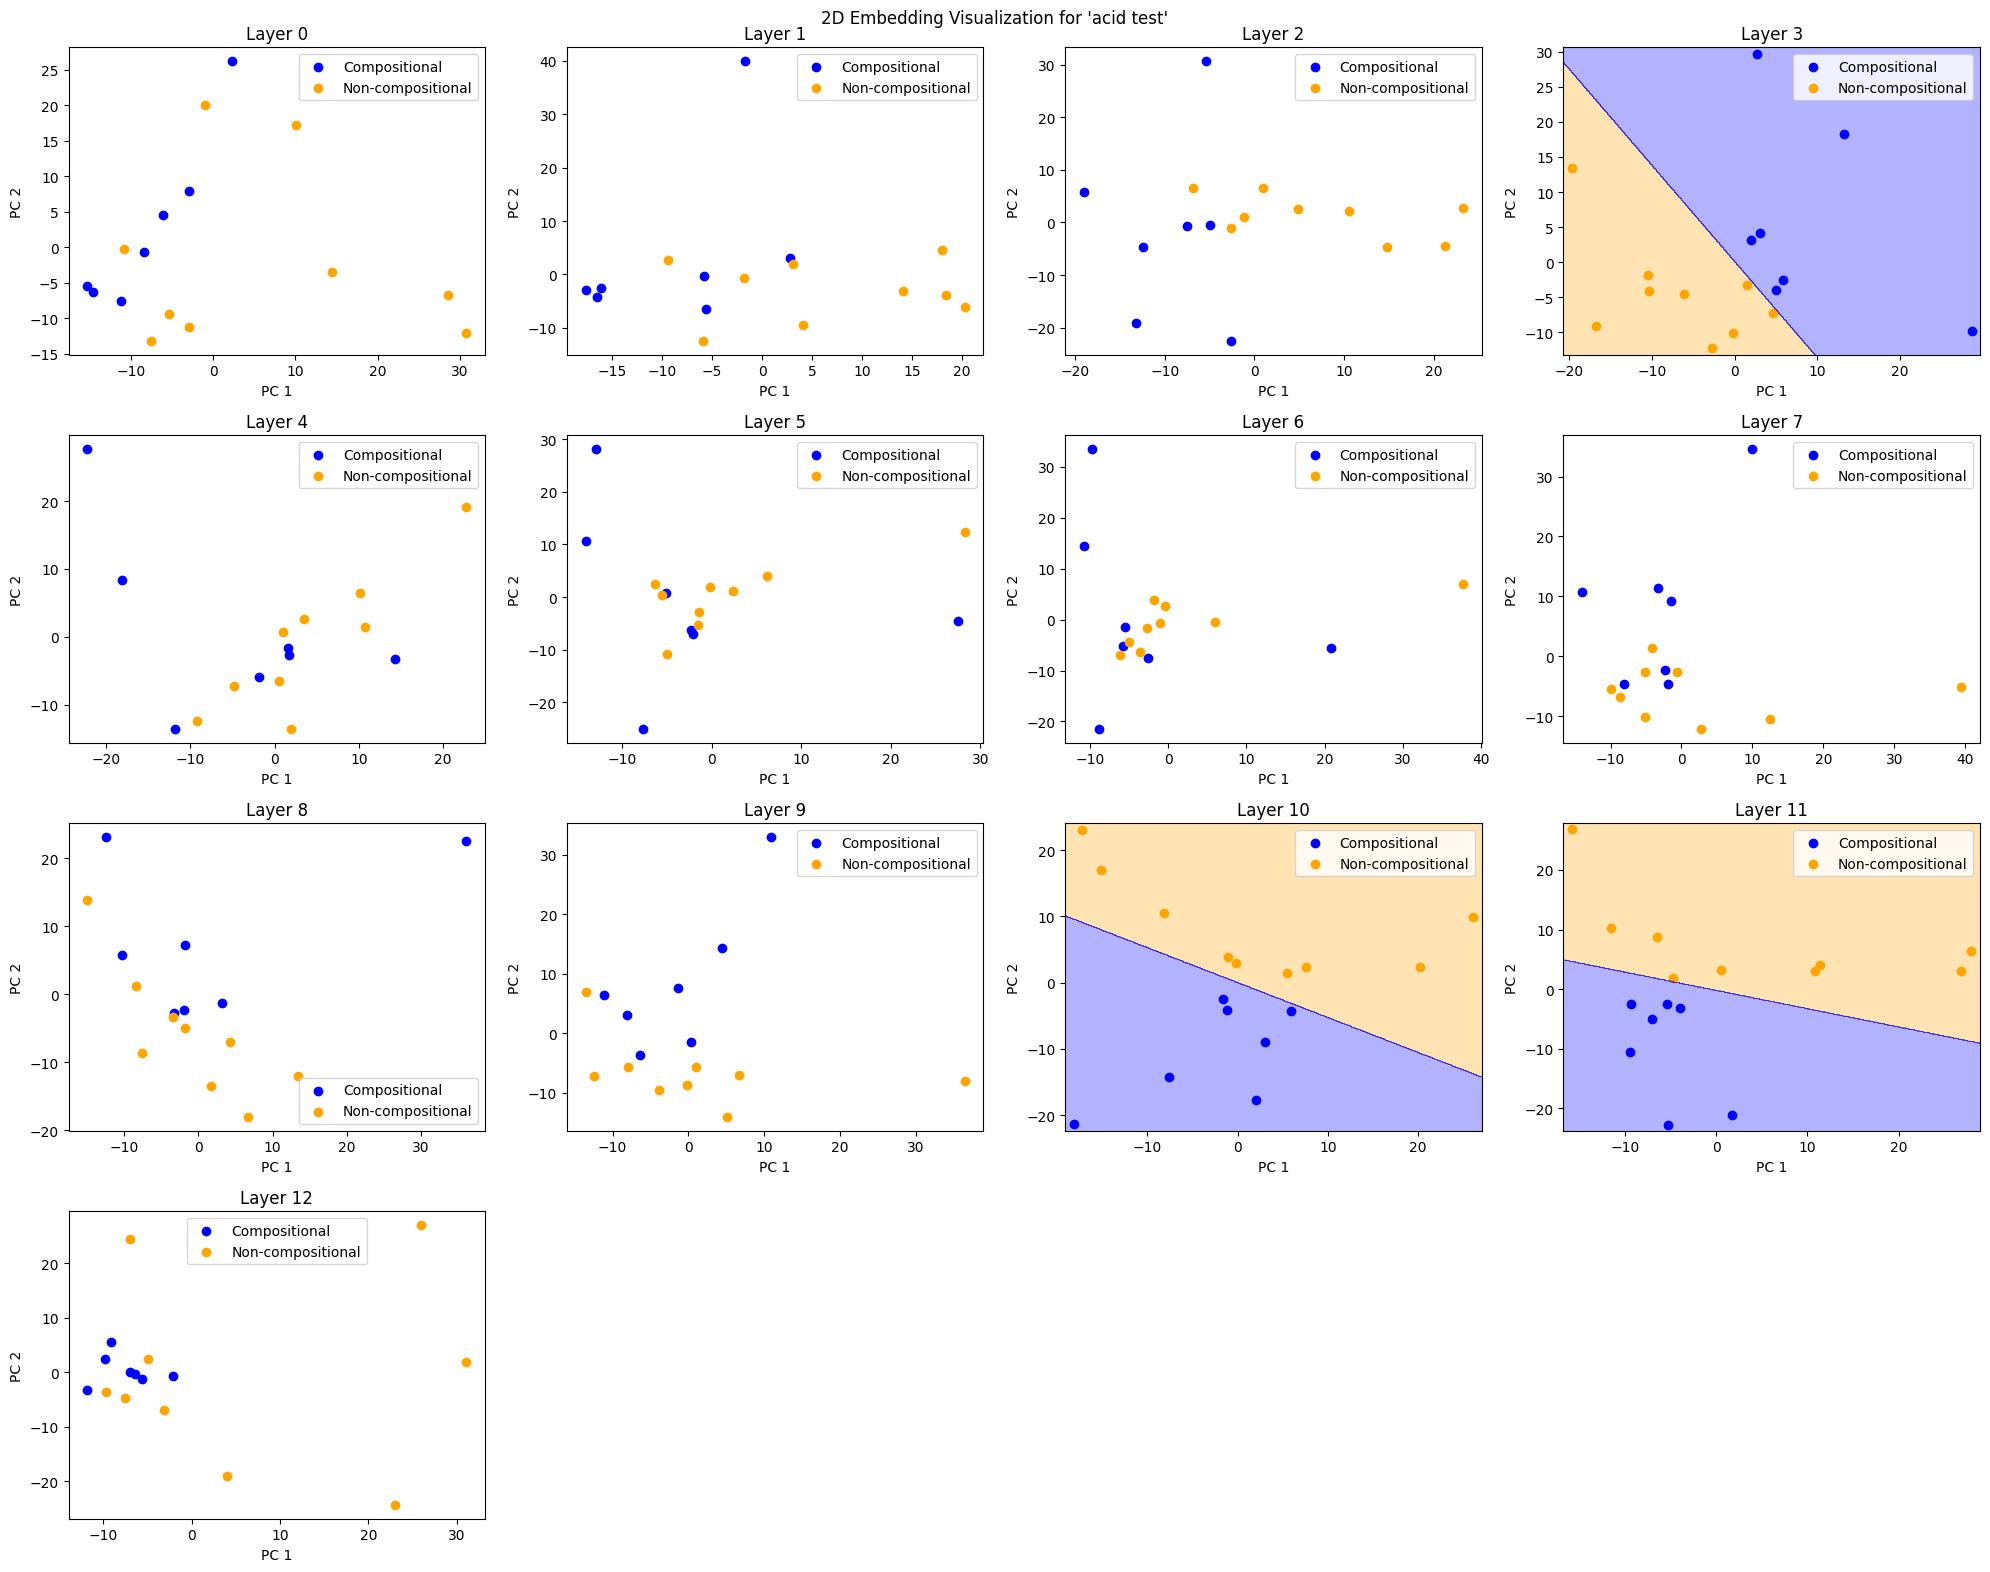

[ancient history] Layer 0
Training accuracy: 68% => not linearly separable
[ancient history] Layer 1
Training accuracy: 77% => not linearly separable
[ancient history] Layer 2
Training accuracy: 68% => not linearly separable
[ancient history] Layer 3
Training accuracy: 82% => not linearly separable
[ancient history] Layer 4
Training accuracy: 73% => not linearly separable
[ancient history] Layer 5
Training accuracy: 77% => not linearly separable
[ancient history] Layer 6
Training accuracy: 86% => not linearly separable
[ancient history] Layer 7
Training accuracy: 82% => not linearly separable
[ancient history] Layer 8
Training accuracy: 86% => not linearly separable
[ancient history] Layer 9
Training accuracy: 64% => not linearly separable
[ancient history] Layer 10
Training accuracy: 73% => not linearly separable
[ancient history] Layer 11
Training accuracy: 77% => not linearly separable
[ancient history] Layer 12
Training accuracy: 73% => not linearly separable


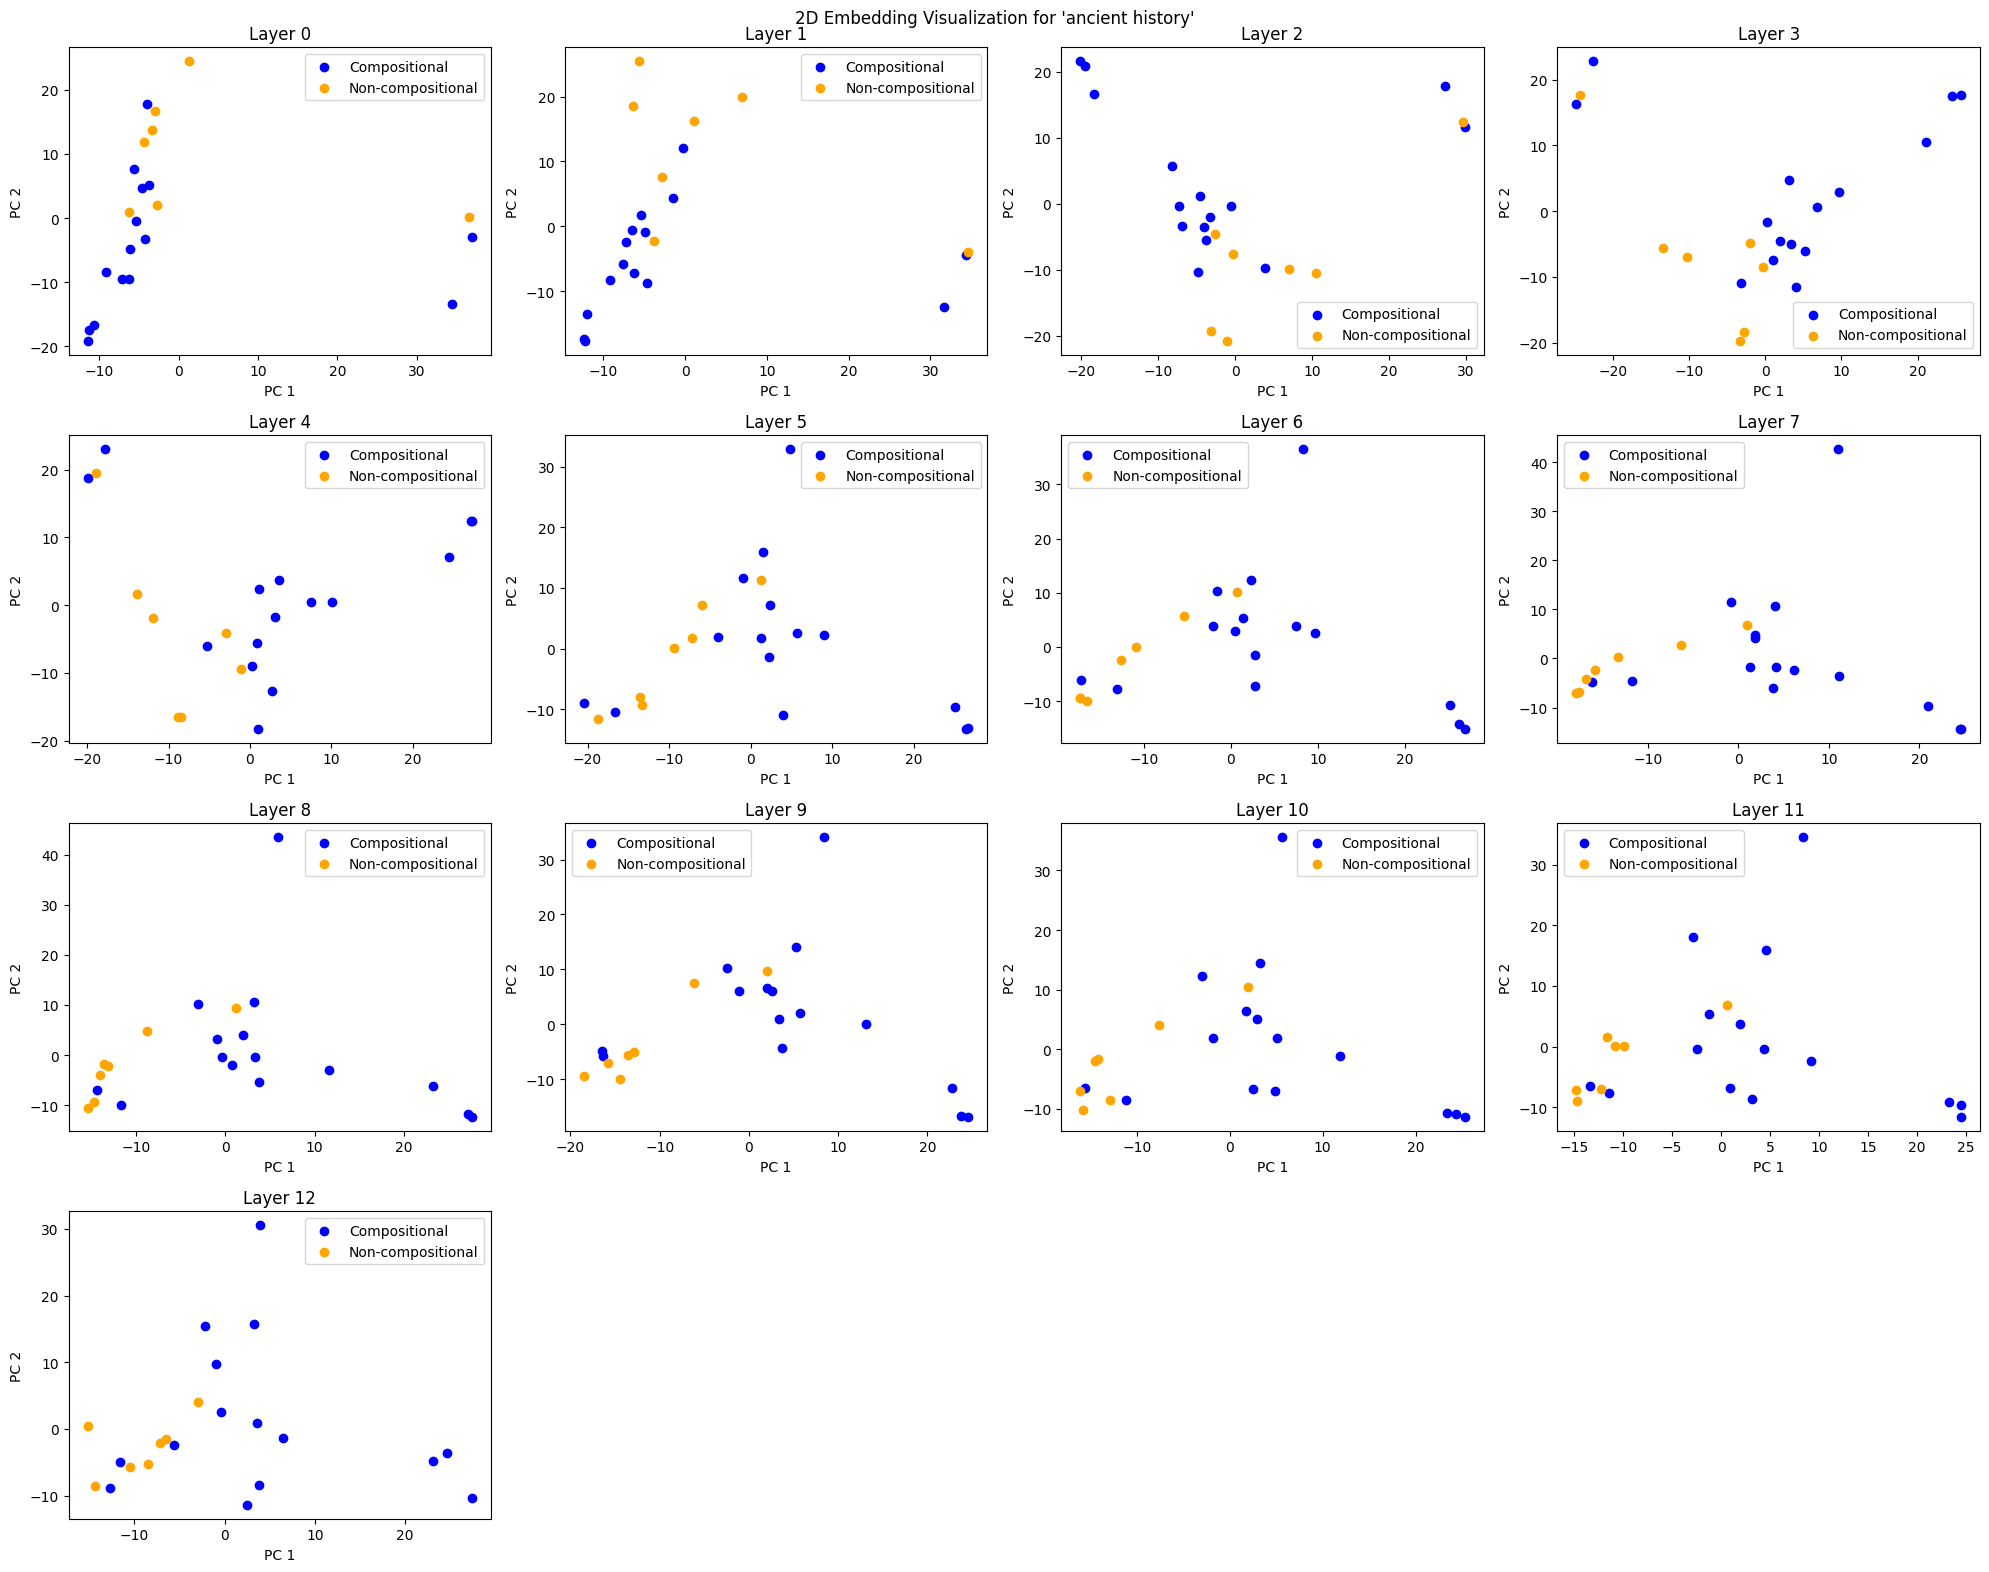

[bad hat] Layer 0
Training accuracy: 67% => not linearly separable
[bad hat] Layer 1
Training accuracy: 53% => not linearly separable
[bad hat] Layer 2
Training accuracy: 67% => not linearly separable
[bad hat] Layer 3
Training accuracy: 73% => not linearly separable
[bad hat] Layer 4
Training accuracy: 73% => not linearly separable
[bad hat] Layer 5
Training accuracy: 27% => not linearly separable
[bad hat] Layer 6
Training accuracy: 80% => not linearly separable
[bad hat] Layer 7
Training accuracy: 73% => not linearly separable
[bad hat] Layer 8
Training accuracy: 73% => not linearly separable
[bad hat] Layer 9
Training accuracy: 73% => not linearly separable
[bad hat] Layer 10
Training accuracy: 87% => not linearly separable
[bad hat] Layer 11
Training accuracy: 87% => not linearly separable
[bad hat] Layer 12
Training accuracy: 53% => not linearly separable


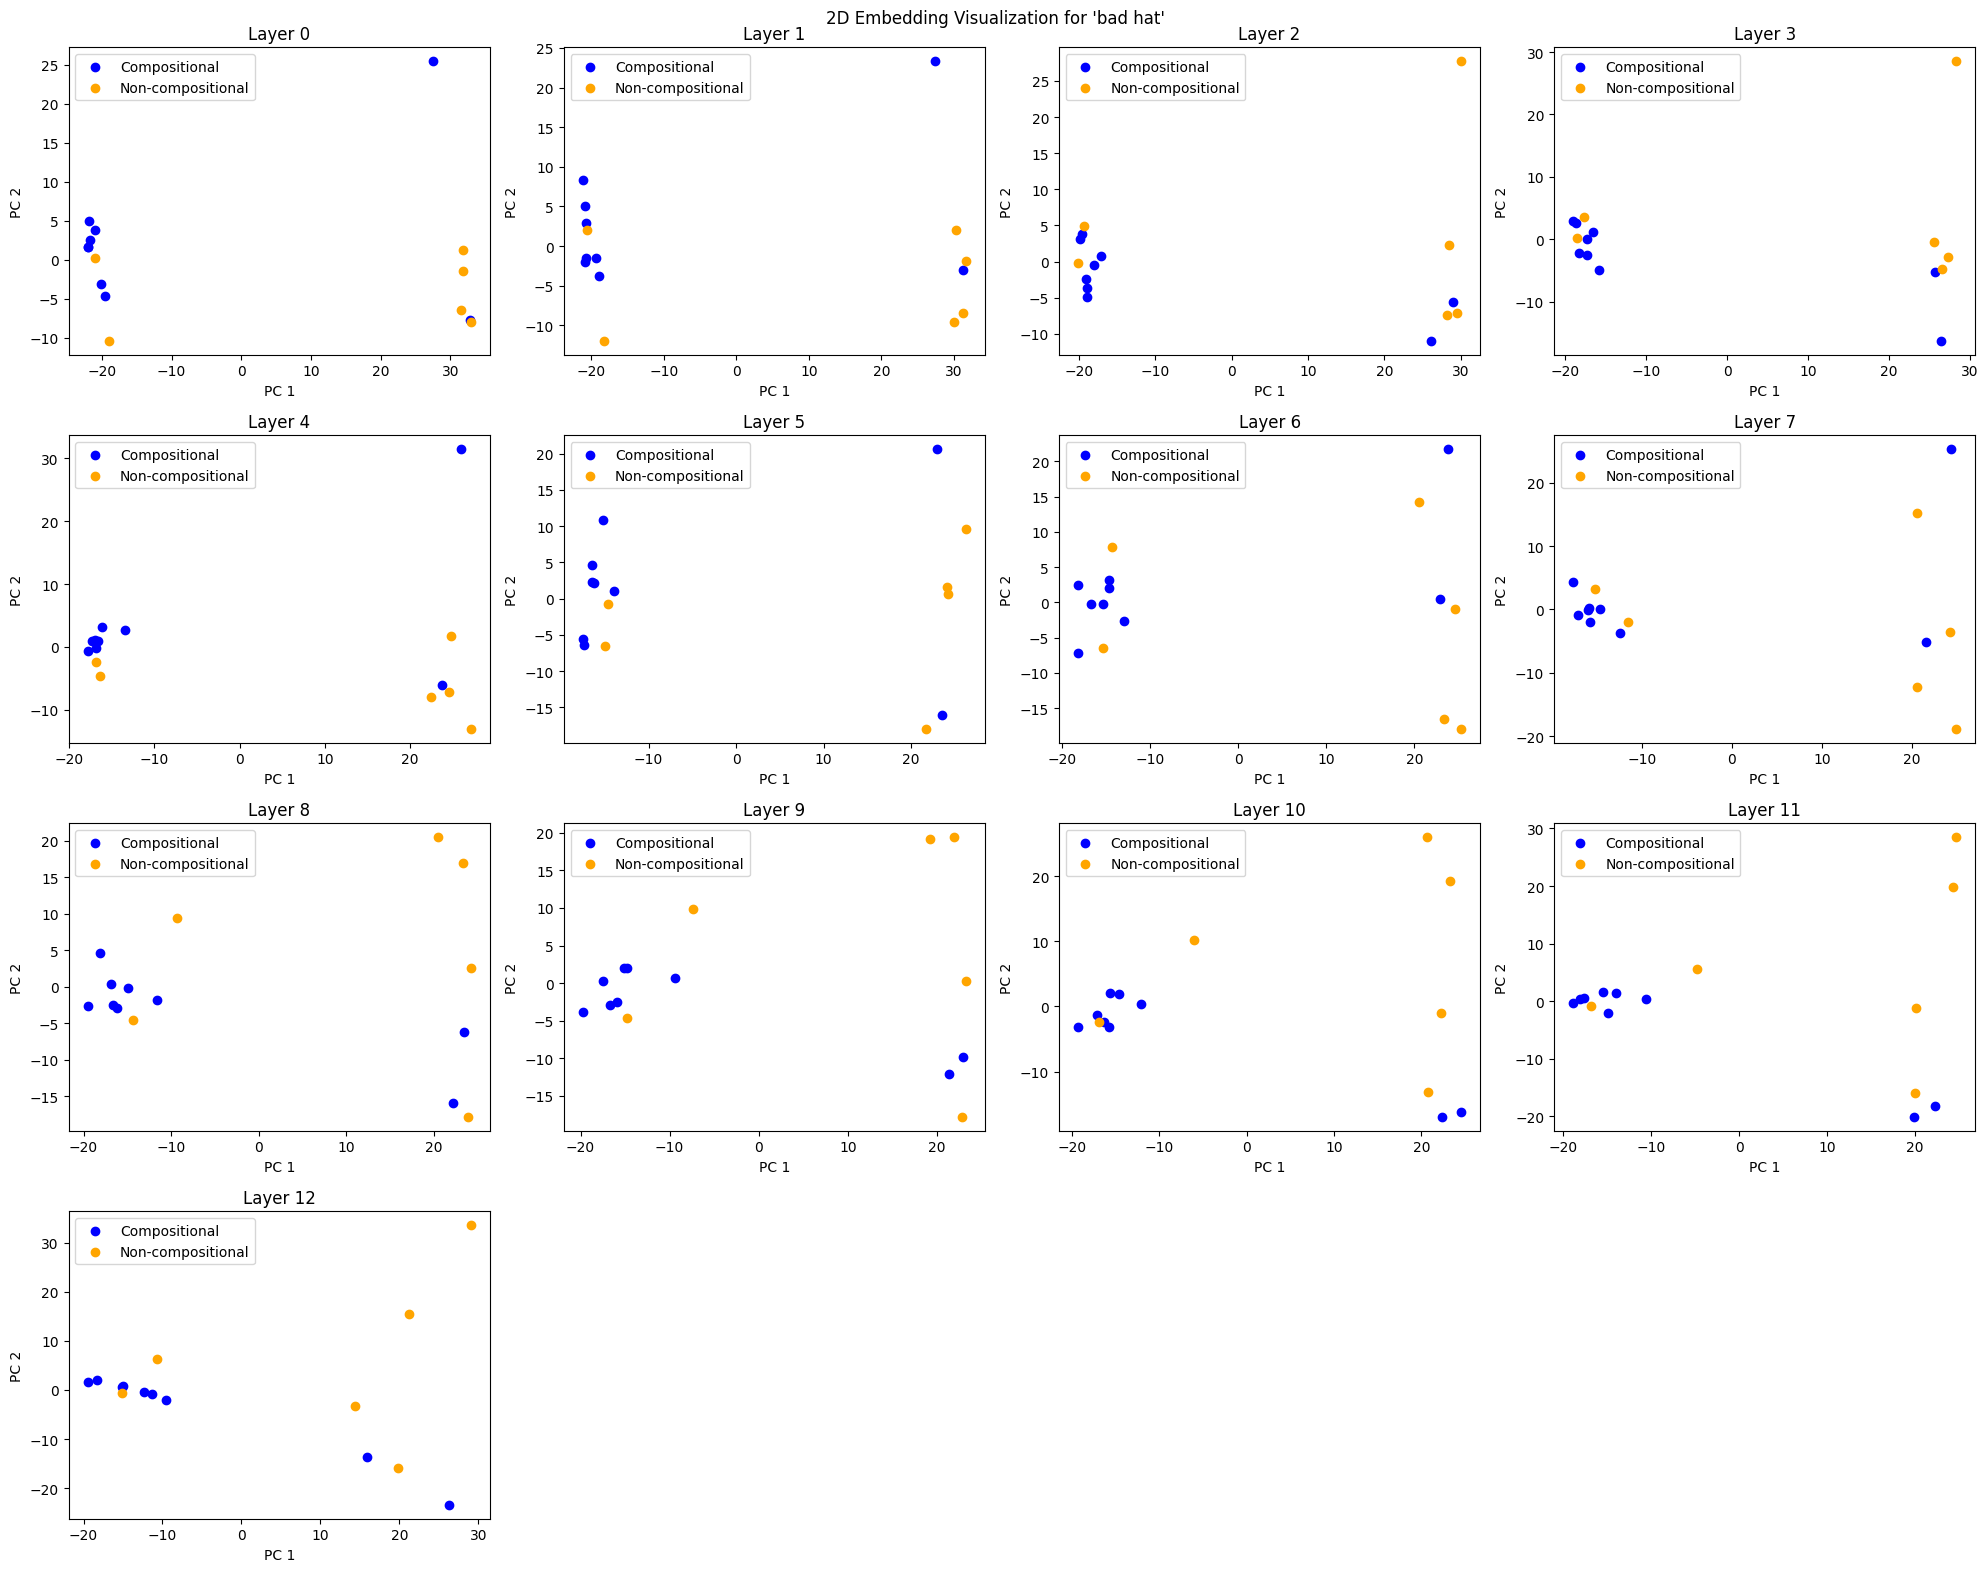

[best man] Layer 0
Training accuracy: 100% => linearly separable
[best man] Layer 1
Training accuracy: 84% => not linearly separable
[best man] Layer 2
Training accuracy: 63% => not linearly separable
[best man] Layer 3
Training accuracy: 95% => not linearly separable
[best man] Layer 4
Training accuracy: 95% => not linearly separable
[best man] Layer 5
Training accuracy: 84% => not linearly separable
[best man] Layer 6
Training accuracy: 95% => not linearly separable
[best man] Layer 7
Training accuracy: 89% => not linearly separable
[best man] Layer 8
Training accuracy: 84% => not linearly separable
[best man] Layer 9
Training accuracy: 84% => not linearly separable
[best man] Layer 10
Training accuracy: 95% => not linearly separable
[best man] Layer 11
Training accuracy: 79% => not linearly separable
[best man] Layer 12
Training accuracy: 84% => not linearly separable


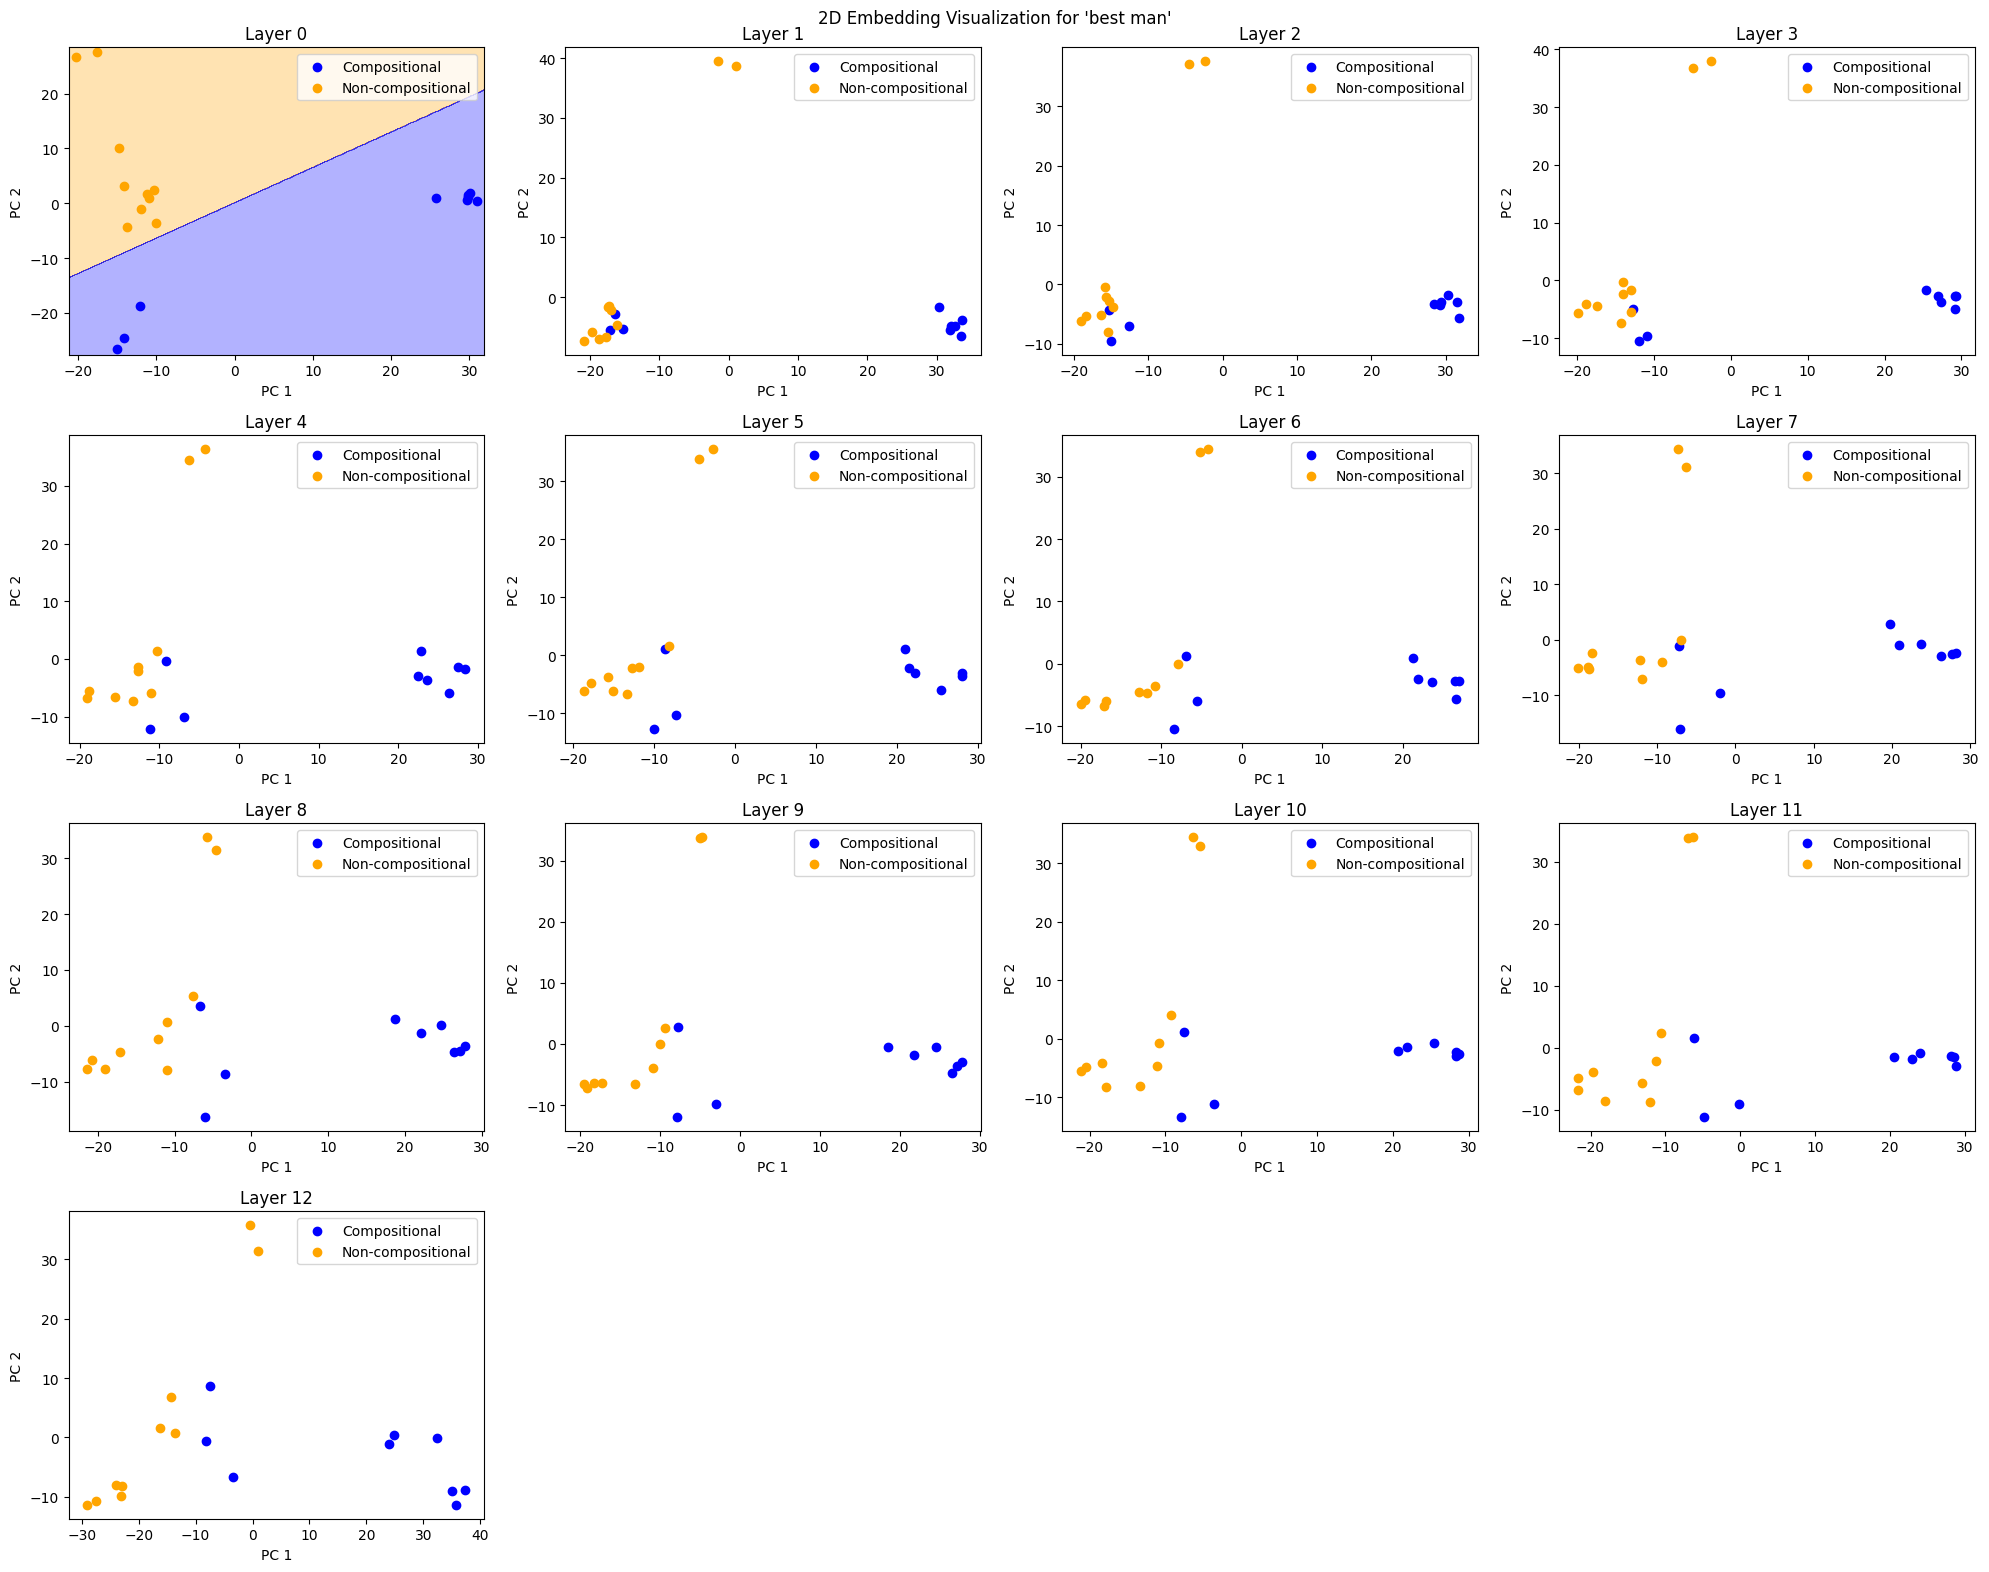

[big fish] Layer 0
Training accuracy: 73% => not linearly separable
[big fish] Layer 1
Training accuracy: 45% => not linearly separable
[big fish] Layer 2
Training accuracy: 45% => not linearly separable
[big fish] Layer 3
Training accuracy: 64% => not linearly separable
[big fish] Layer 4
Training accuracy: 64% => not linearly separable
[big fish] Layer 5
Training accuracy: 64% => not linearly separable
[big fish] Layer 6
Training accuracy: 82% => not linearly separable
[big fish] Layer 7
Training accuracy: 82% => not linearly separable
[big fish] Layer 8
Training accuracy: 91% => not linearly separable
[big fish] Layer 9
Training accuracy: 64% => not linearly separable
[big fish] Layer 10
Training accuracy: 91% => not linearly separable
[big fish] Layer 11
Training accuracy: 64% => not linearly separable
[big fish] Layer 12
Training accuracy: 91% => not linearly separable


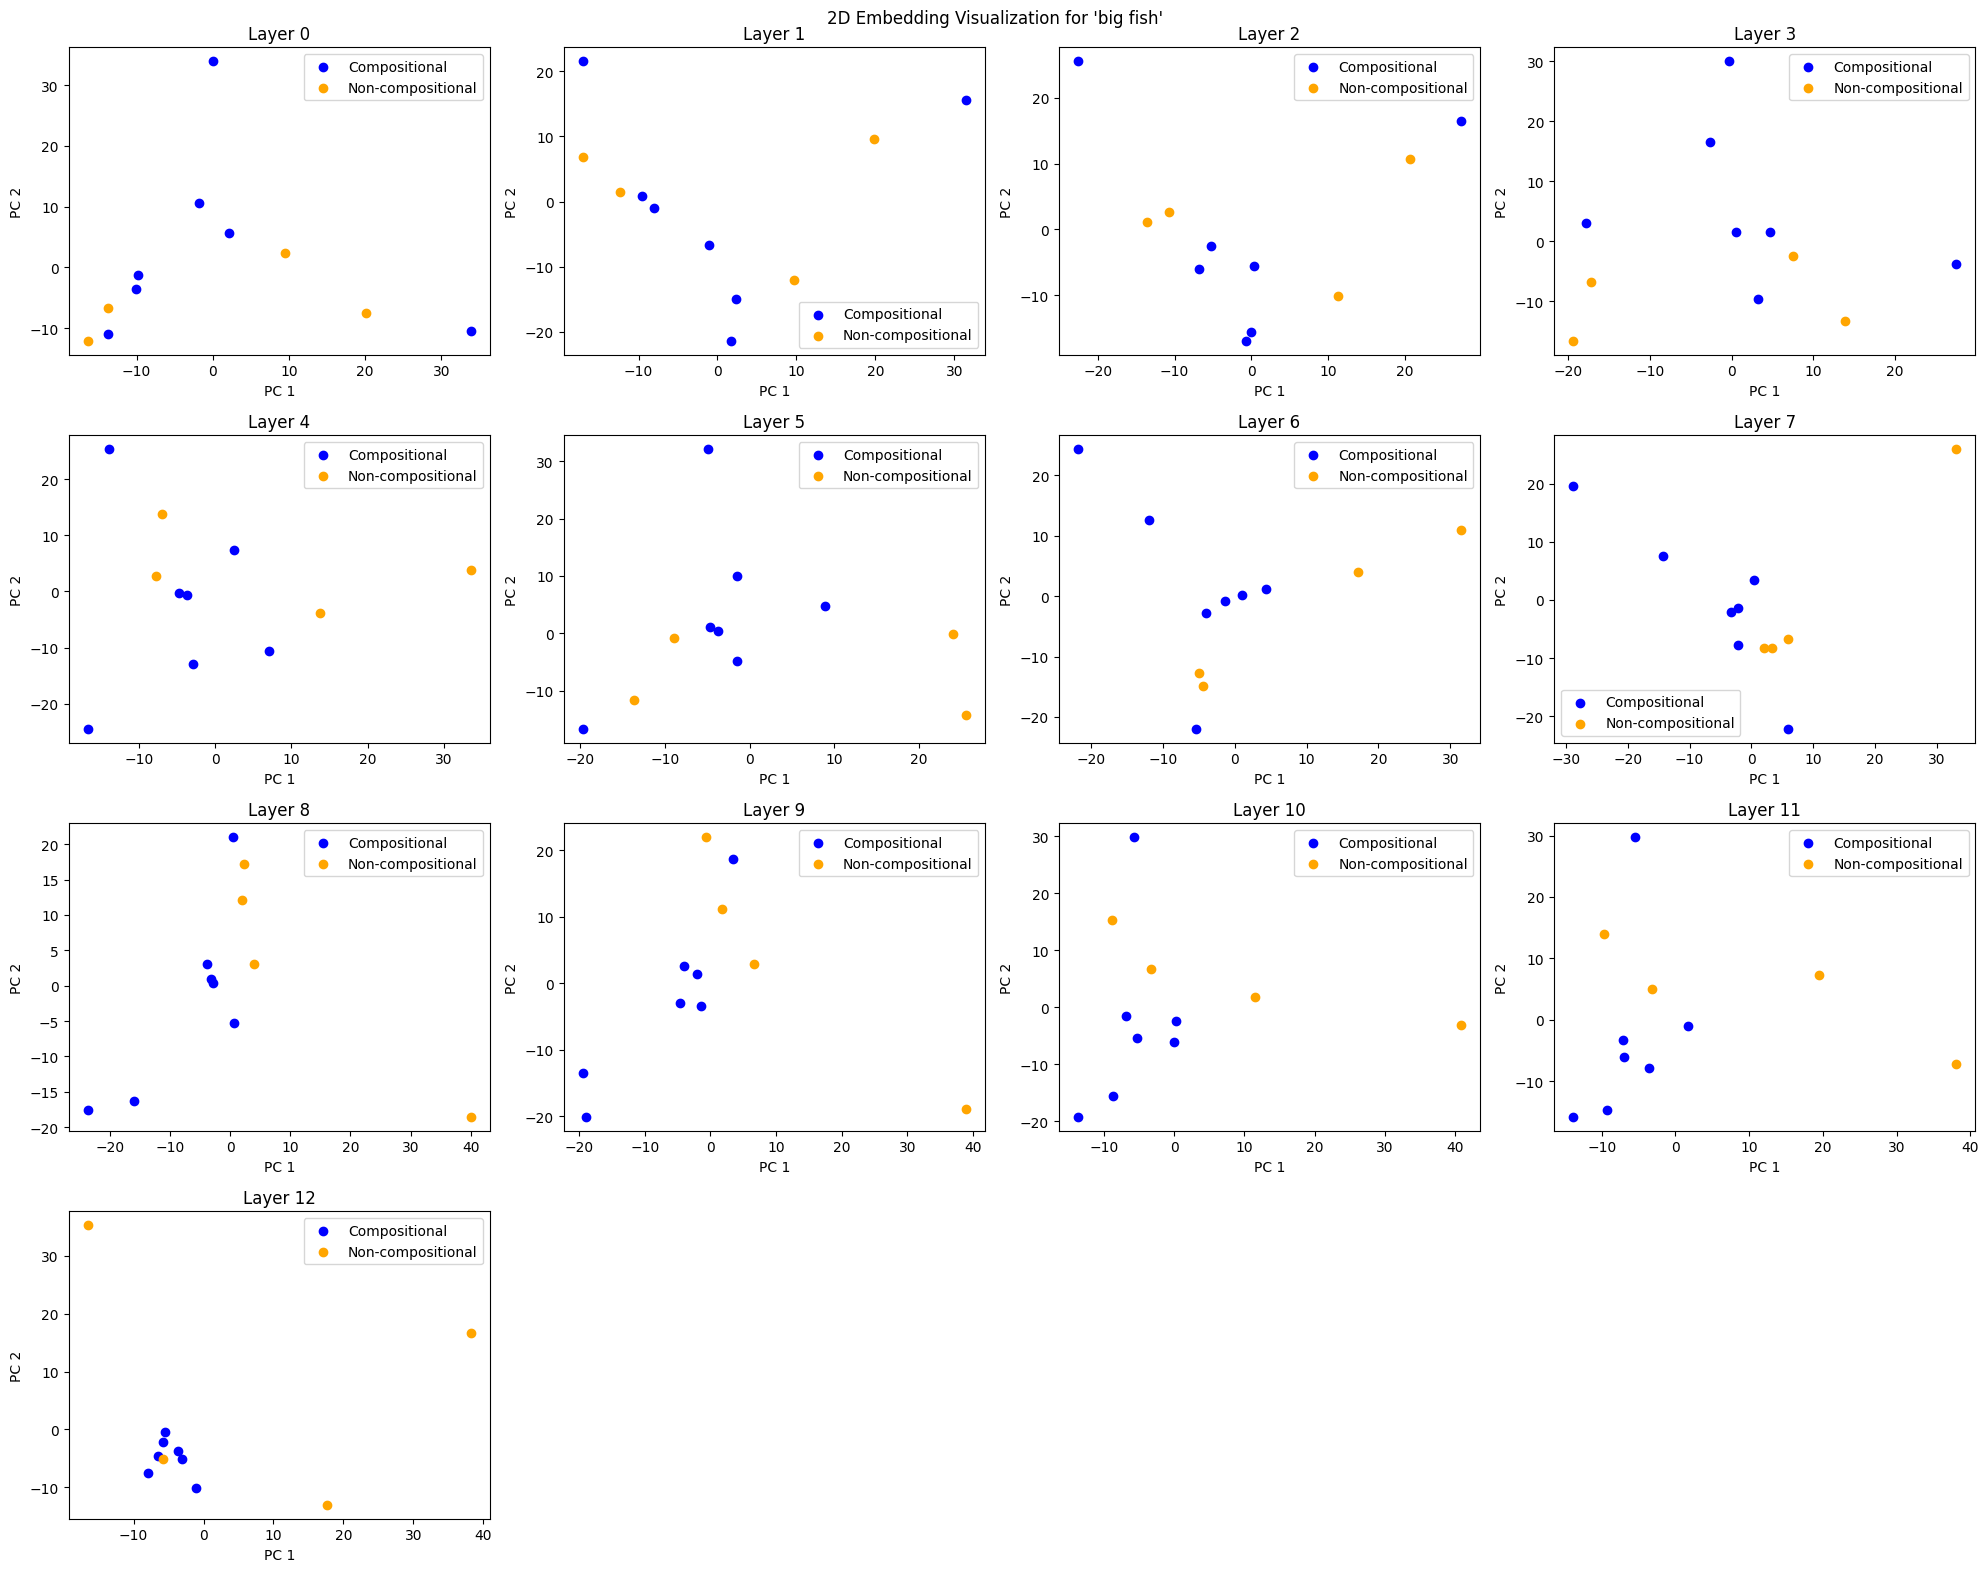

[blue blood] Layer 0
Training accuracy: 88% => not linearly separable
[blue blood] Layer 1
Training accuracy: 94% => not linearly separable
[blue blood] Layer 2
Training accuracy: 94% => not linearly separable
[blue blood] Layer 3
Training accuracy: 94% => not linearly separable
[blue blood] Layer 4
Training accuracy: 94% => not linearly separable
[blue blood] Layer 5
Training accuracy: 100% => linearly separable
[blue blood] Layer 6
Training accuracy: 94% => not linearly separable
[blue blood] Layer 7
Training accuracy: 94% => not linearly separable
[blue blood] Layer 8
Training accuracy: 88% => not linearly separable
[blue blood] Layer 9
Training accuracy: 94% => not linearly separable
[blue blood] Layer 10
Training accuracy: 94% => not linearly separable
[blue blood] Layer 11
Training accuracy: 76% => not linearly separable
[blue blood] Layer 12
Training accuracy: 76% => not linearly separable


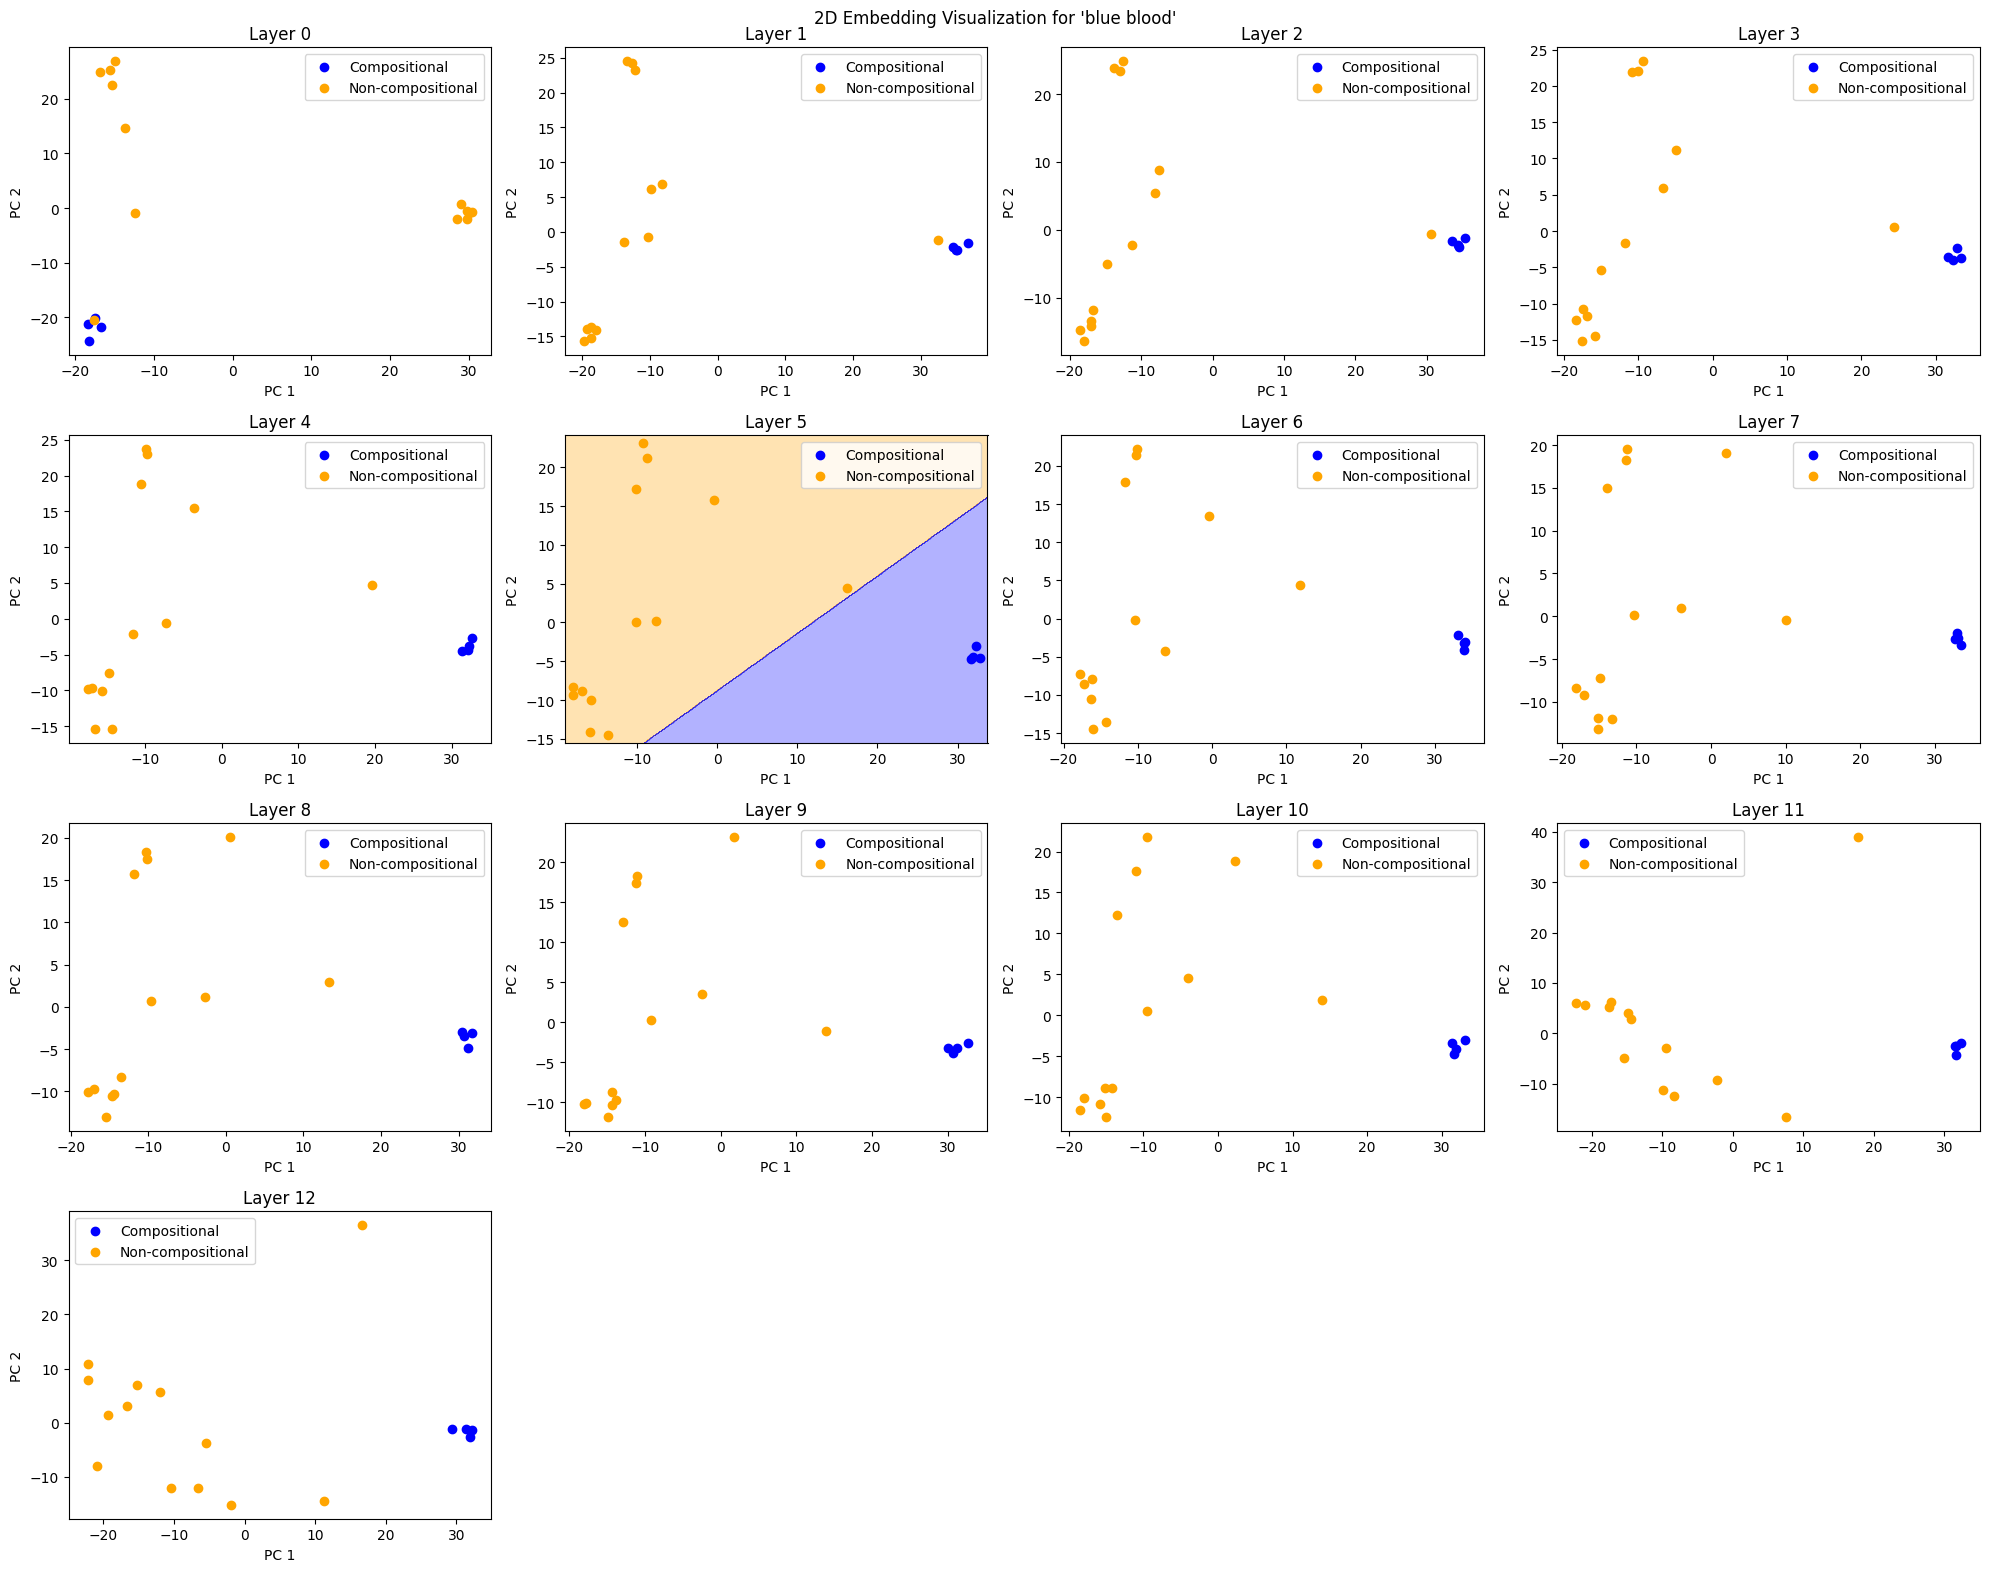

[brass ring] Layer 0
Training accuracy: 52% => not linearly separable
[brass ring] Layer 1
Training accuracy: 72% => not linearly separable
[brass ring] Layer 2
Training accuracy: 72% => not linearly separable
[brass ring] Layer 3
Training accuracy: 80% => not linearly separable
[brass ring] Layer 4
Training accuracy: 80% => not linearly separable
[brass ring] Layer 5
Training accuracy: 88% => not linearly separable
[brass ring] Layer 6
Training accuracy: 80% => not linearly separable
[brass ring] Layer 7
Training accuracy: 92% => not linearly separable
[brass ring] Layer 8
Training accuracy: 88% => not linearly separable
[brass ring] Layer 9
Training accuracy: 84% => not linearly separable
[brass ring] Layer 10
Training accuracy: 76% => not linearly separable
[brass ring] Layer 11
Training accuracy: 84% => not linearly separable
[brass ring] Layer 12
Training accuracy: 56% => not linearly separable


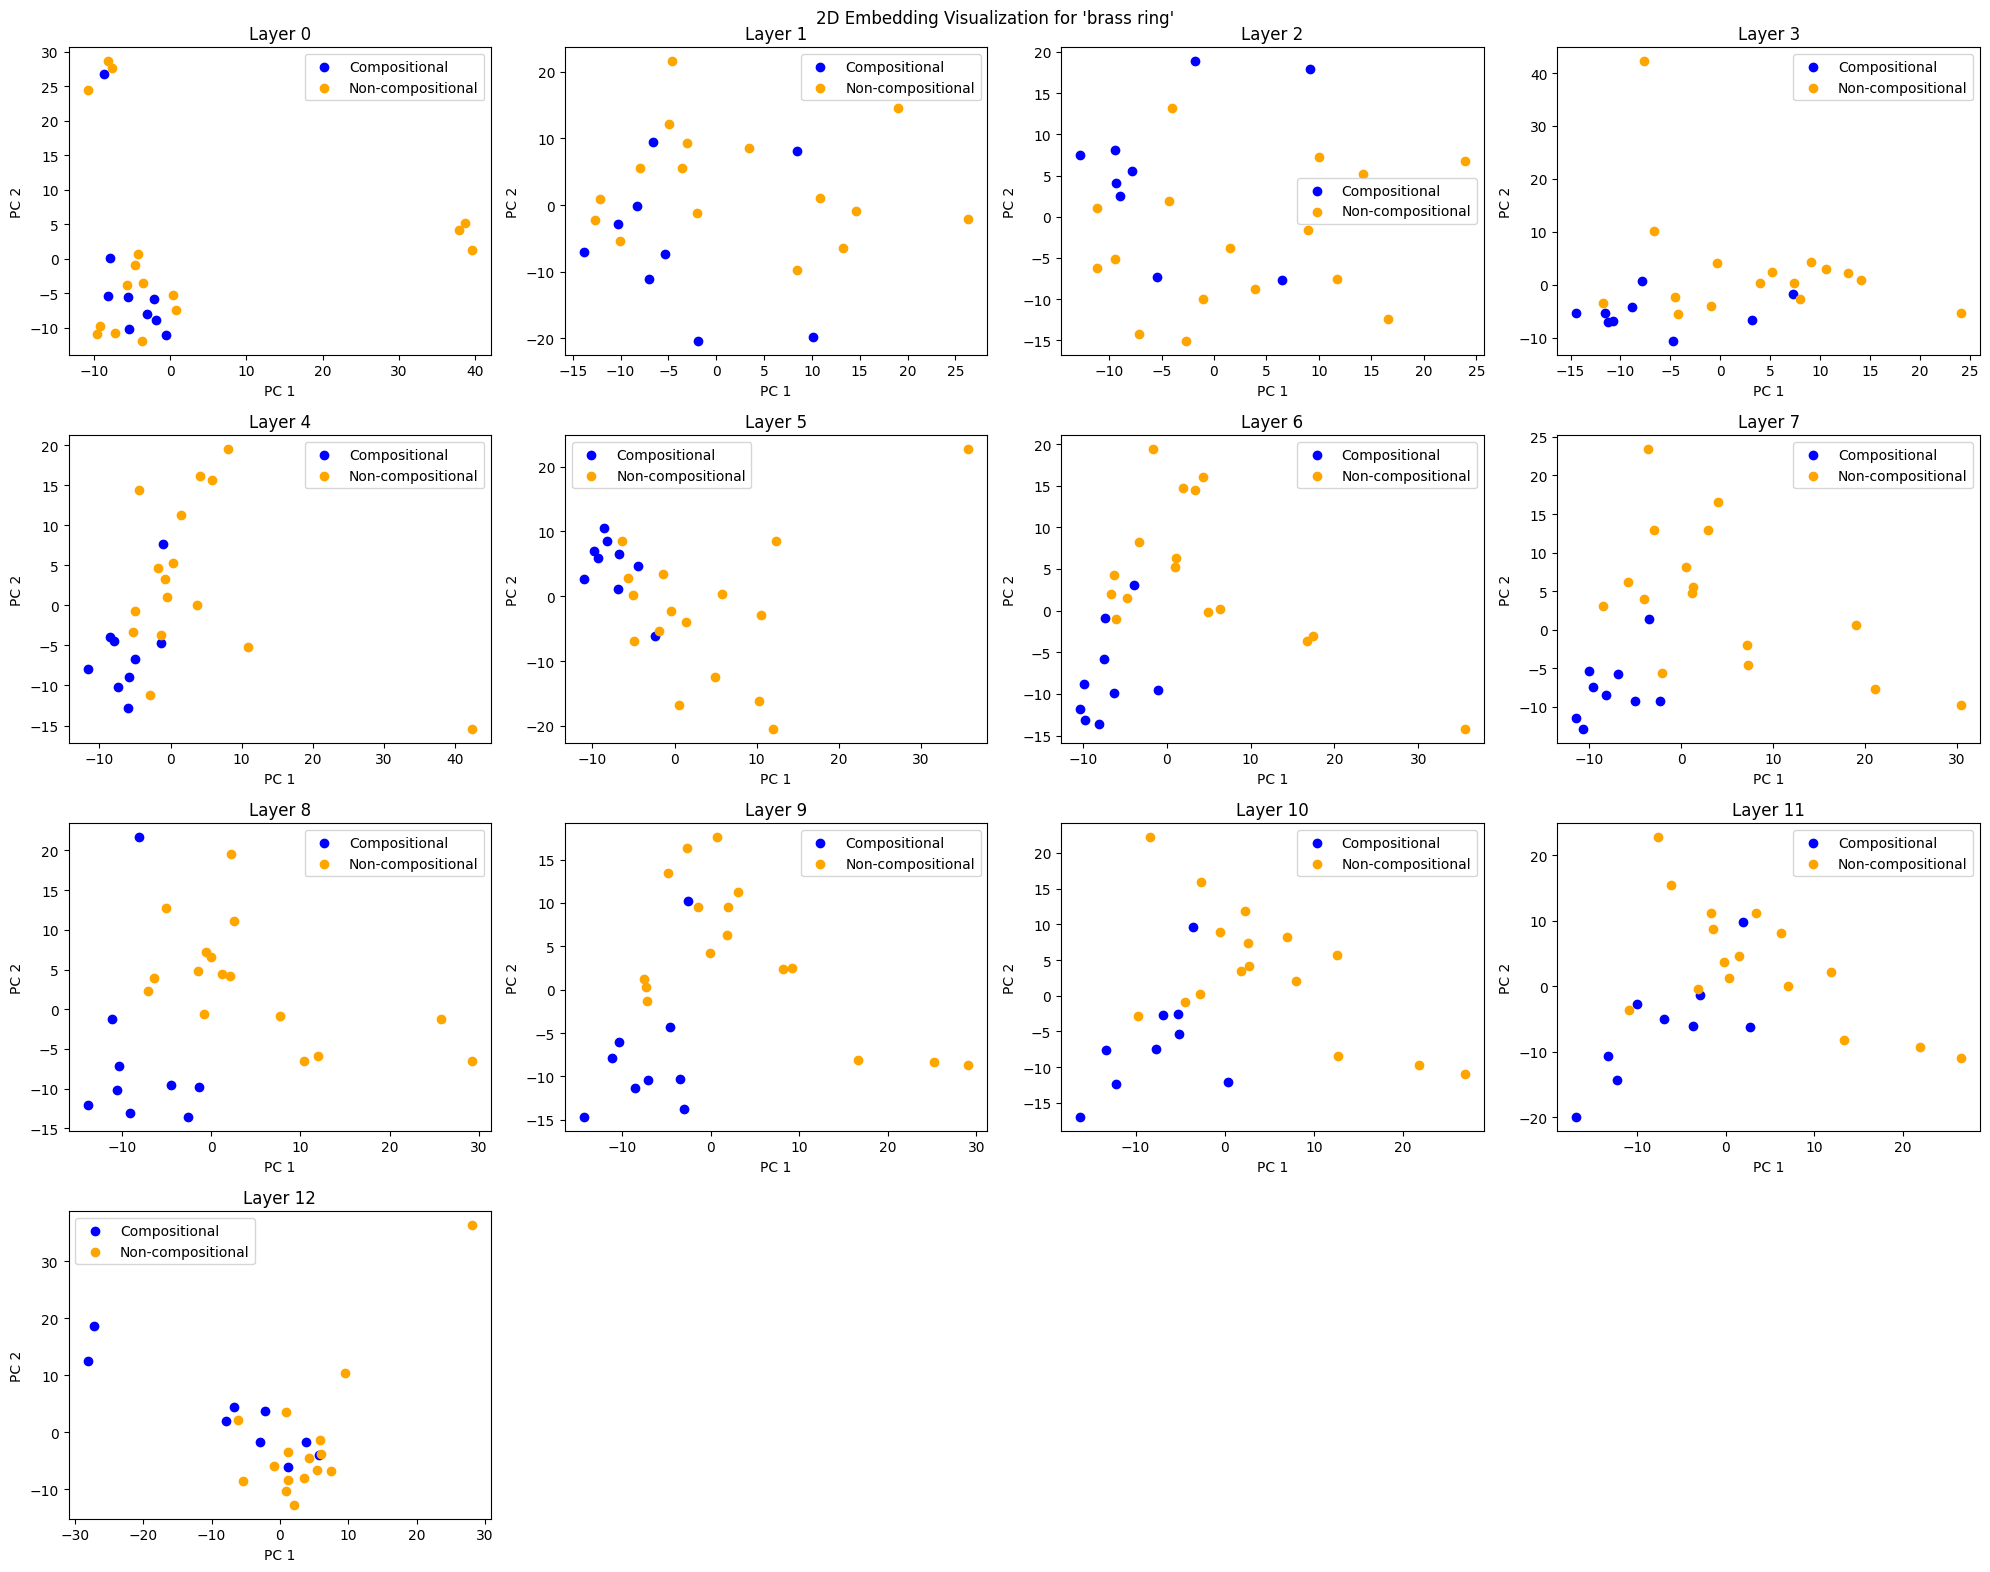

[brick wall] Layer 0
Training accuracy: 93% => not linearly separable
[brick wall] Layer 1
Training accuracy: 93% => not linearly separable
[brick wall] Layer 2
Training accuracy: 93% => not linearly separable
[brick wall] Layer 3
Training accuracy: 93% => not linearly separable
[brick wall] Layer 4
Training accuracy: 93% => not linearly separable
[brick wall] Layer 5
Training accuracy: 93% => not linearly separable
[brick wall] Layer 6
Training accuracy: 93% => not linearly separable
[brick wall] Layer 7
Training accuracy: 80% => not linearly separable
[brick wall] Layer 8
Training accuracy: 93% => not linearly separable
[brick wall] Layer 9
Training accuracy: 93% => not linearly separable
[brick wall] Layer 10
Training accuracy: 93% => not linearly separable
[brick wall] Layer 11
Training accuracy: 93% => not linearly separable
[brick wall] Layer 12
Training accuracy: 93% => not linearly separable


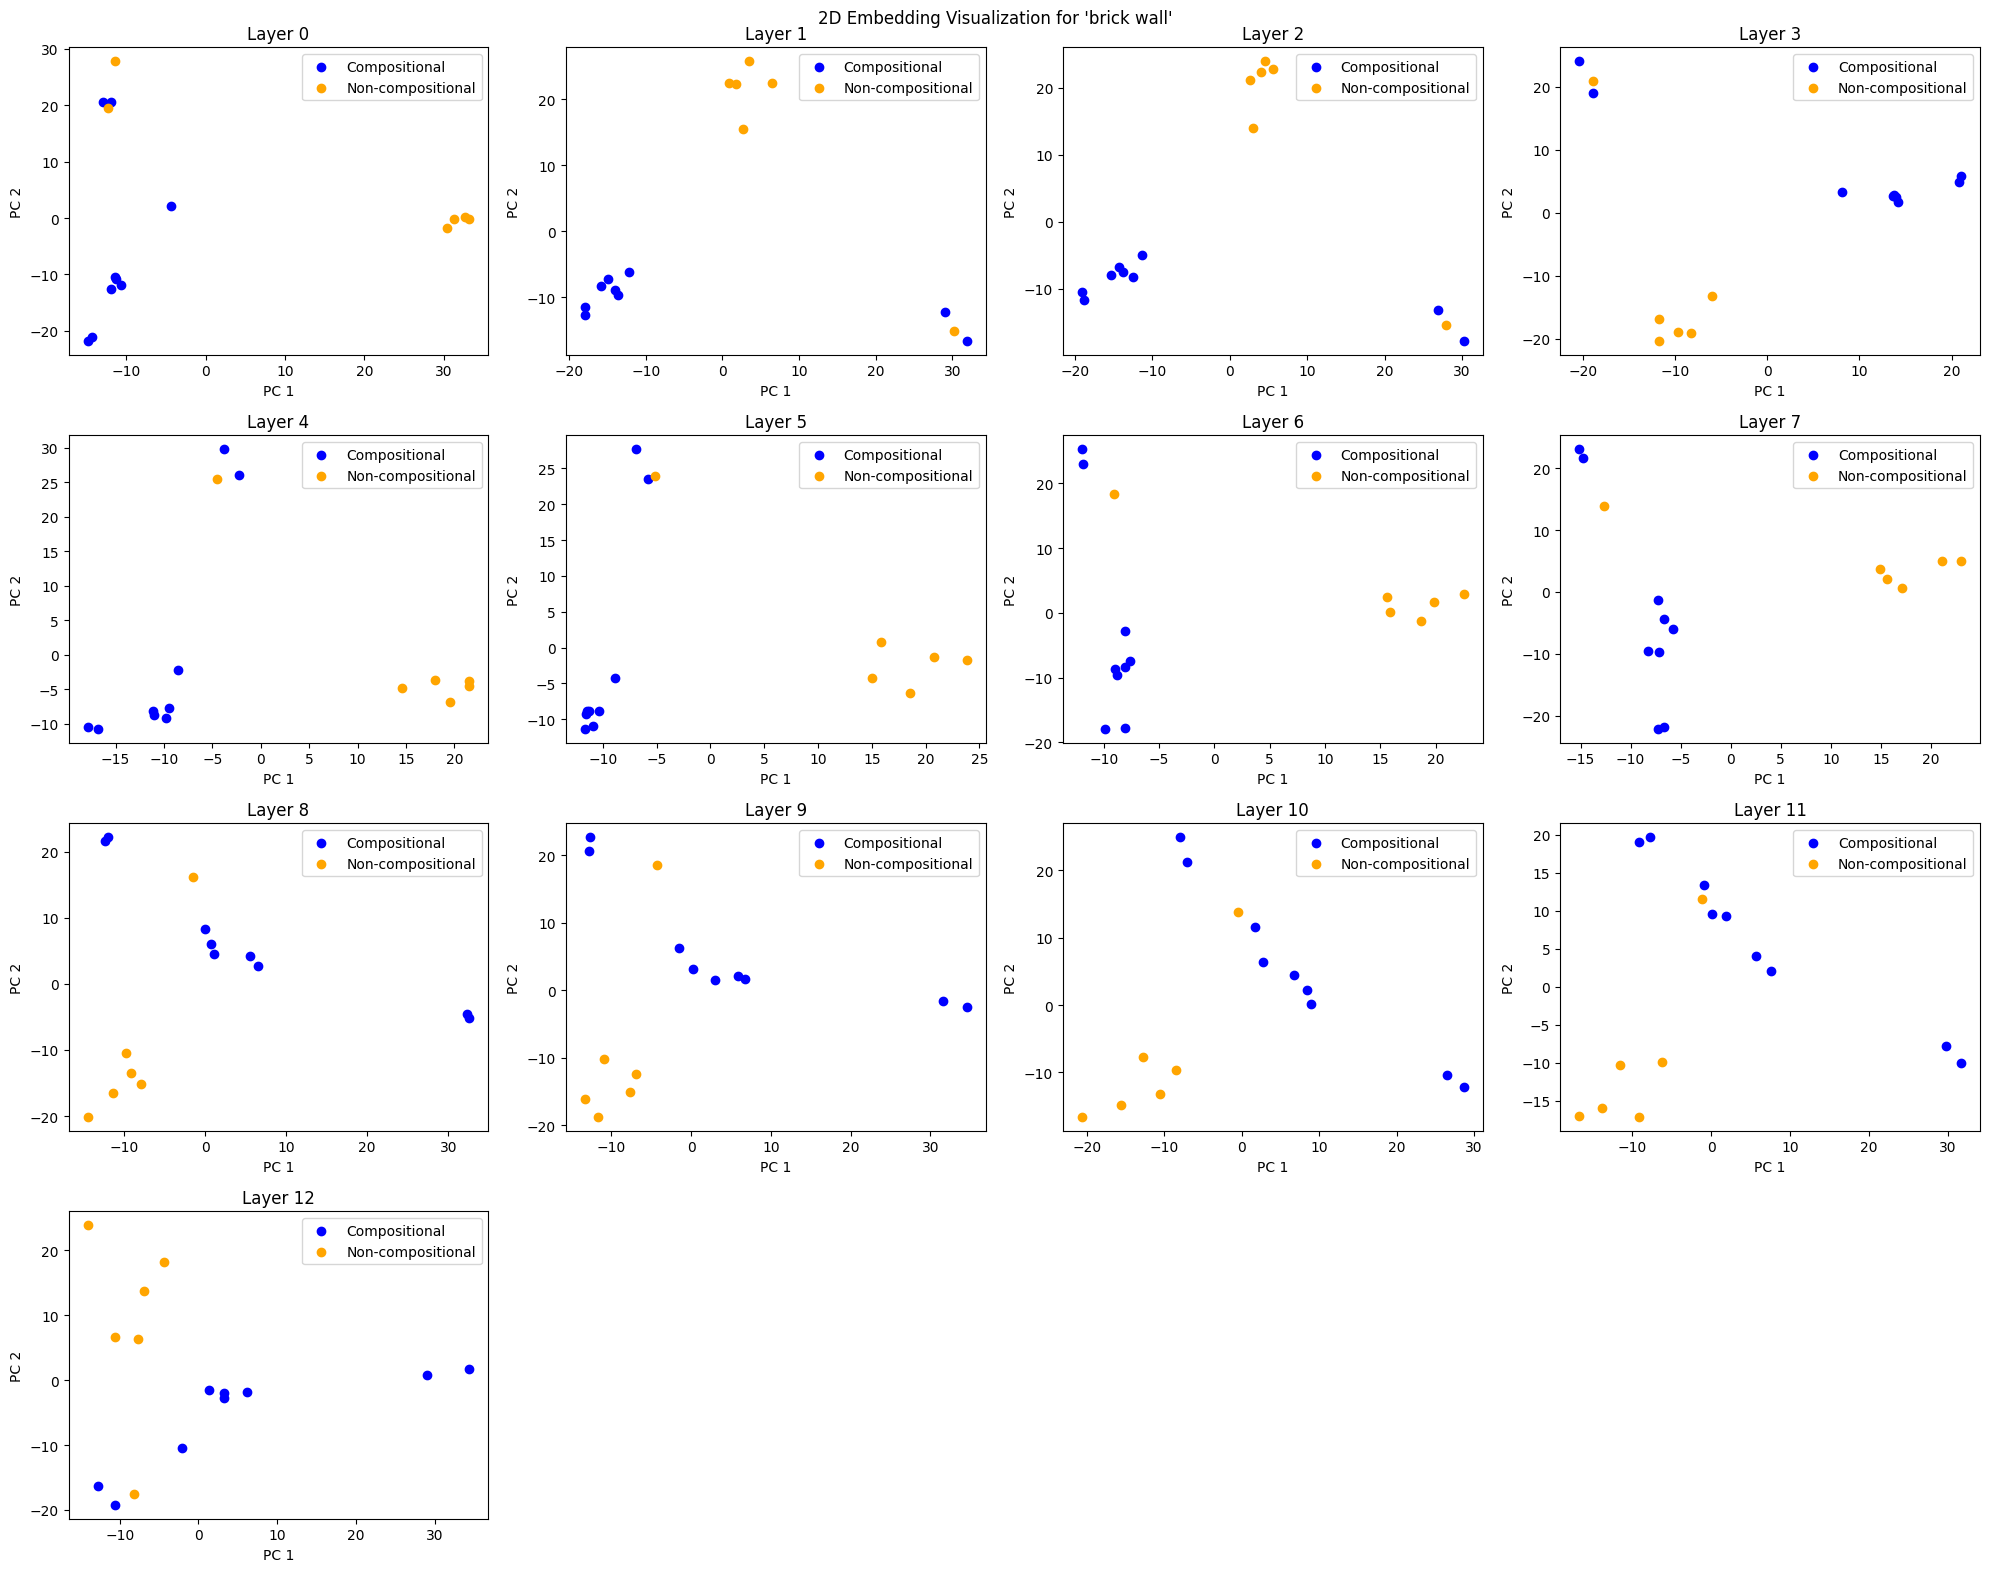

[closed book] Layer 0
Training accuracy: 67% => not linearly separable
[closed book] Layer 1
Training accuracy: 80% => not linearly separable
[closed book] Layer 2
Training accuracy: 87% => not linearly separable
[closed book] Layer 3
Training accuracy: 87% => not linearly separable
[closed book] Layer 4
Training accuracy: 93% => not linearly separable
[closed book] Layer 5
Training accuracy: 100% => linearly separable
[closed book] Layer 6
Training accuracy: 100% => linearly separable
[closed book] Layer 7
Training accuracy: 100% => linearly separable
[closed book] Layer 8
Training accuracy: 100% => linearly separable
[closed book] Layer 9
Training accuracy: 100% => linearly separable
[closed book] Layer 10
Training accuracy: 93% => not linearly separable
[closed book] Layer 11
Training accuracy: 80% => not linearly separable
[closed book] Layer 12
Training accuracy: 93% => not linearly separable


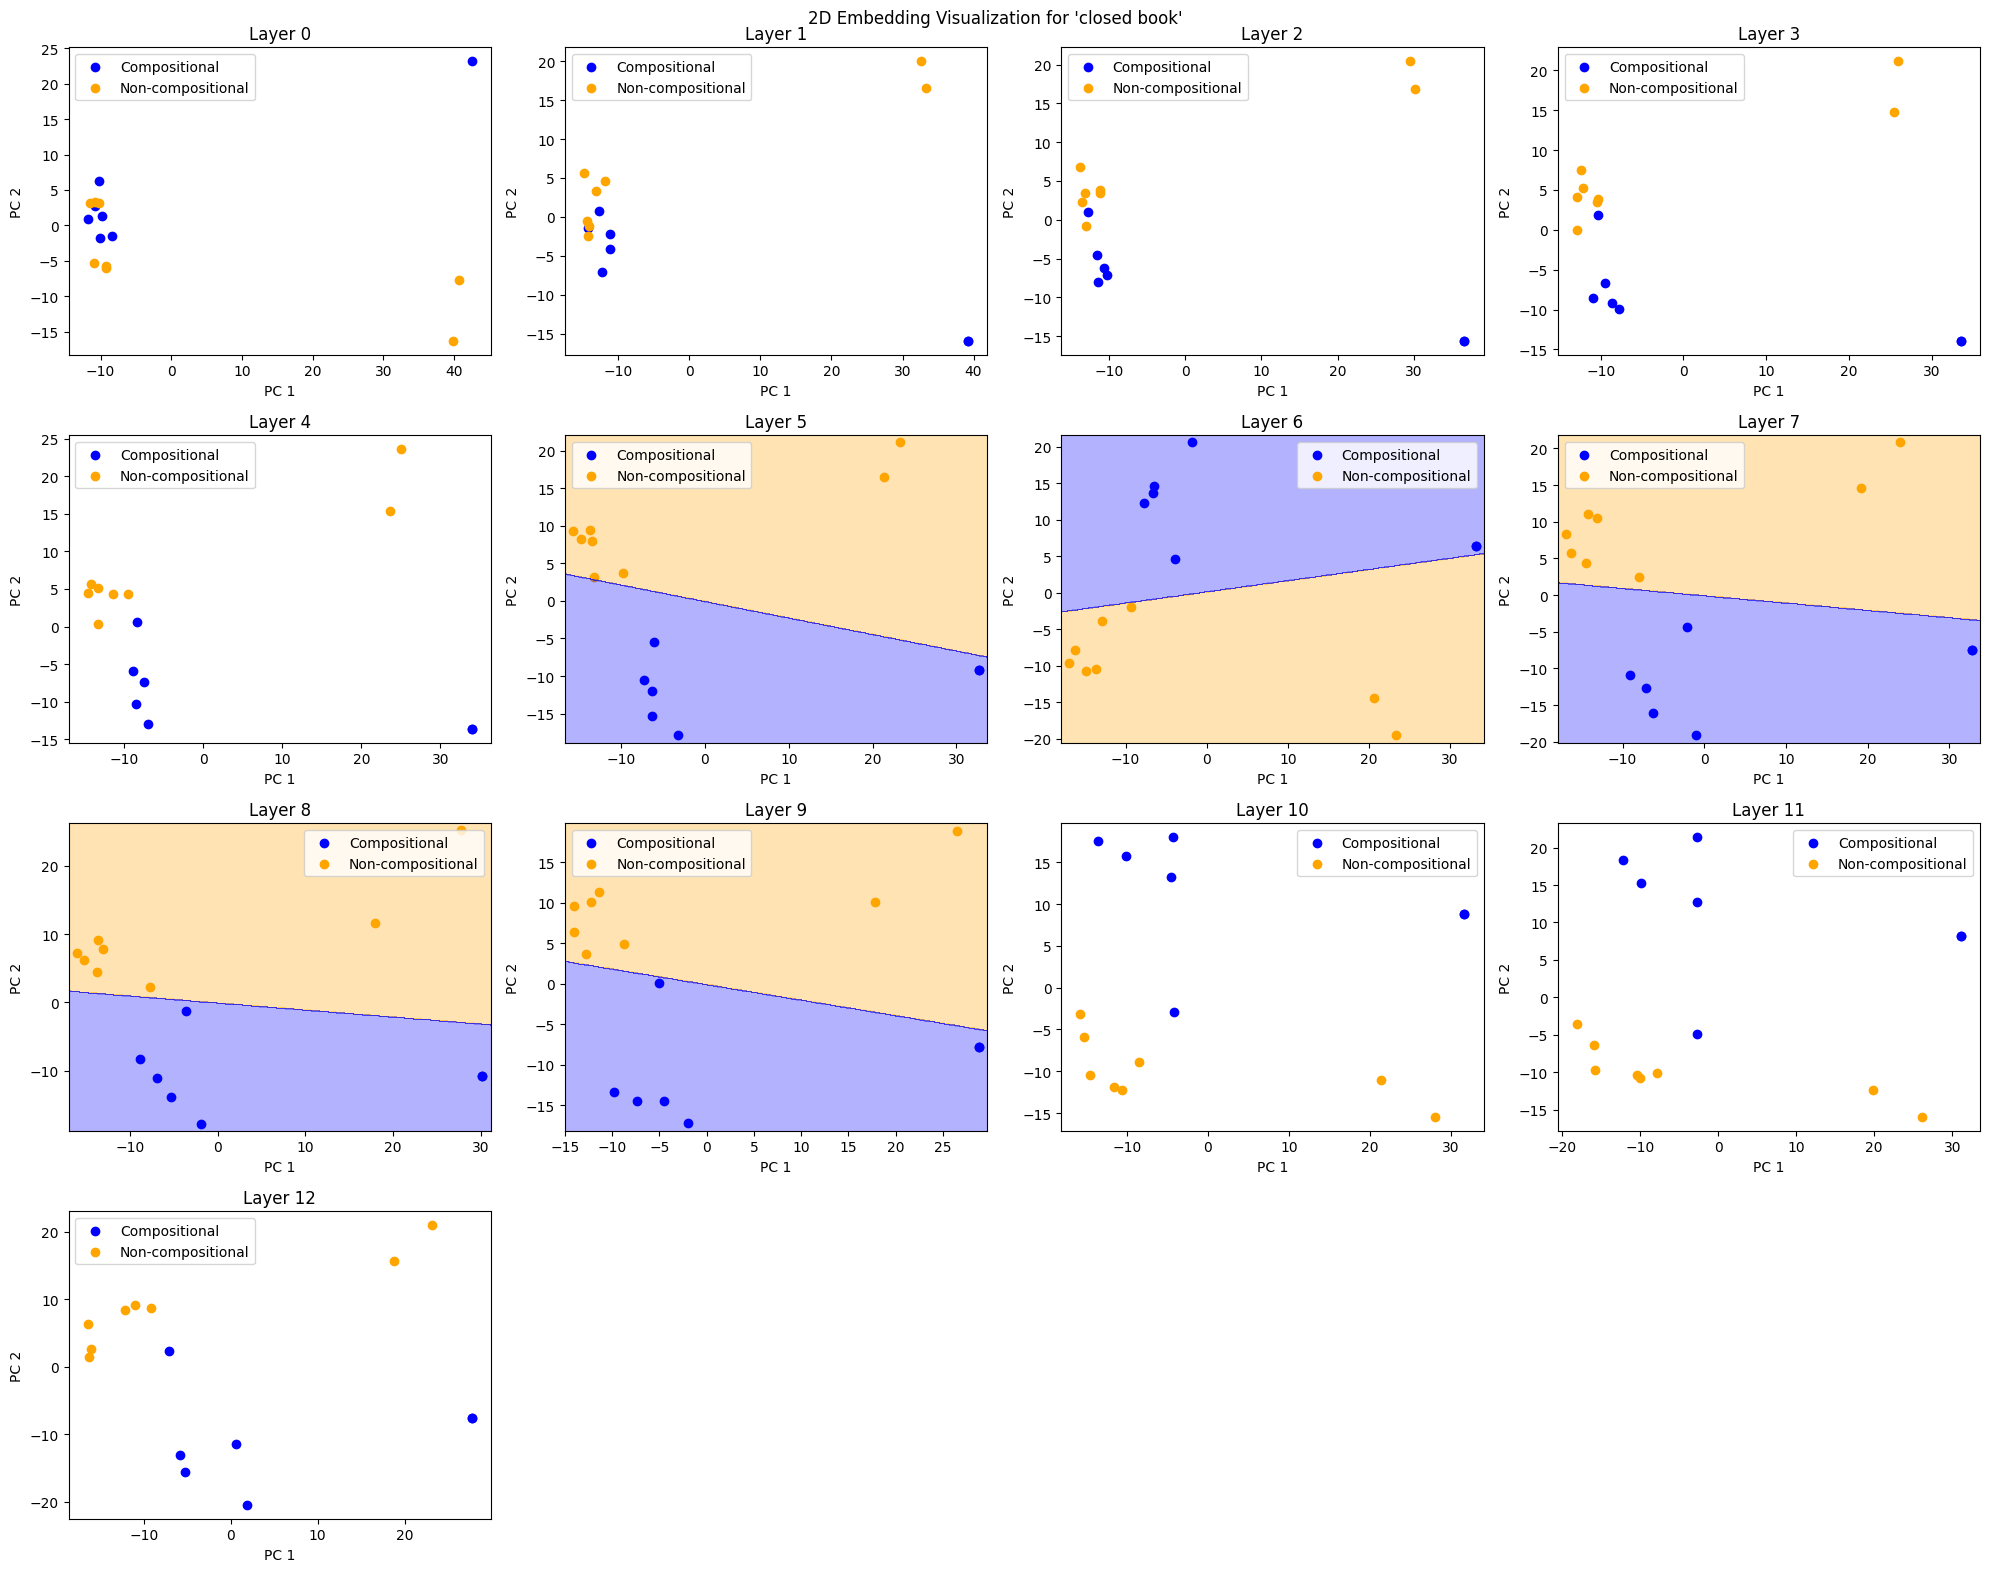

[cutting edge] Layer 0
Training accuracy: 44% => not linearly separable
[cutting edge] Layer 1
Training accuracy: 44% => not linearly separable
[cutting edge] Layer 2
Training accuracy: 56% => not linearly separable
[cutting edge] Layer 3
Training accuracy: 78% => not linearly separable
[cutting edge] Layer 4
Training accuracy: 94% => not linearly separable
[cutting edge] Layer 5
Training accuracy: 100% => linearly separable
[cutting edge] Layer 6
Training accuracy: 100% => linearly separable
[cutting edge] Layer 7
Training accuracy: 100% => linearly separable
[cutting edge] Layer 8
Training accuracy: 100% => linearly separable
[cutting edge] Layer 9
Training accuracy: 100% => linearly separable
[cutting edge] Layer 10
Training accuracy: 100% => linearly separable
[cutting edge] Layer 11
Training accuracy: 100% => linearly separable
[cutting edge] Layer 12
Training accuracy: 100% => linearly separable


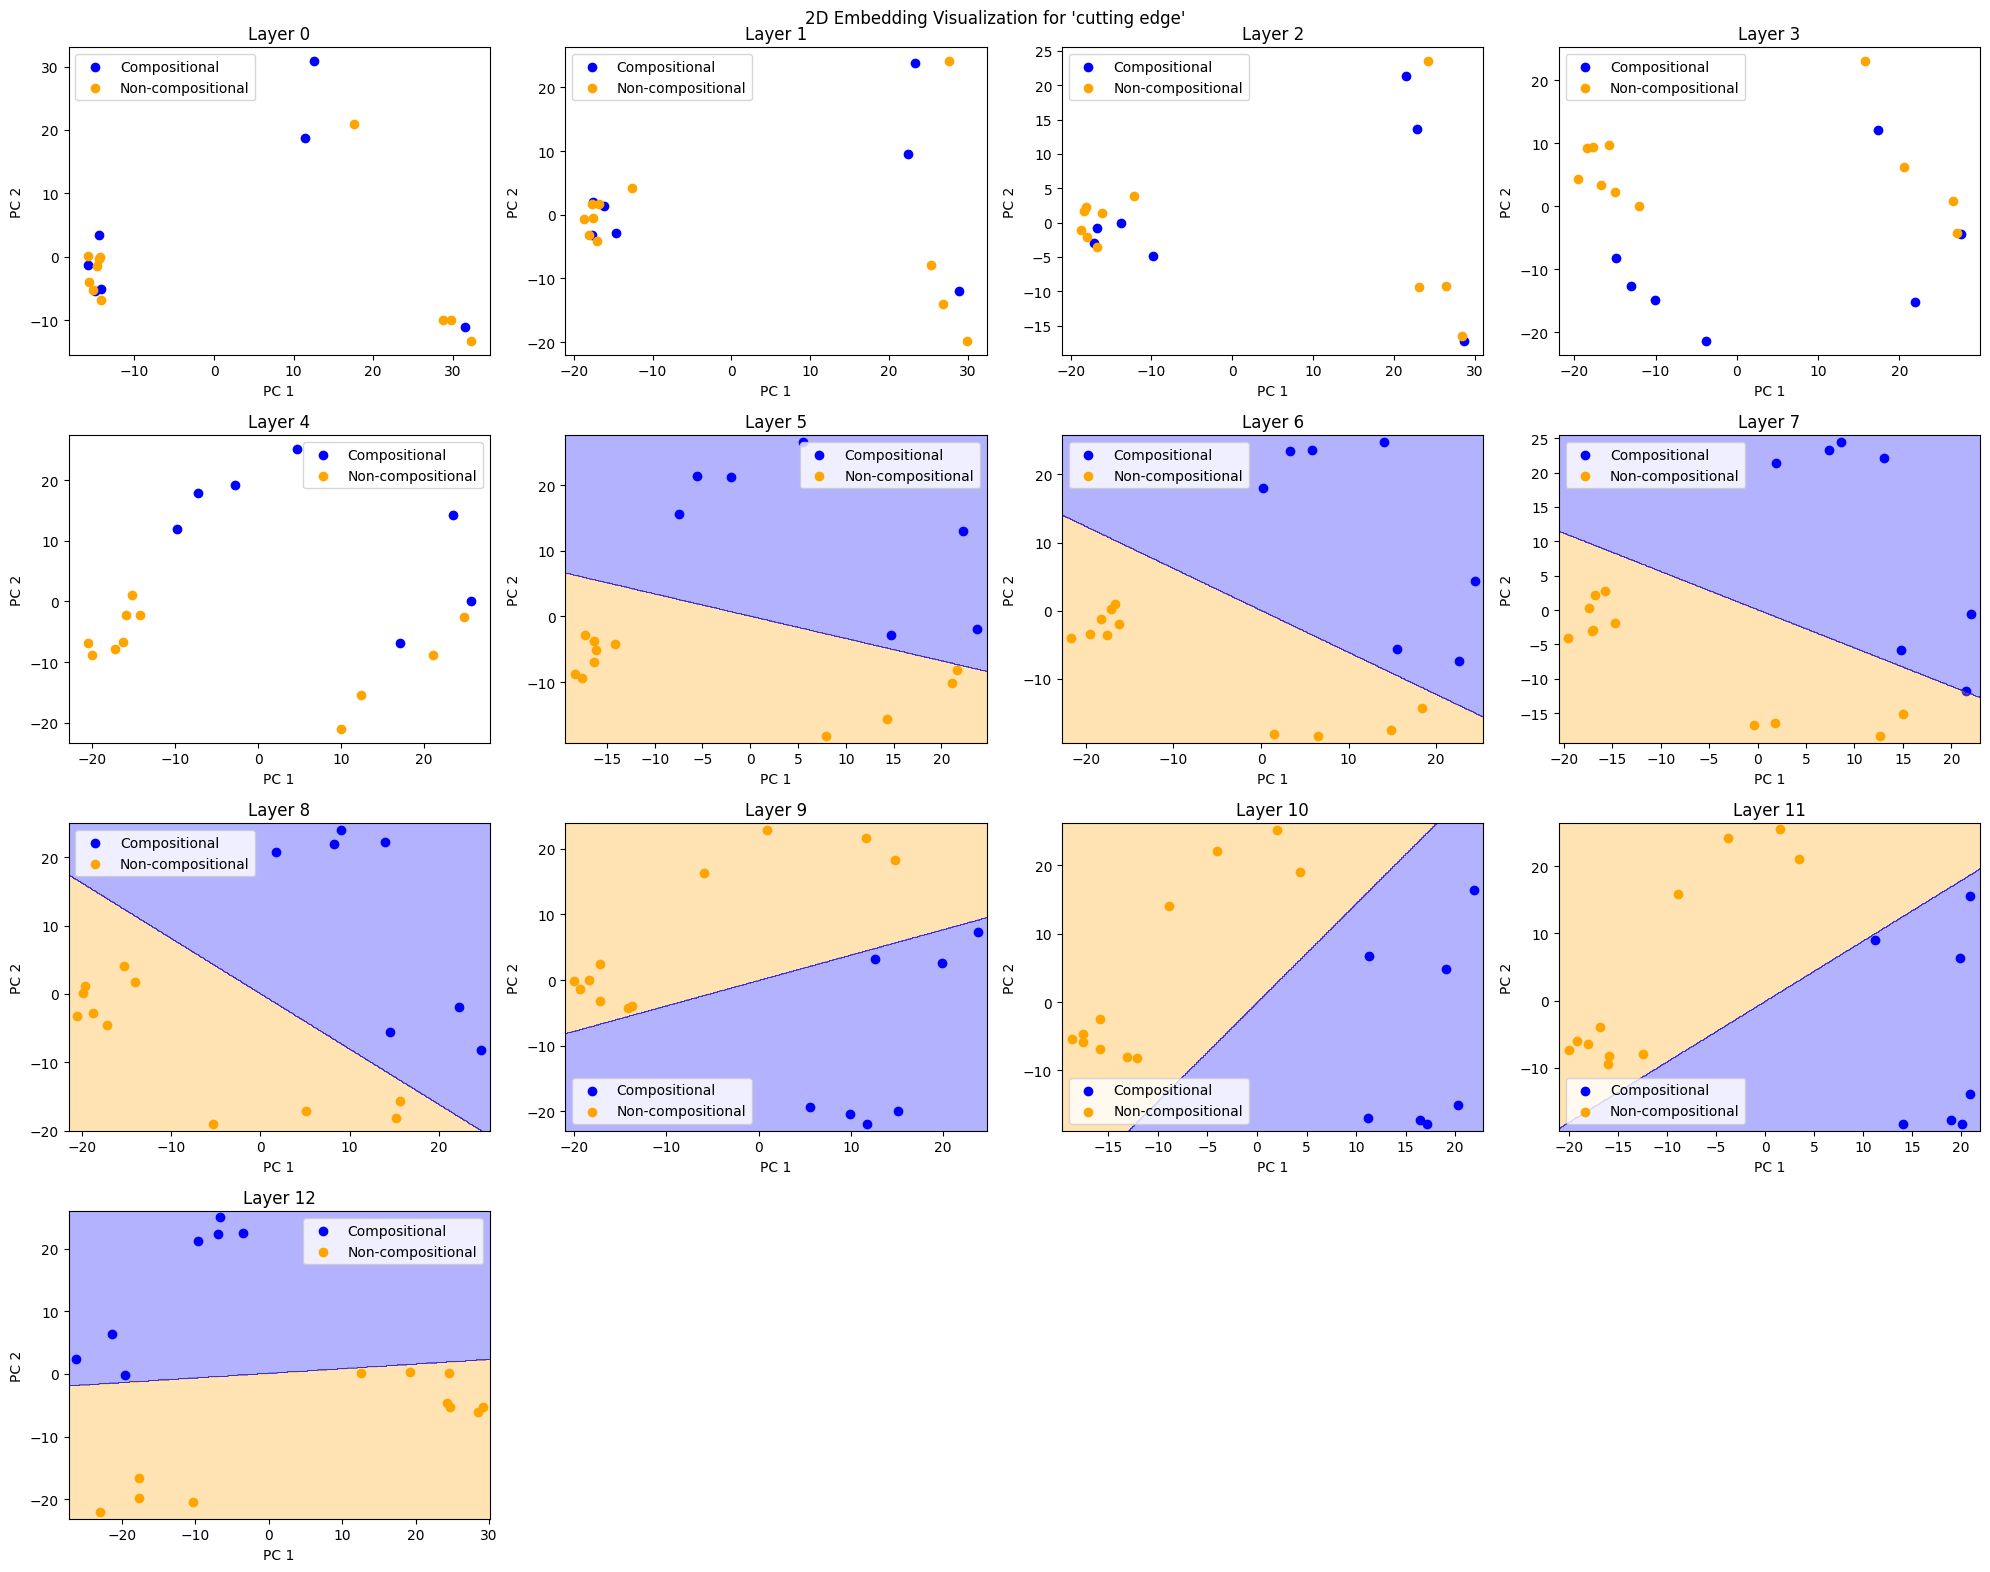

[dry land] Layer 0
Training accuracy: 76% => not linearly separable
[dry land] Layer 1
Training accuracy: 81% => not linearly separable
[dry land] Layer 2
Training accuracy: 81% => not linearly separable
[dry land] Layer 3
Training accuracy: 86% => not linearly separable
[dry land] Layer 4
Training accuracy: 48% => not linearly separable
[dry land] Layer 5
Training accuracy: 95% => not linearly separable
[dry land] Layer 6
Training accuracy: 43% => not linearly separable
[dry land] Layer 7
Training accuracy: 81% => not linearly separable
[dry land] Layer 8
Training accuracy: 95% => not linearly separable
[dry land] Layer 9
Training accuracy: 95% => not linearly separable
[dry land] Layer 10
Training accuracy: 81% => not linearly separable
[dry land] Layer 11
Training accuracy: 86% => not linearly separable
[dry land] Layer 12
Training accuracy: 95% => not linearly separable


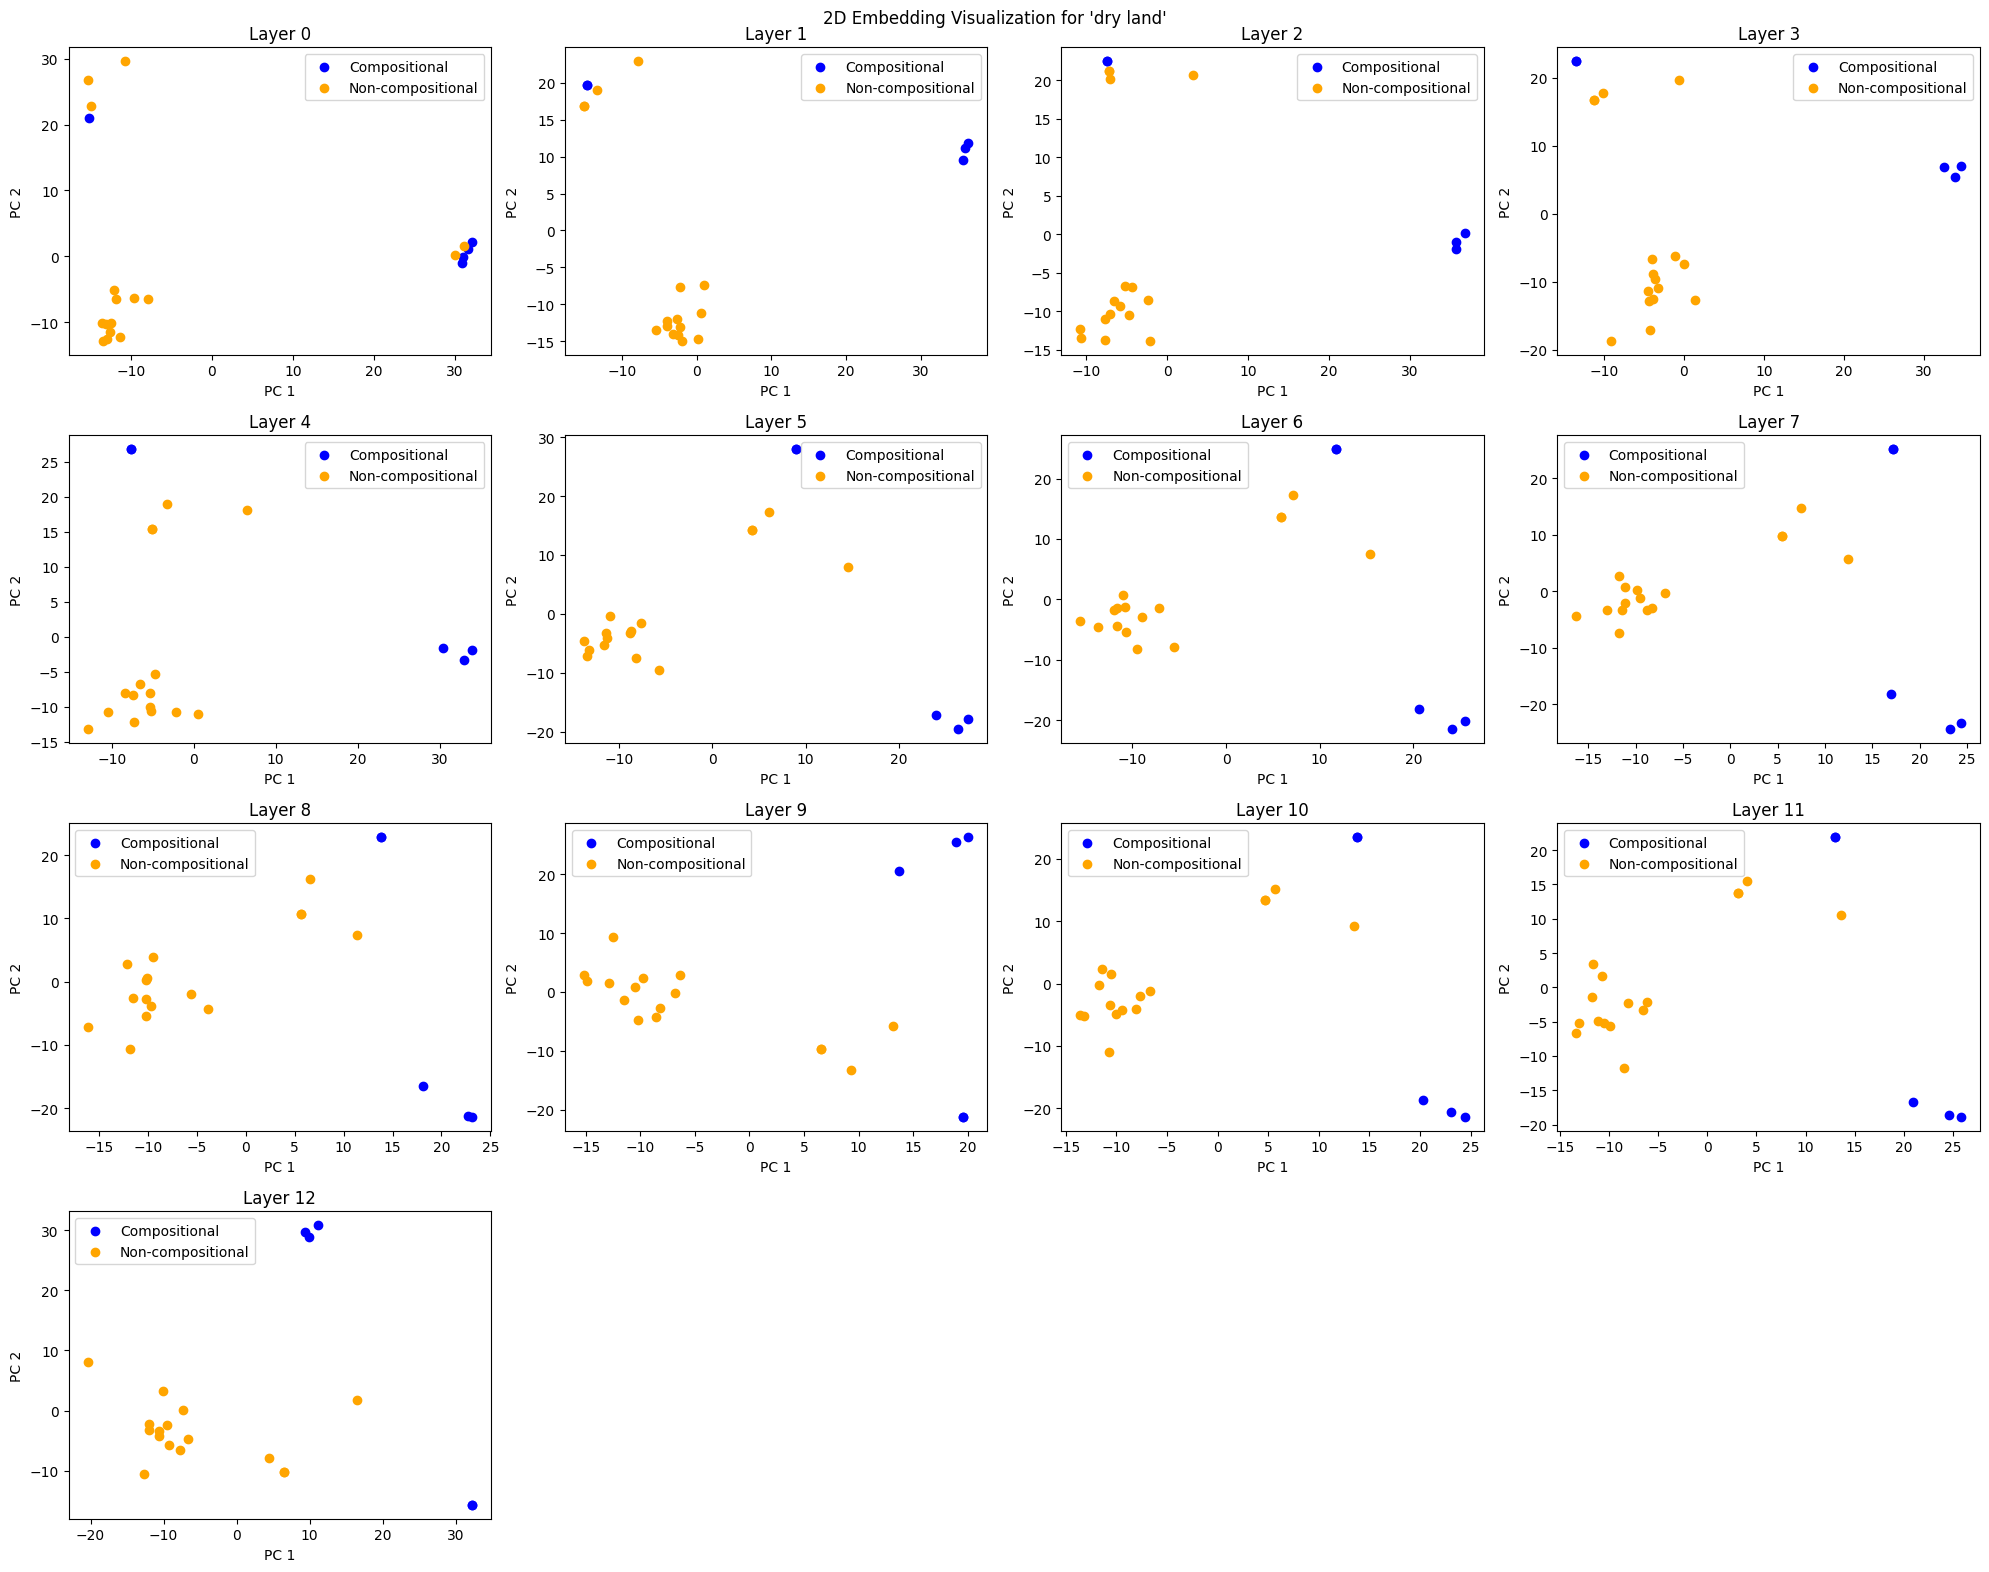

[fine line] Layer 0
Training accuracy: 85% => not linearly separable
[fine line] Layer 1
Training accuracy: 92% => not linearly separable
[fine line] Layer 2
Training accuracy: 85% => not linearly separable
[fine line] Layer 3
Training accuracy: 77% => not linearly separable
[fine line] Layer 4
Training accuracy: 69% => not linearly separable
[fine line] Layer 5
Training accuracy: 85% => not linearly separable
[fine line] Layer 6
Training accuracy: 62% => not linearly separable
[fine line] Layer 7
Training accuracy: 69% => not linearly separable
[fine line] Layer 8
Training accuracy: 85% => not linearly separable
[fine line] Layer 9
Training accuracy: 85% => not linearly separable
[fine line] Layer 10
Training accuracy: 85% => not linearly separable
[fine line] Layer 11
Training accuracy: 100% => linearly separable
[fine line] Layer 12
Training accuracy: 85% => not linearly separable


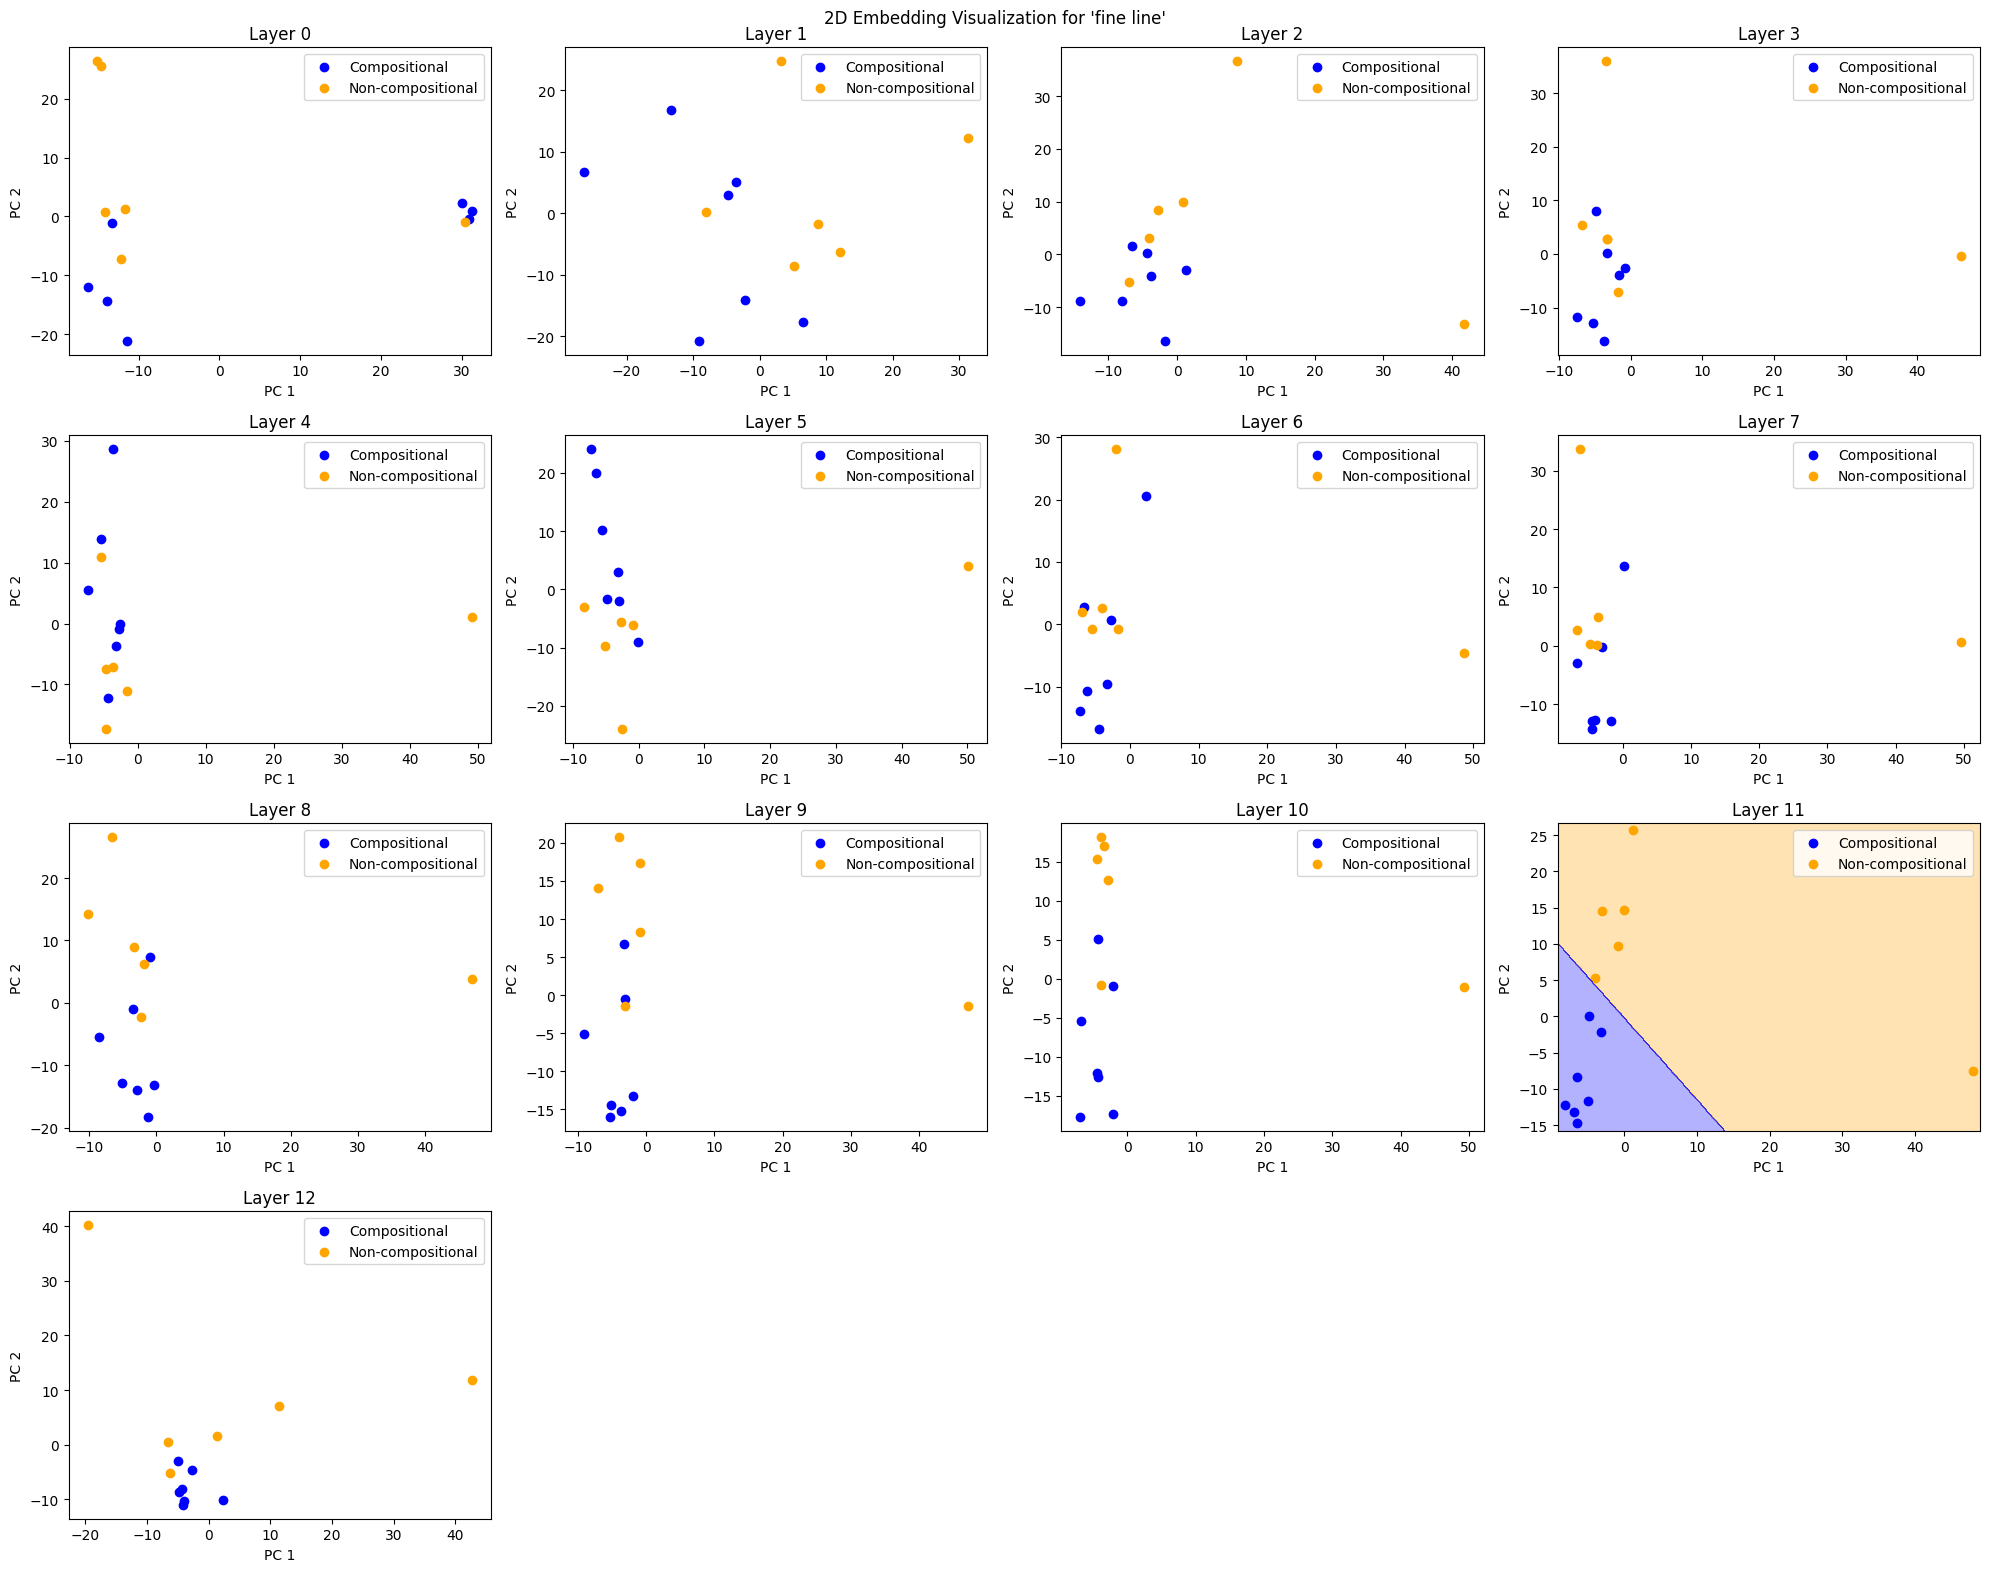

[ground floor] Layer 0
Training accuracy: 91% => not linearly separable
[ground floor] Layer 1
Training accuracy: 91% => not linearly separable
[ground floor] Layer 2
Training accuracy: 91% => not linearly separable
[ground floor] Layer 3
Training accuracy: 91% => not linearly separable
[ground floor] Layer 4
Training accuracy: 91% => not linearly separable
[ground floor] Layer 5
Training accuracy: 91% => not linearly separable
[ground floor] Layer 6
Training accuracy: 91% => not linearly separable
[ground floor] Layer 7
Training accuracy: 91% => not linearly separable
[ground floor] Layer 8
Training accuracy: 70% => not linearly separable
[ground floor] Layer 9
Training accuracy: 83% => not linearly separable
[ground floor] Layer 10
Training accuracy: 100% => linearly separable
[ground floor] Layer 11
Training accuracy: 91% => not linearly separable
[ground floor] Layer 12
Training accuracy: 91% => not linearly separable


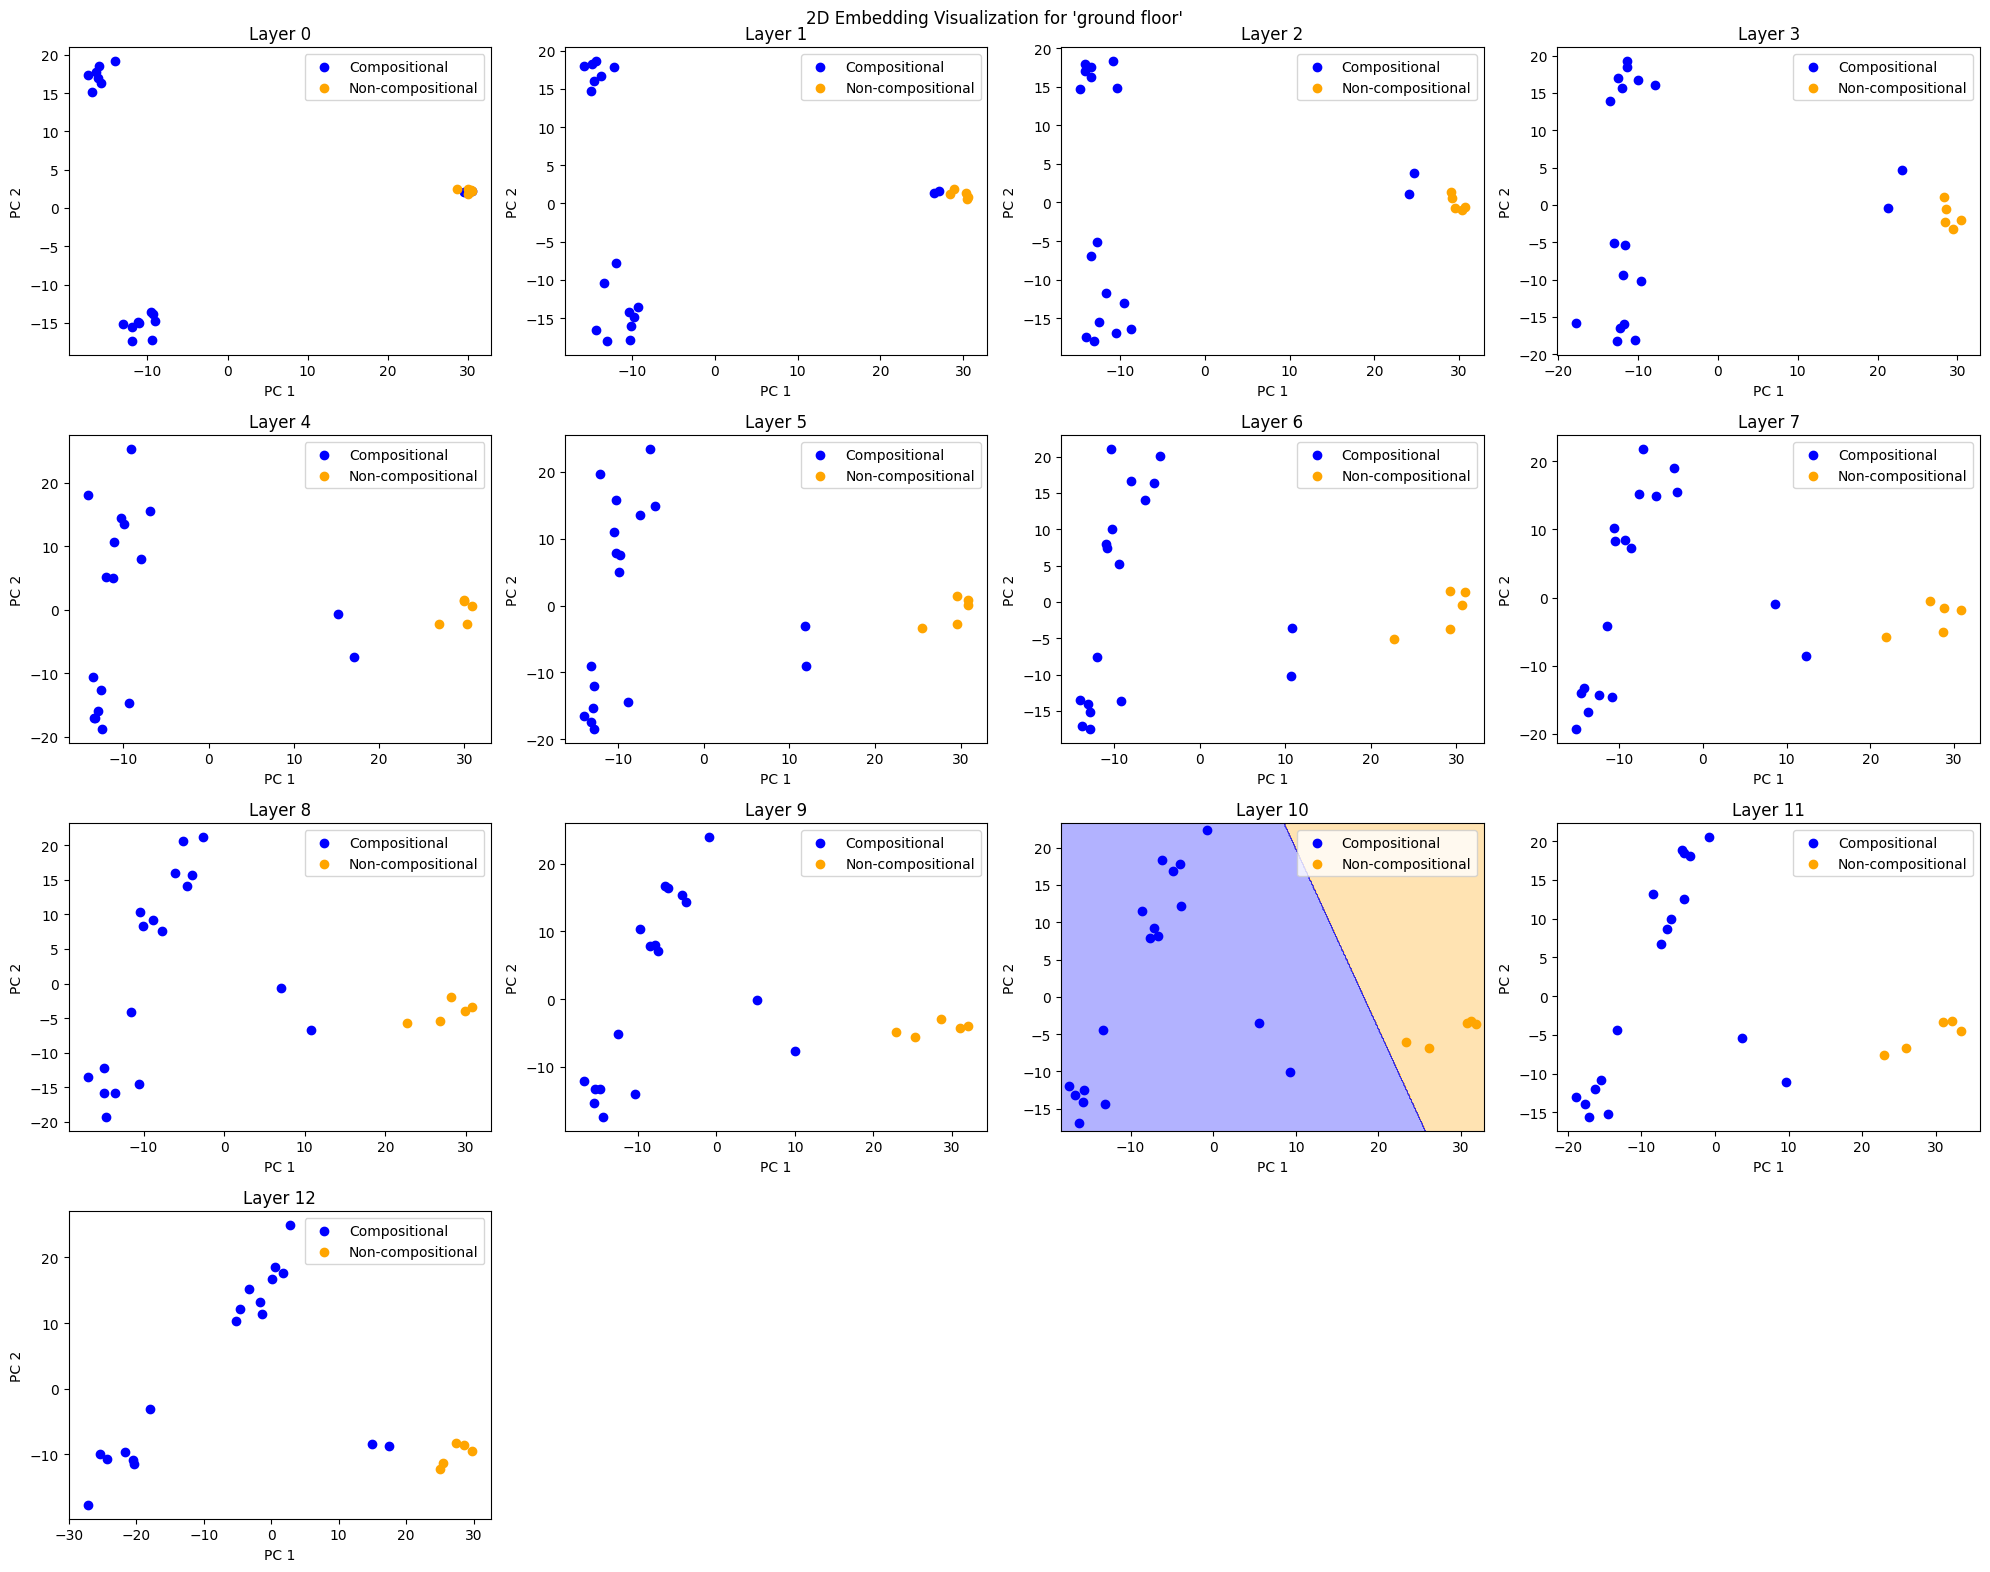

[rocket science] Layer 0
Training accuracy: 67% => not linearly separable
[rocket science] Layer 1
Training accuracy: 80% => not linearly separable
[rocket science] Layer 2
Training accuracy: 87% => not linearly separable
[rocket science] Layer 3
Training accuracy: 87% => not linearly separable
[rocket science] Layer 4
Training accuracy: 93% => not linearly separable
[rocket science] Layer 5
Training accuracy: 87% => not linearly separable
[rocket science] Layer 6
Training accuracy: 80% => not linearly separable
[rocket science] Layer 7
Training accuracy: 80% => not linearly separable
[rocket science] Layer 8
Training accuracy: 87% => not linearly separable
[rocket science] Layer 9
Training accuracy: 93% => not linearly separable
[rocket science] Layer 10
Training accuracy: 80% => not linearly separable
[rocket science] Layer 11
Training accuracy: 67% => not linearly separable
[rocket science] Layer 12
Training accuracy: 60% => not linearly separable


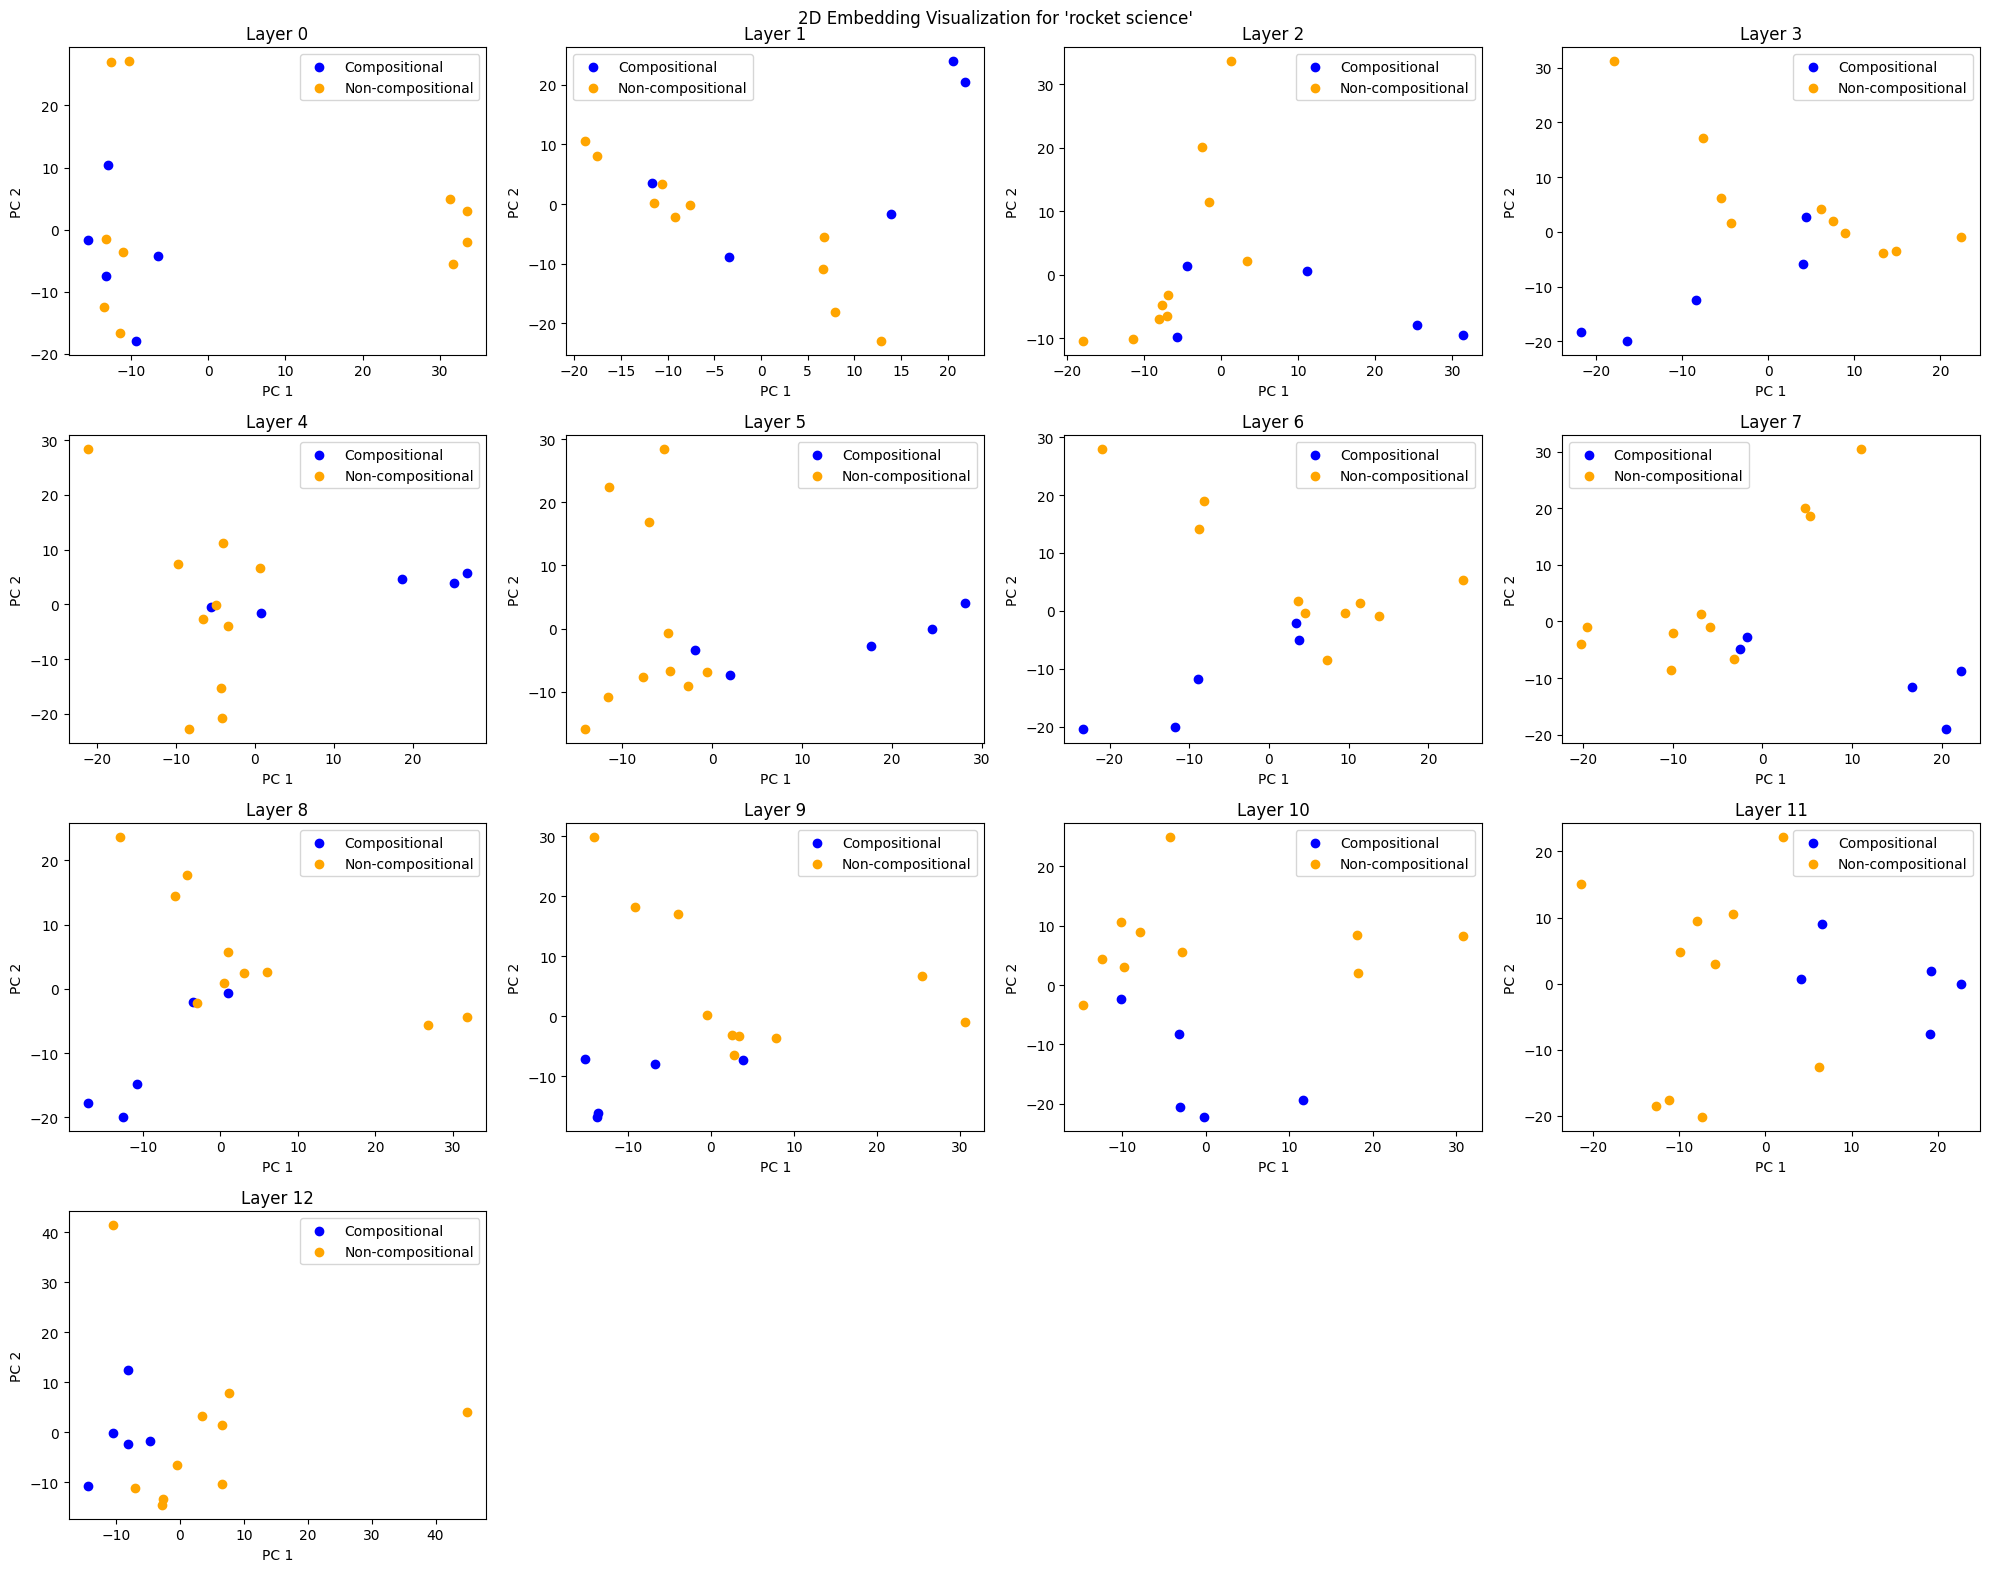

[silver spoon] Layer 0
Training accuracy: 77% => not linearly separable
[silver spoon] Layer 1
Training accuracy: 85% => not linearly separable
[silver spoon] Layer 2
Training accuracy: 92% => not linearly separable
[silver spoon] Layer 3
Training accuracy: 69% => not linearly separable
[silver spoon] Layer 4
Training accuracy: 77% => not linearly separable
[silver spoon] Layer 5
Training accuracy: 62% => not linearly separable
[silver spoon] Layer 6
Training accuracy: 85% => not linearly separable
[silver spoon] Layer 7
Training accuracy: 85% => not linearly separable
[silver spoon] Layer 8
Training accuracy: 69% => not linearly separable
[silver spoon] Layer 9
Training accuracy: 62% => not linearly separable
[silver spoon] Layer 10
Training accuracy: 54% => not linearly separable
[silver spoon] Layer 11
Training accuracy: 31% => not linearly separable
[silver spoon] Layer 12
Training accuracy: 62% => not linearly separable


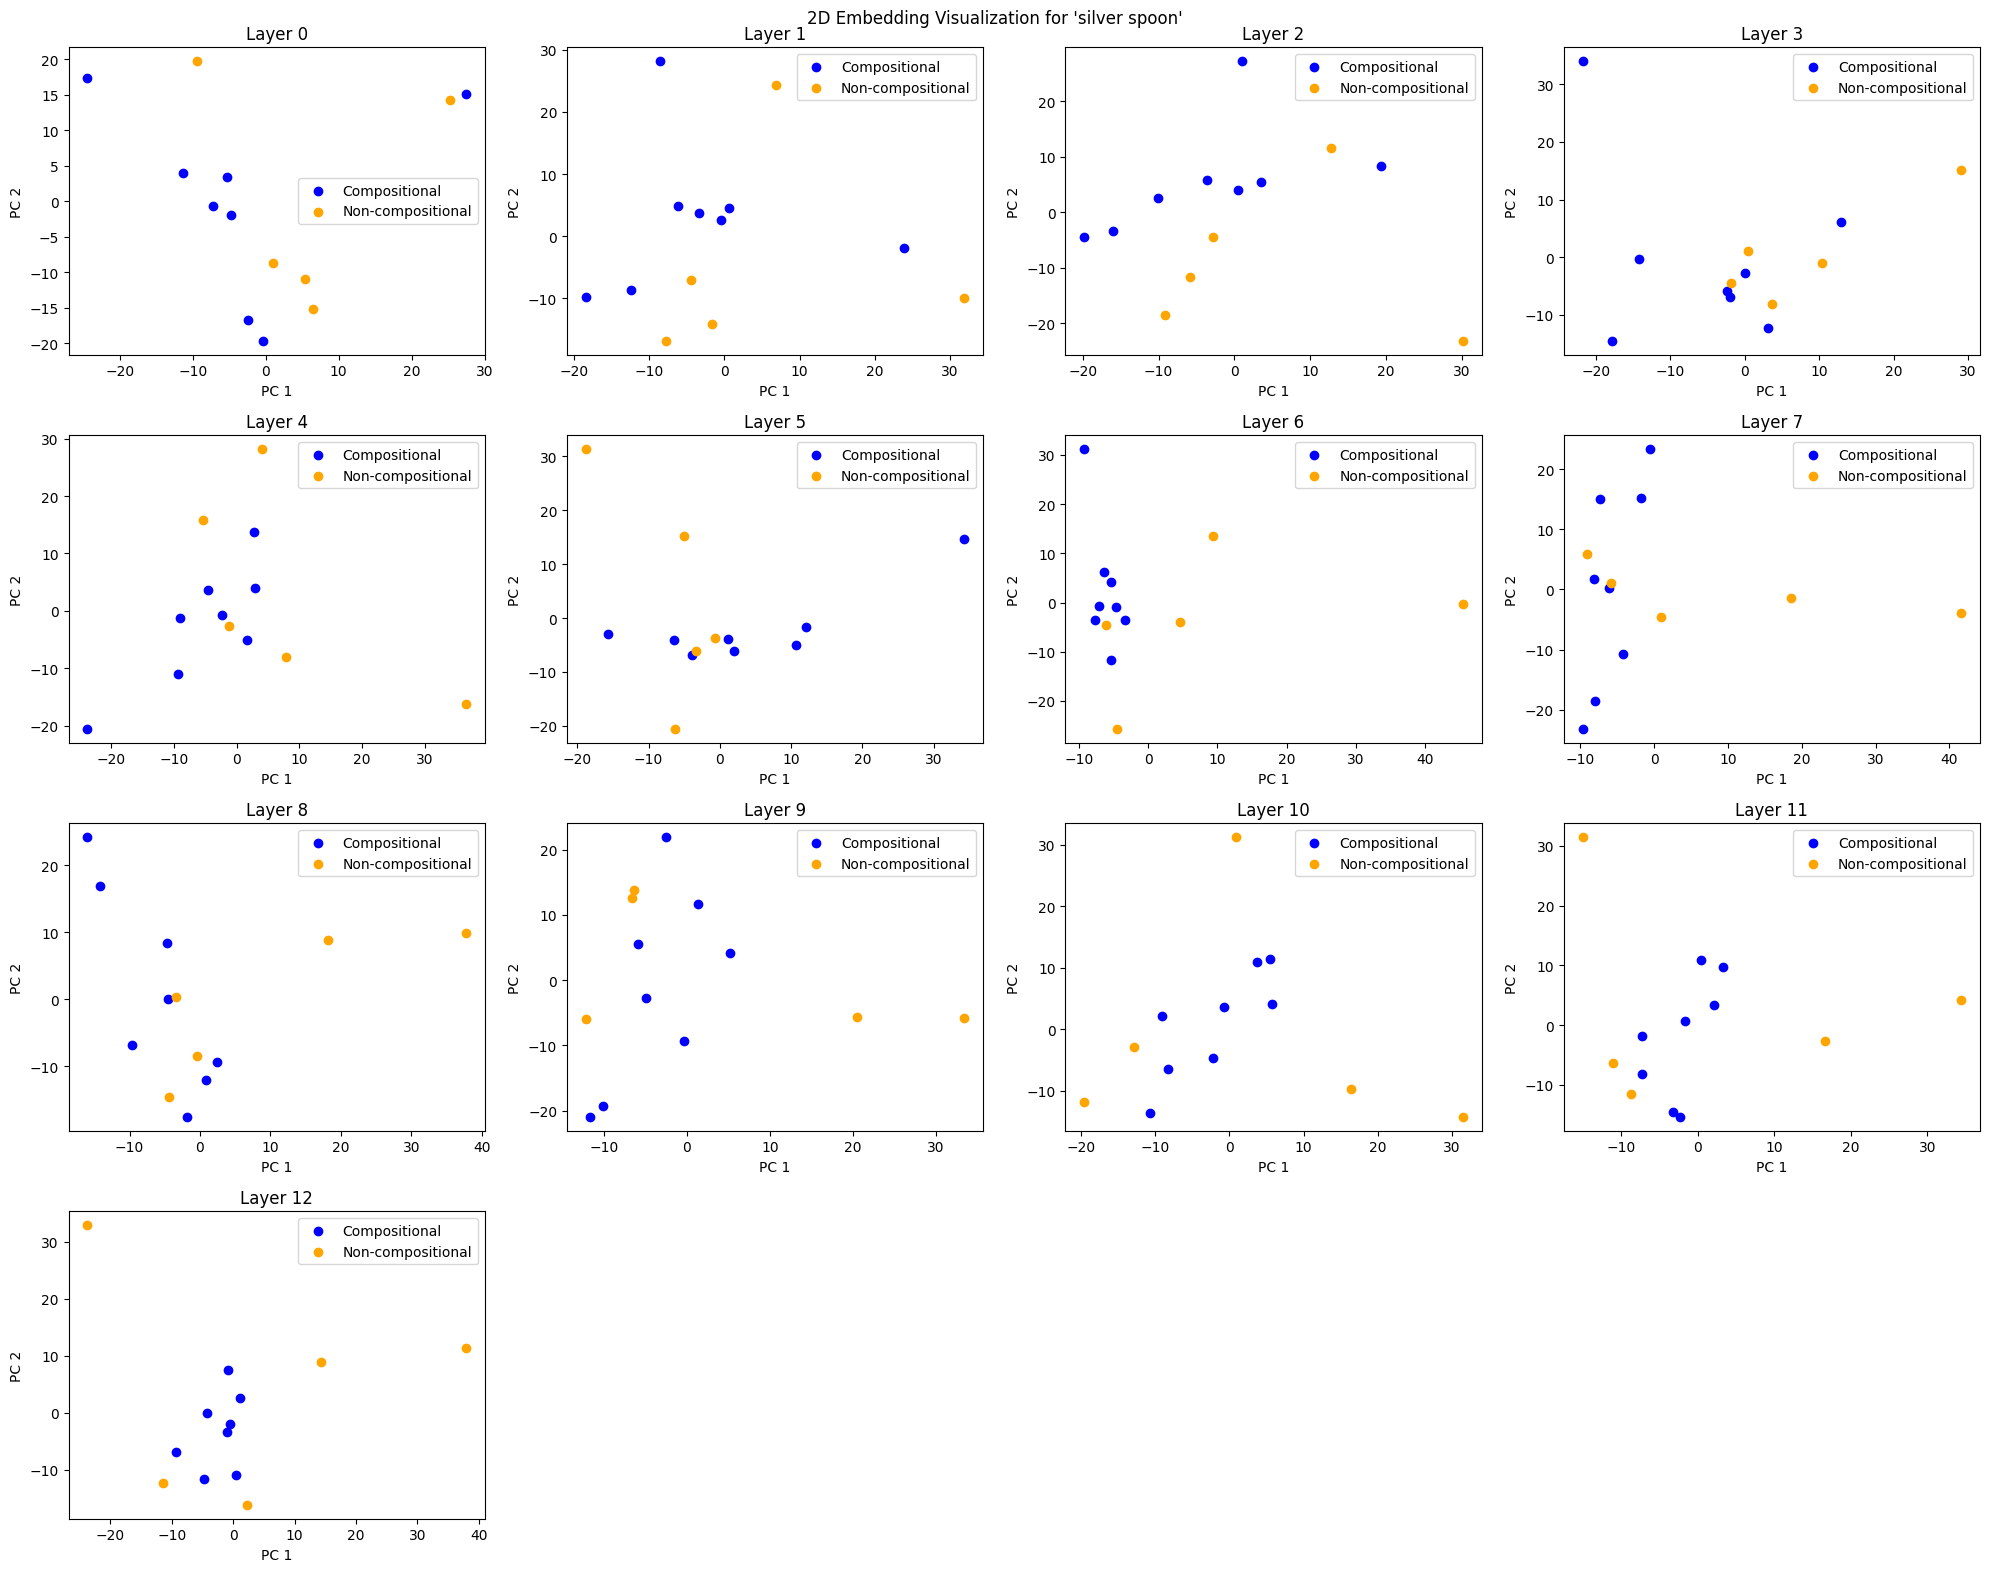

In [6]:
all_accuracies = {}

for mwe in pair_df.index:
    acc = plot_decision_boundary_all_layers(mwe, data_df, tokenizer, model)
    all_accuracies[mwe] = acc


In [8]:


# Convert dict to DataFrame
df_accuracies = pd.DataFrame.from_dict(all_accuracies, orient="index")
df_accuracies.columns = [f"Layer_{i}" for i in range(len(df_accuracies.columns))]
df_accuracies.to_csv("roberta_all_accuracies.csv")

# Load from CSV
df_loaded = pd.read_csv("roberta_all_accuracies.csv", index_col=0)

# Convert back to dict format (with lists)
all_accuracies_loaded = df_loaded.to_dict(orient="index")
all_accuracies_loaded = {k: list(v.values()) for k, v in all_accuracies_loaded.items()}

latex_code = generate_latex_table(all_accuracies_loaded)
with open("roberta_linear_separability_table.tex", "w") as f:
    f.write(latex_code)



Layer 0
Training accuracy: 56.25% => data is not linearly separable.
Layer 1
Training accuracy: 81.25% => data is not linearly separable.
Layer 2
Training accuracy: 75.00% => data is not linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 62.50% => data is not linearly separable.
Layer 5
Training accuracy: 43.75% => data is not linearly separable.
Layer 6
Training accuracy: 43.75% => data is not linearly separable.
Layer 7
Training accuracy: 75.00% => data is not linearly separable.
Layer 8
Training accuracy: 37.50% => data is not linearly separable.
Layer 9
Training accuracy: 87.50% => data is not linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 31.25% => data is not linearly separable.


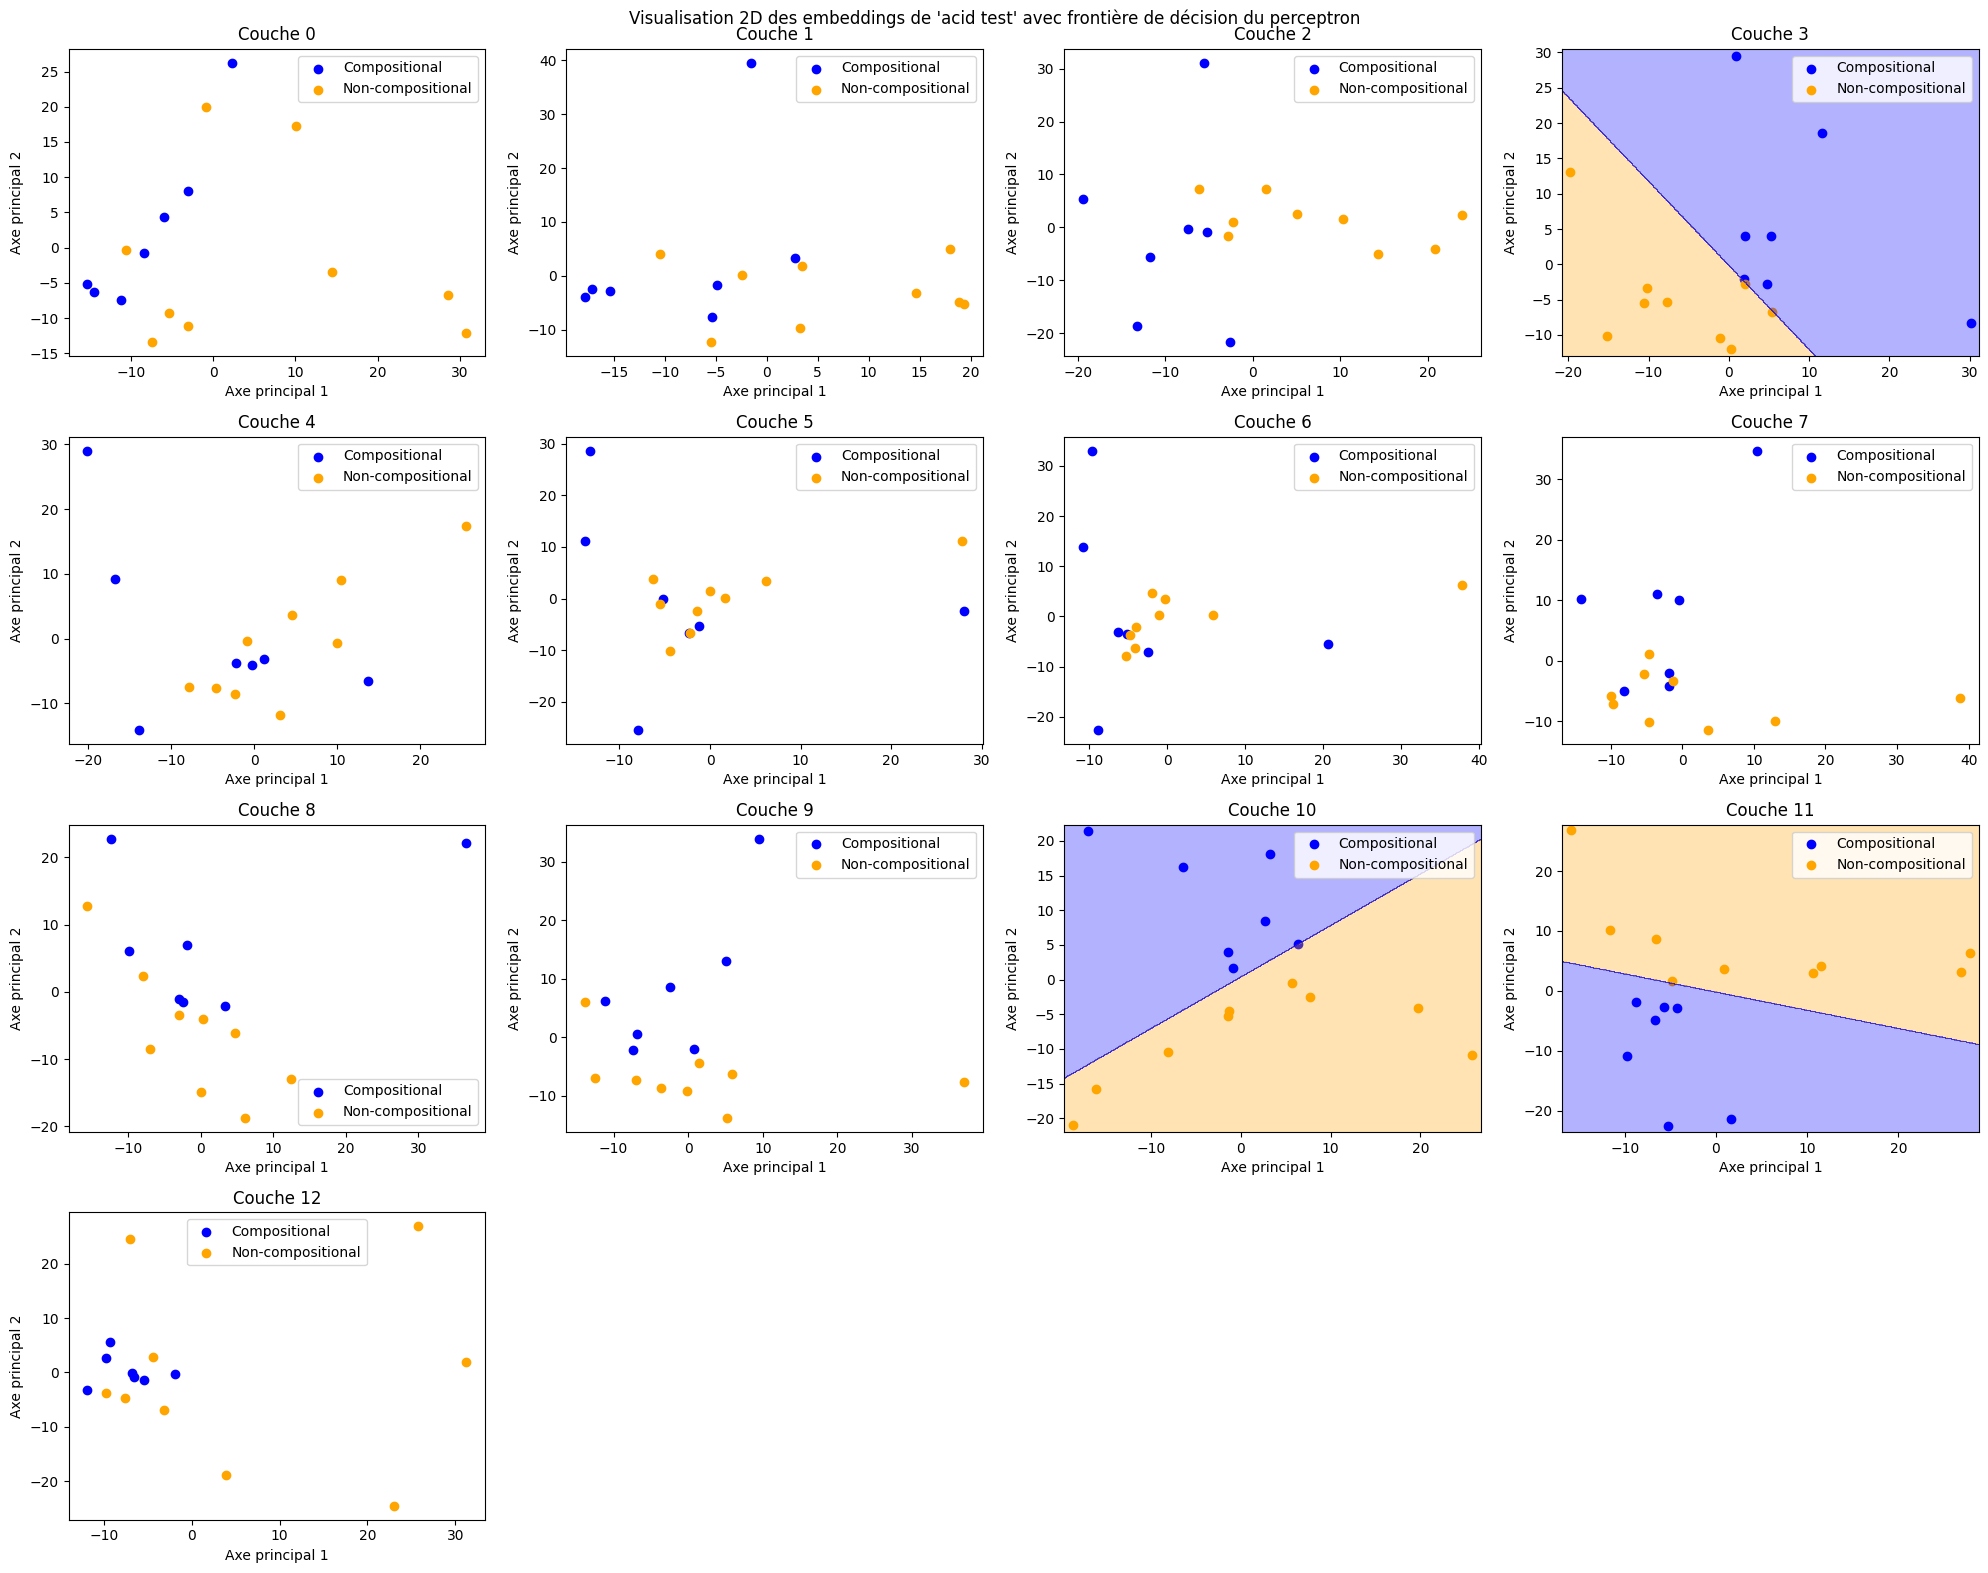

Layer 0
Training accuracy: 68.18% => data is not linearly separable.
Layer 1
Training accuracy: 77.27% => data is not linearly separable.
Layer 2
Training accuracy: 68.18% => data is not linearly separable.
Layer 3
Training accuracy: 81.82% => data is not linearly separable.
Layer 4
Training accuracy: 72.73% => data is not linearly separable.
Layer 5
Training accuracy: 77.27% => data is not linearly separable.
Layer 6
Training accuracy: 86.36% => data is not linearly separable.
Layer 7
Training accuracy: 86.36% => data is not linearly separable.
Layer 8
Training accuracy: 86.36% => data is not linearly separable.
Layer 9
Training accuracy: 63.64% => data is not linearly separable.
Layer 10
Training accuracy: 72.73% => data is not linearly separable.
Layer 11
Training accuracy: 81.82% => data is not linearly separable.
Layer 12
Training accuracy: 72.73% => data is not linearly separable.


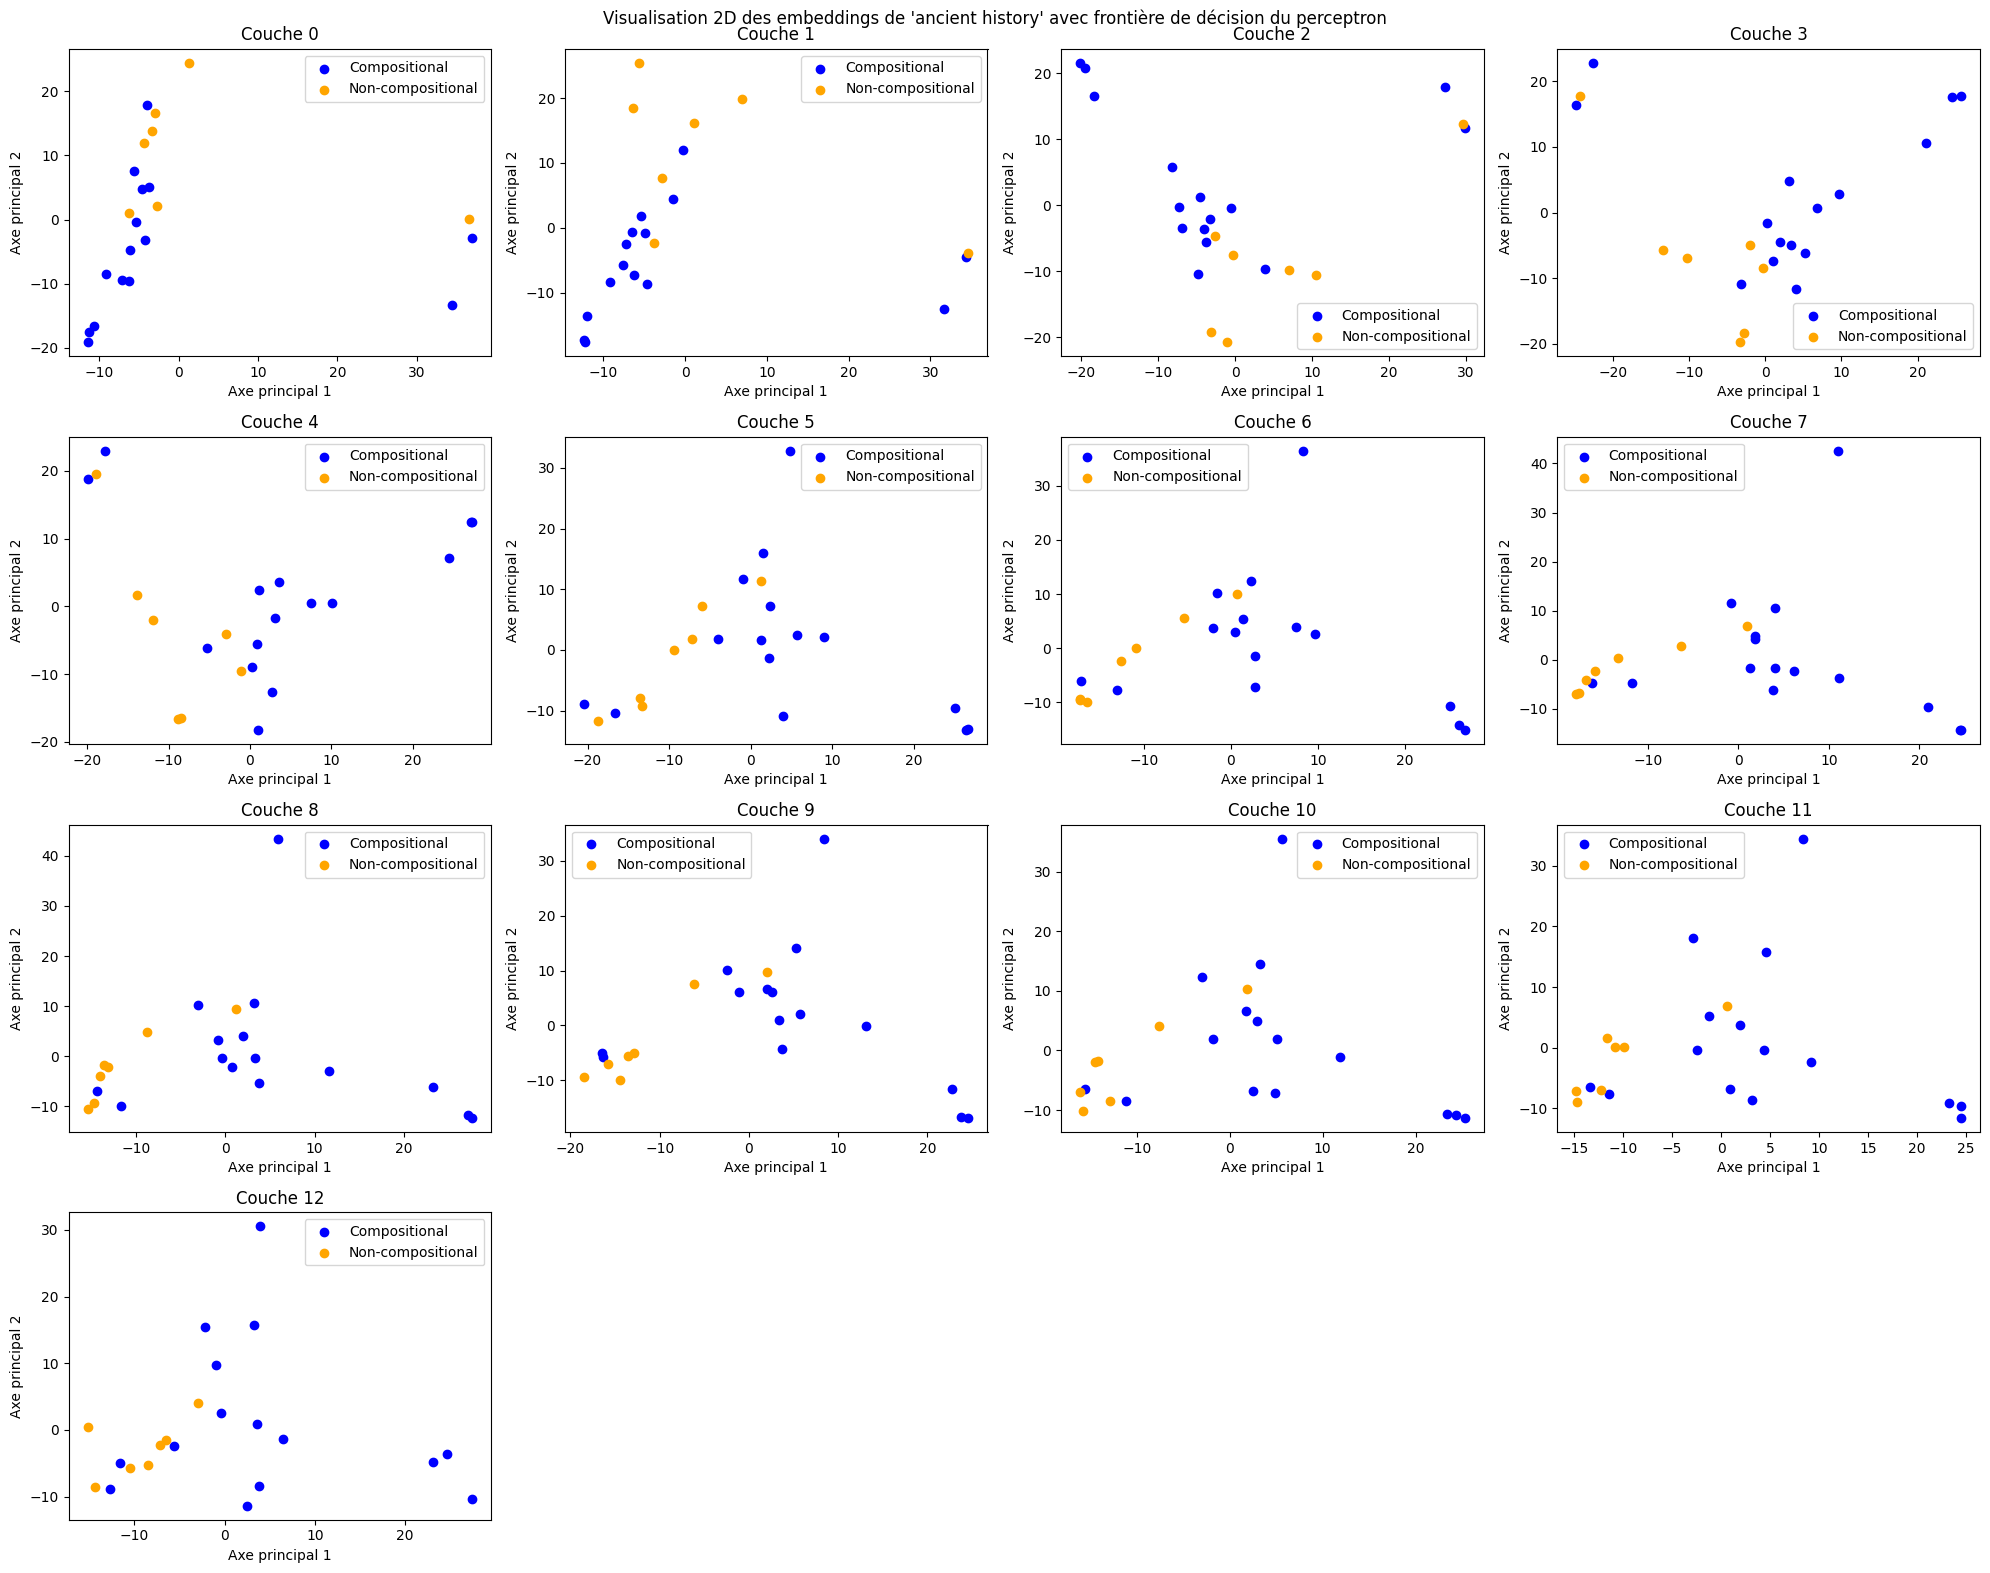

Layer 0
Training accuracy: 66.67% => data is not linearly separable.
Layer 1
Training accuracy: 53.33% => data is not linearly separable.
Layer 2
Training accuracy: 66.67% => data is not linearly separable.
Layer 3
Training accuracy: 73.33% => data is not linearly separable.
Layer 4
Training accuracy: 73.33% => data is not linearly separable.
Layer 5
Training accuracy: 26.67% => data is not linearly separable.
Layer 6
Training accuracy: 80.00% => data is not linearly separable.
Layer 7
Training accuracy: 73.33% => data is not linearly separable.
Layer 8
Training accuracy: 26.67% => data is not linearly separable.
Layer 9
Training accuracy: 73.33% => data is not linearly separable.
Layer 10
Training accuracy: 86.67% => data is not linearly separable.
Layer 11
Training accuracy: 86.67% => data is not linearly separable.
Layer 12
Training accuracy: 53.33% => data is not linearly separable.


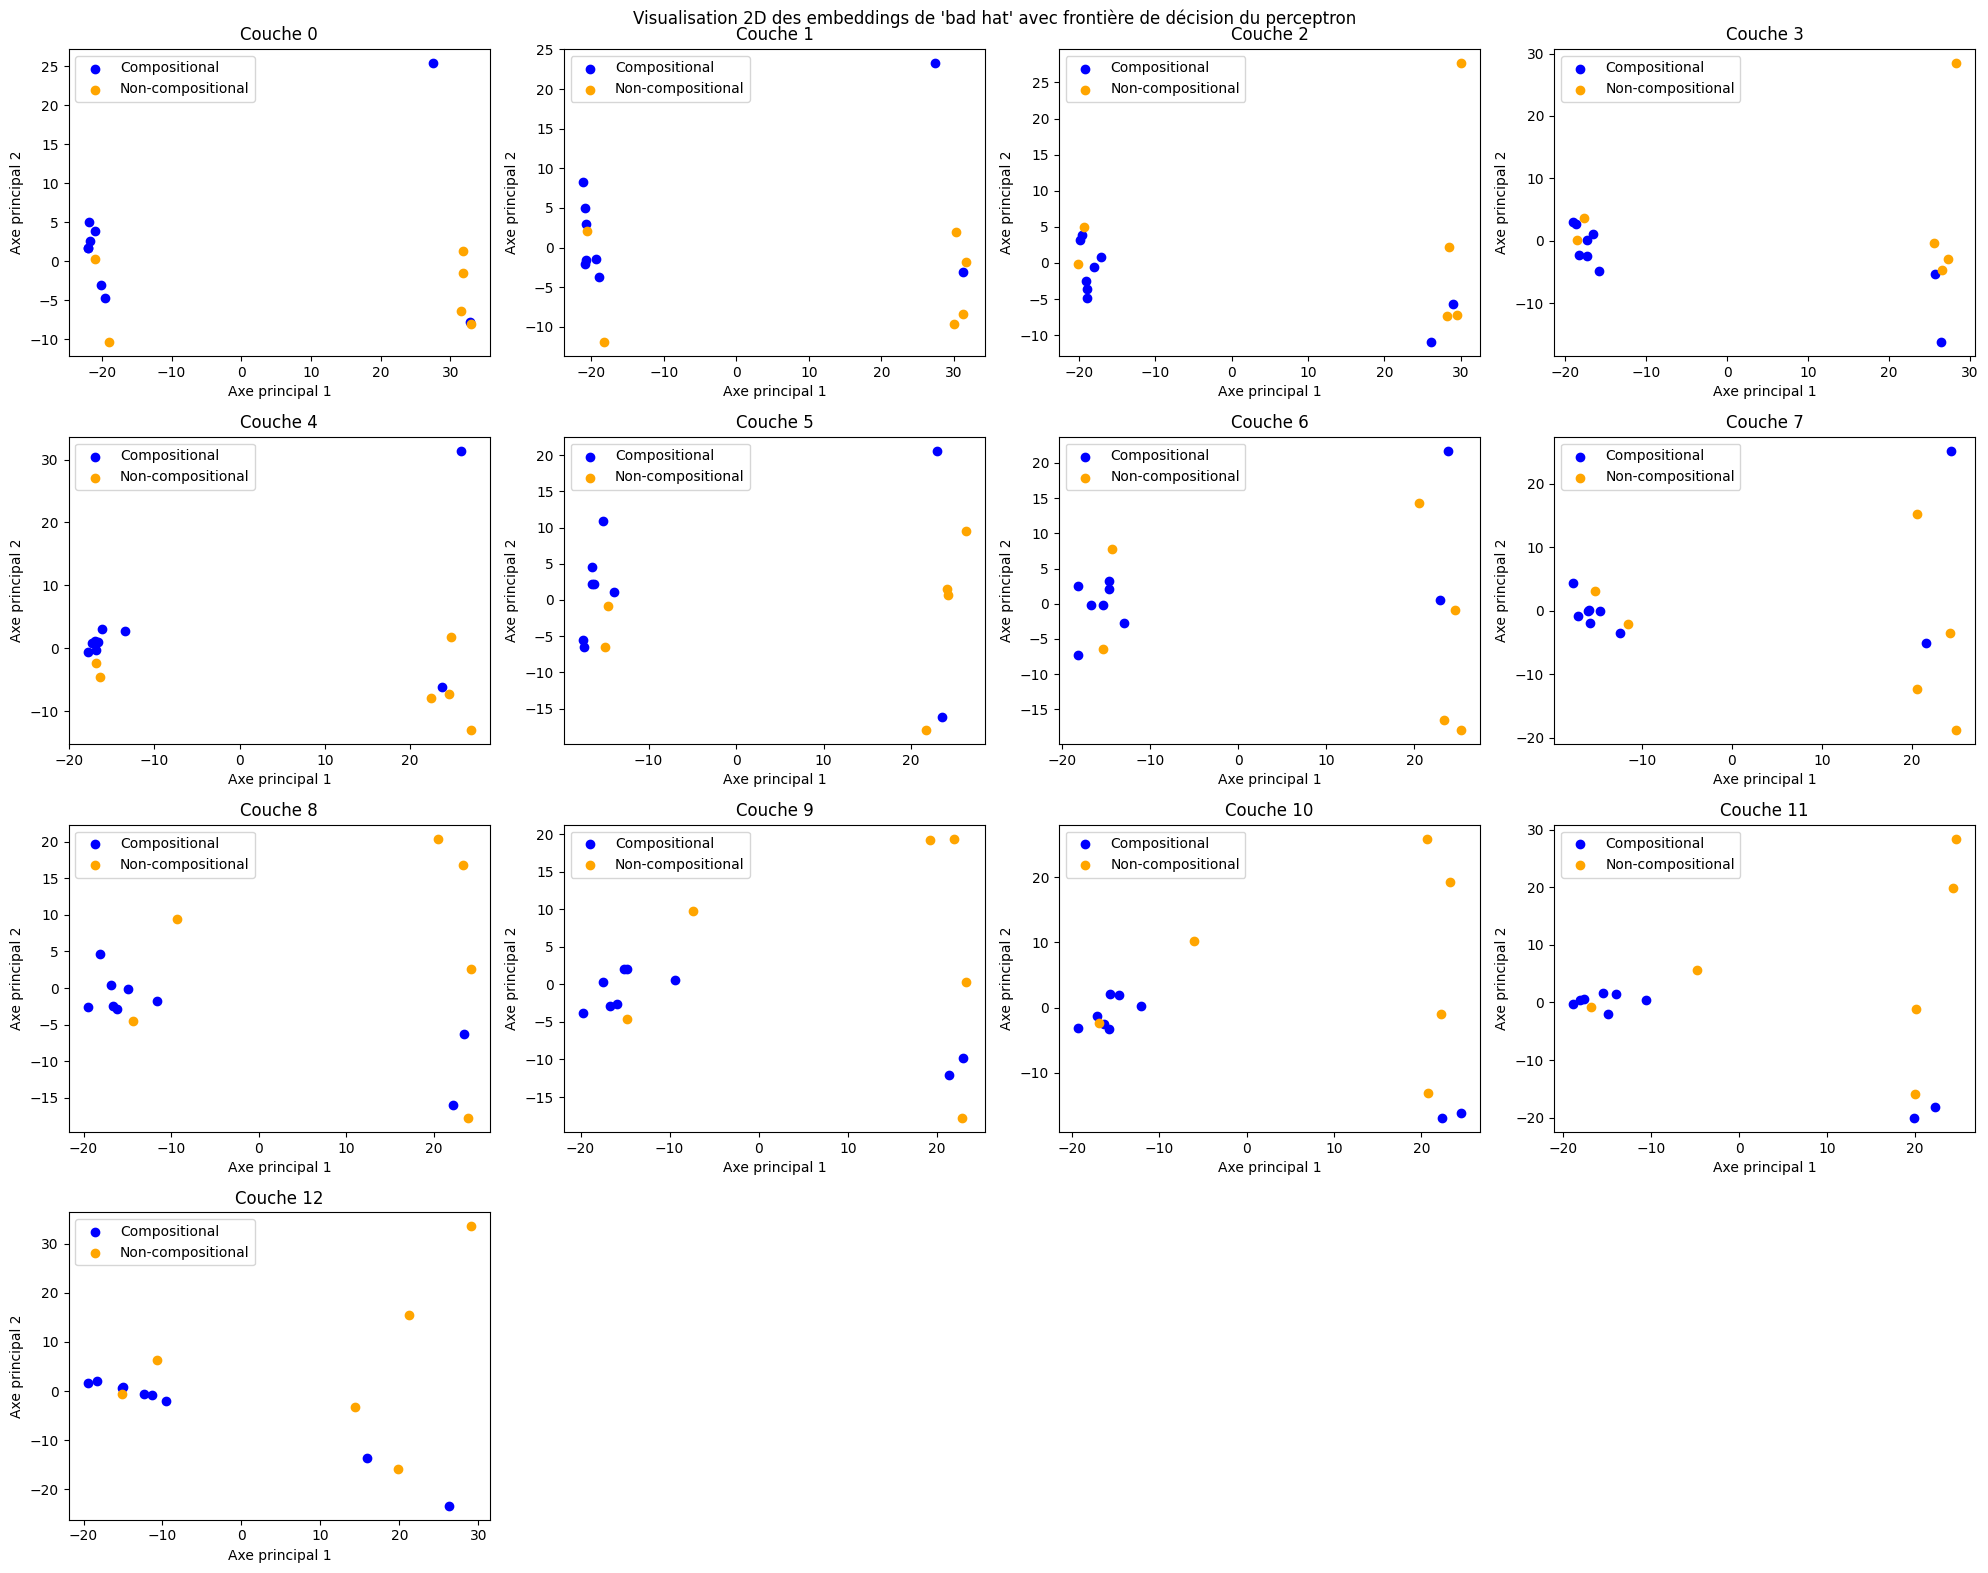

Layer 0
Training accuracy: 100.00% => data is linearly separable.
Layer 1
Training accuracy: 84.21% => data is not linearly separable.
Layer 2
Training accuracy: 63.16% => data is not linearly separable.
Layer 3
Training accuracy: 94.74% => data is not linearly separable.
Layer 4
Training accuracy: 94.74% => data is not linearly separable.
Layer 5
Training accuracy: 84.21% => data is not linearly separable.
Layer 6
Training accuracy: 94.74% => data is not linearly separable.
Layer 7
Training accuracy: 89.47% => data is not linearly separable.
Layer 8
Training accuracy: 84.21% => data is not linearly separable.
Layer 9
Training accuracy: 84.21% => data is not linearly separable.
Layer 10
Training accuracy: 94.74% => data is not linearly separable.
Layer 11
Training accuracy: 78.95% => data is not linearly separable.
Layer 12
Training accuracy: 84.21% => data is not linearly separable.


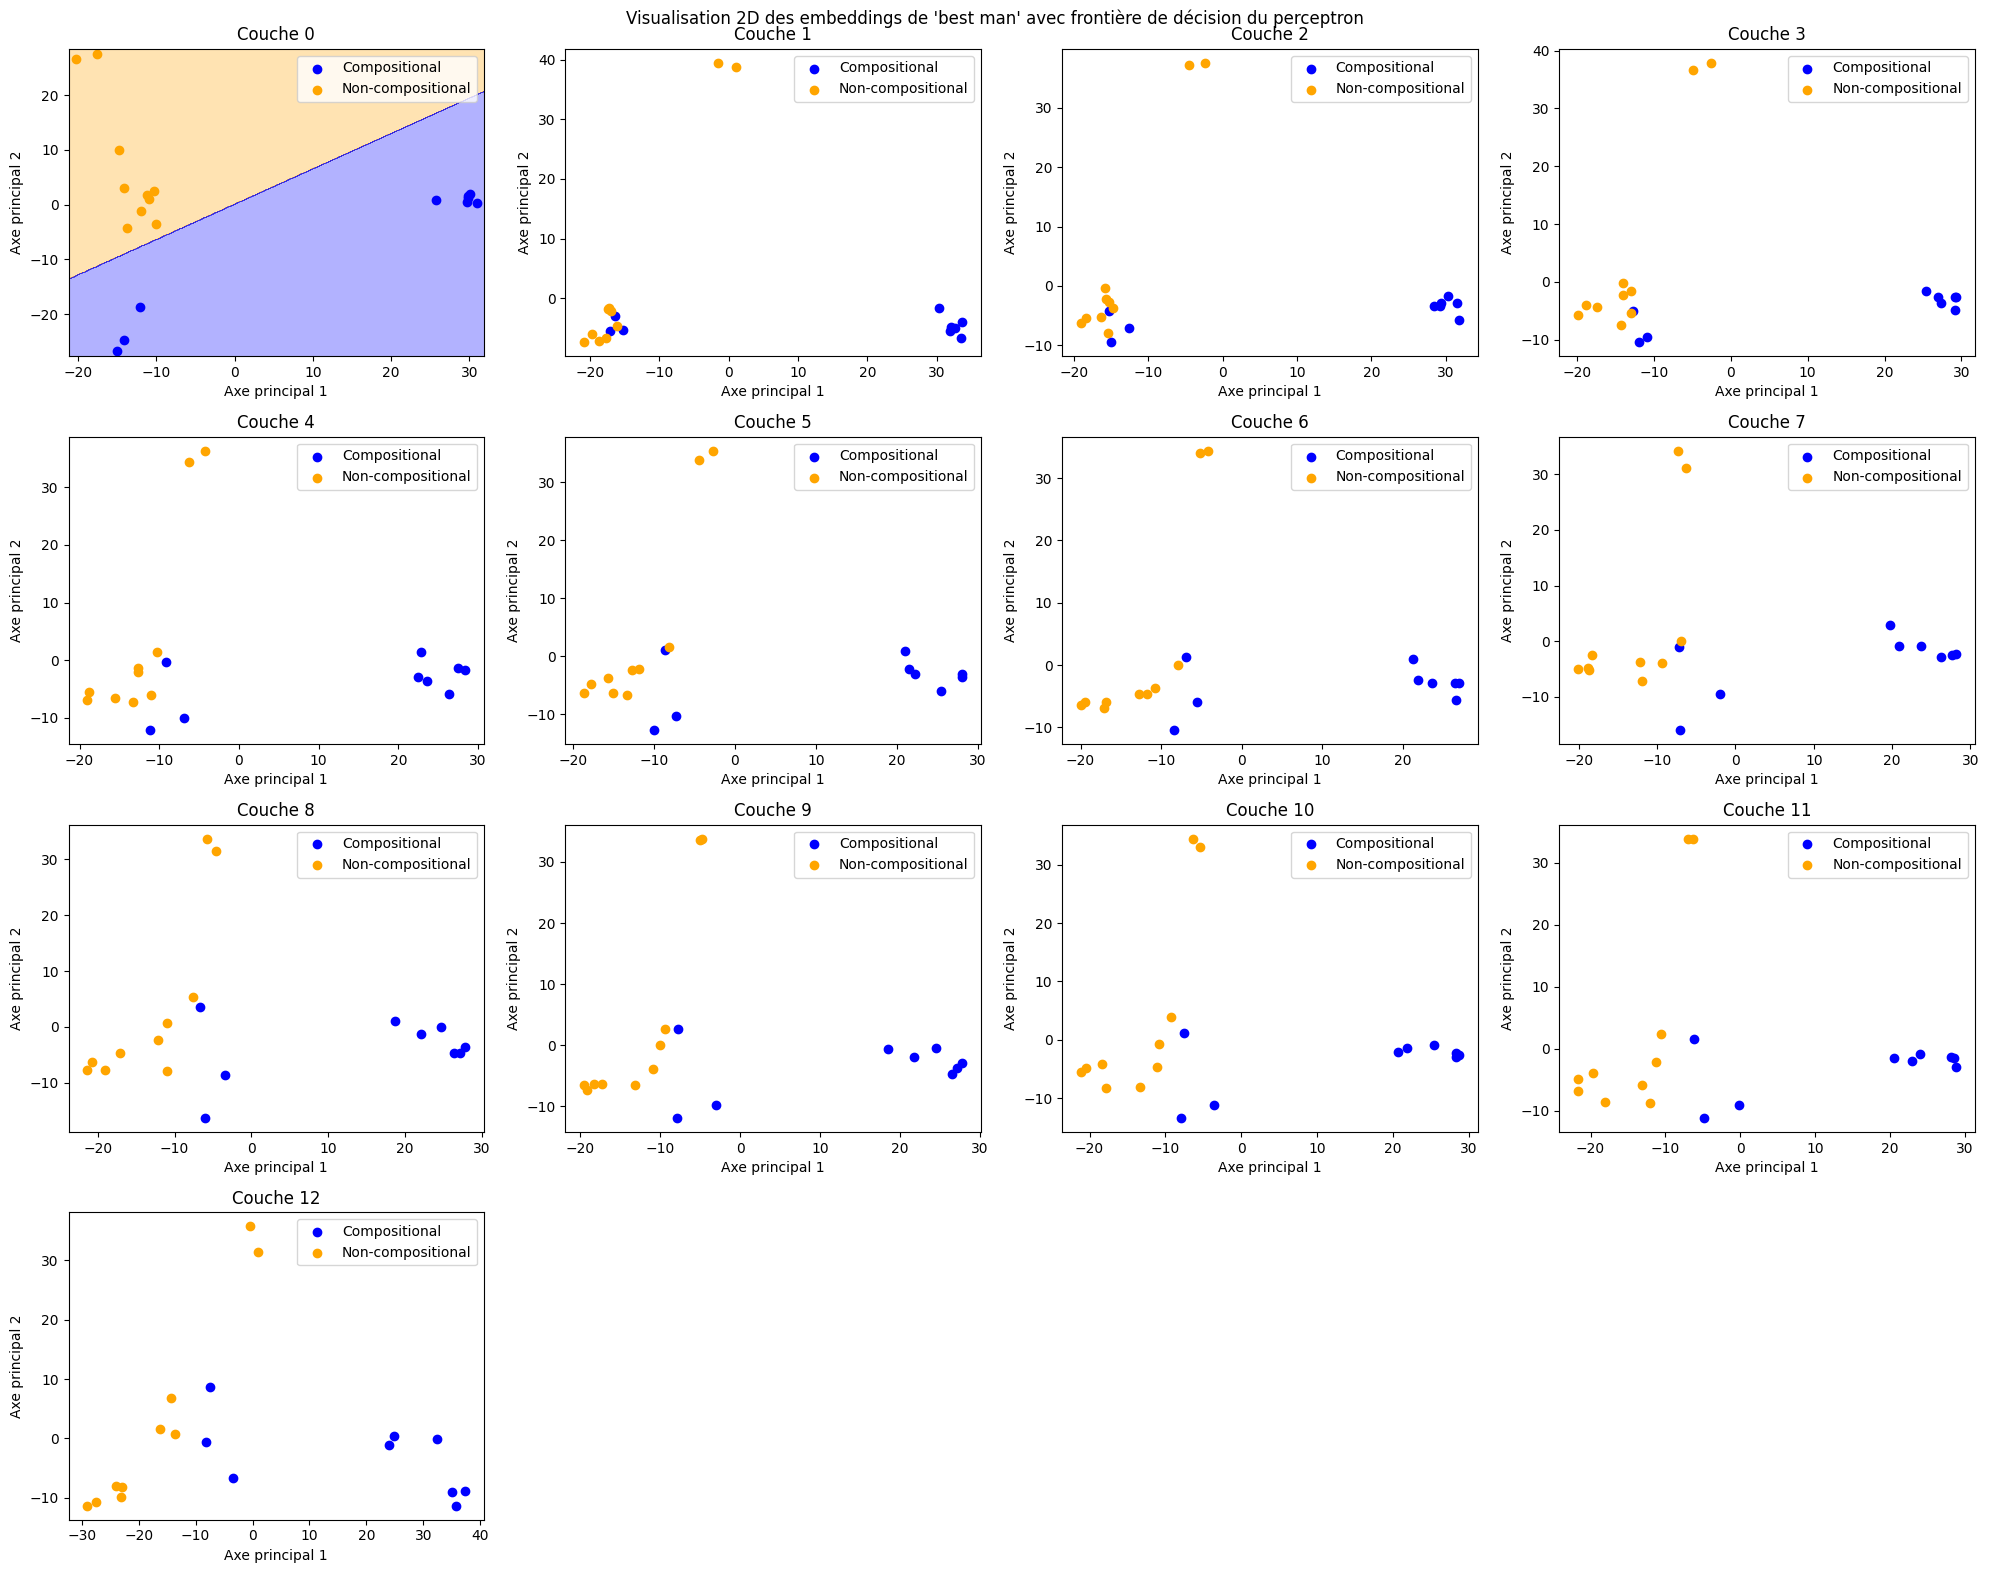

Layer 0
Training accuracy: 72.73% => data is not linearly separable.
Layer 1
Training accuracy: 45.45% => data is not linearly separable.
Layer 2
Training accuracy: 45.45% => data is not linearly separable.
Layer 3
Training accuracy: 63.64% => data is not linearly separable.
Layer 4
Training accuracy: 63.64% => data is not linearly separable.
Layer 5
Training accuracy: 63.64% => data is not linearly separable.
Layer 6
Training accuracy: 81.82% => data is not linearly separable.
Layer 7
Training accuracy: 81.82% => data is not linearly separable.
Layer 8
Training accuracy: 90.91% => data is not linearly separable.
Layer 9
Training accuracy: 63.64% => data is not linearly separable.
Layer 10
Training accuracy: 90.91% => data is not linearly separable.
Layer 11
Training accuracy: 63.64% => data is not linearly separable.
Layer 12
Training accuracy: 90.91% => data is not linearly separable.


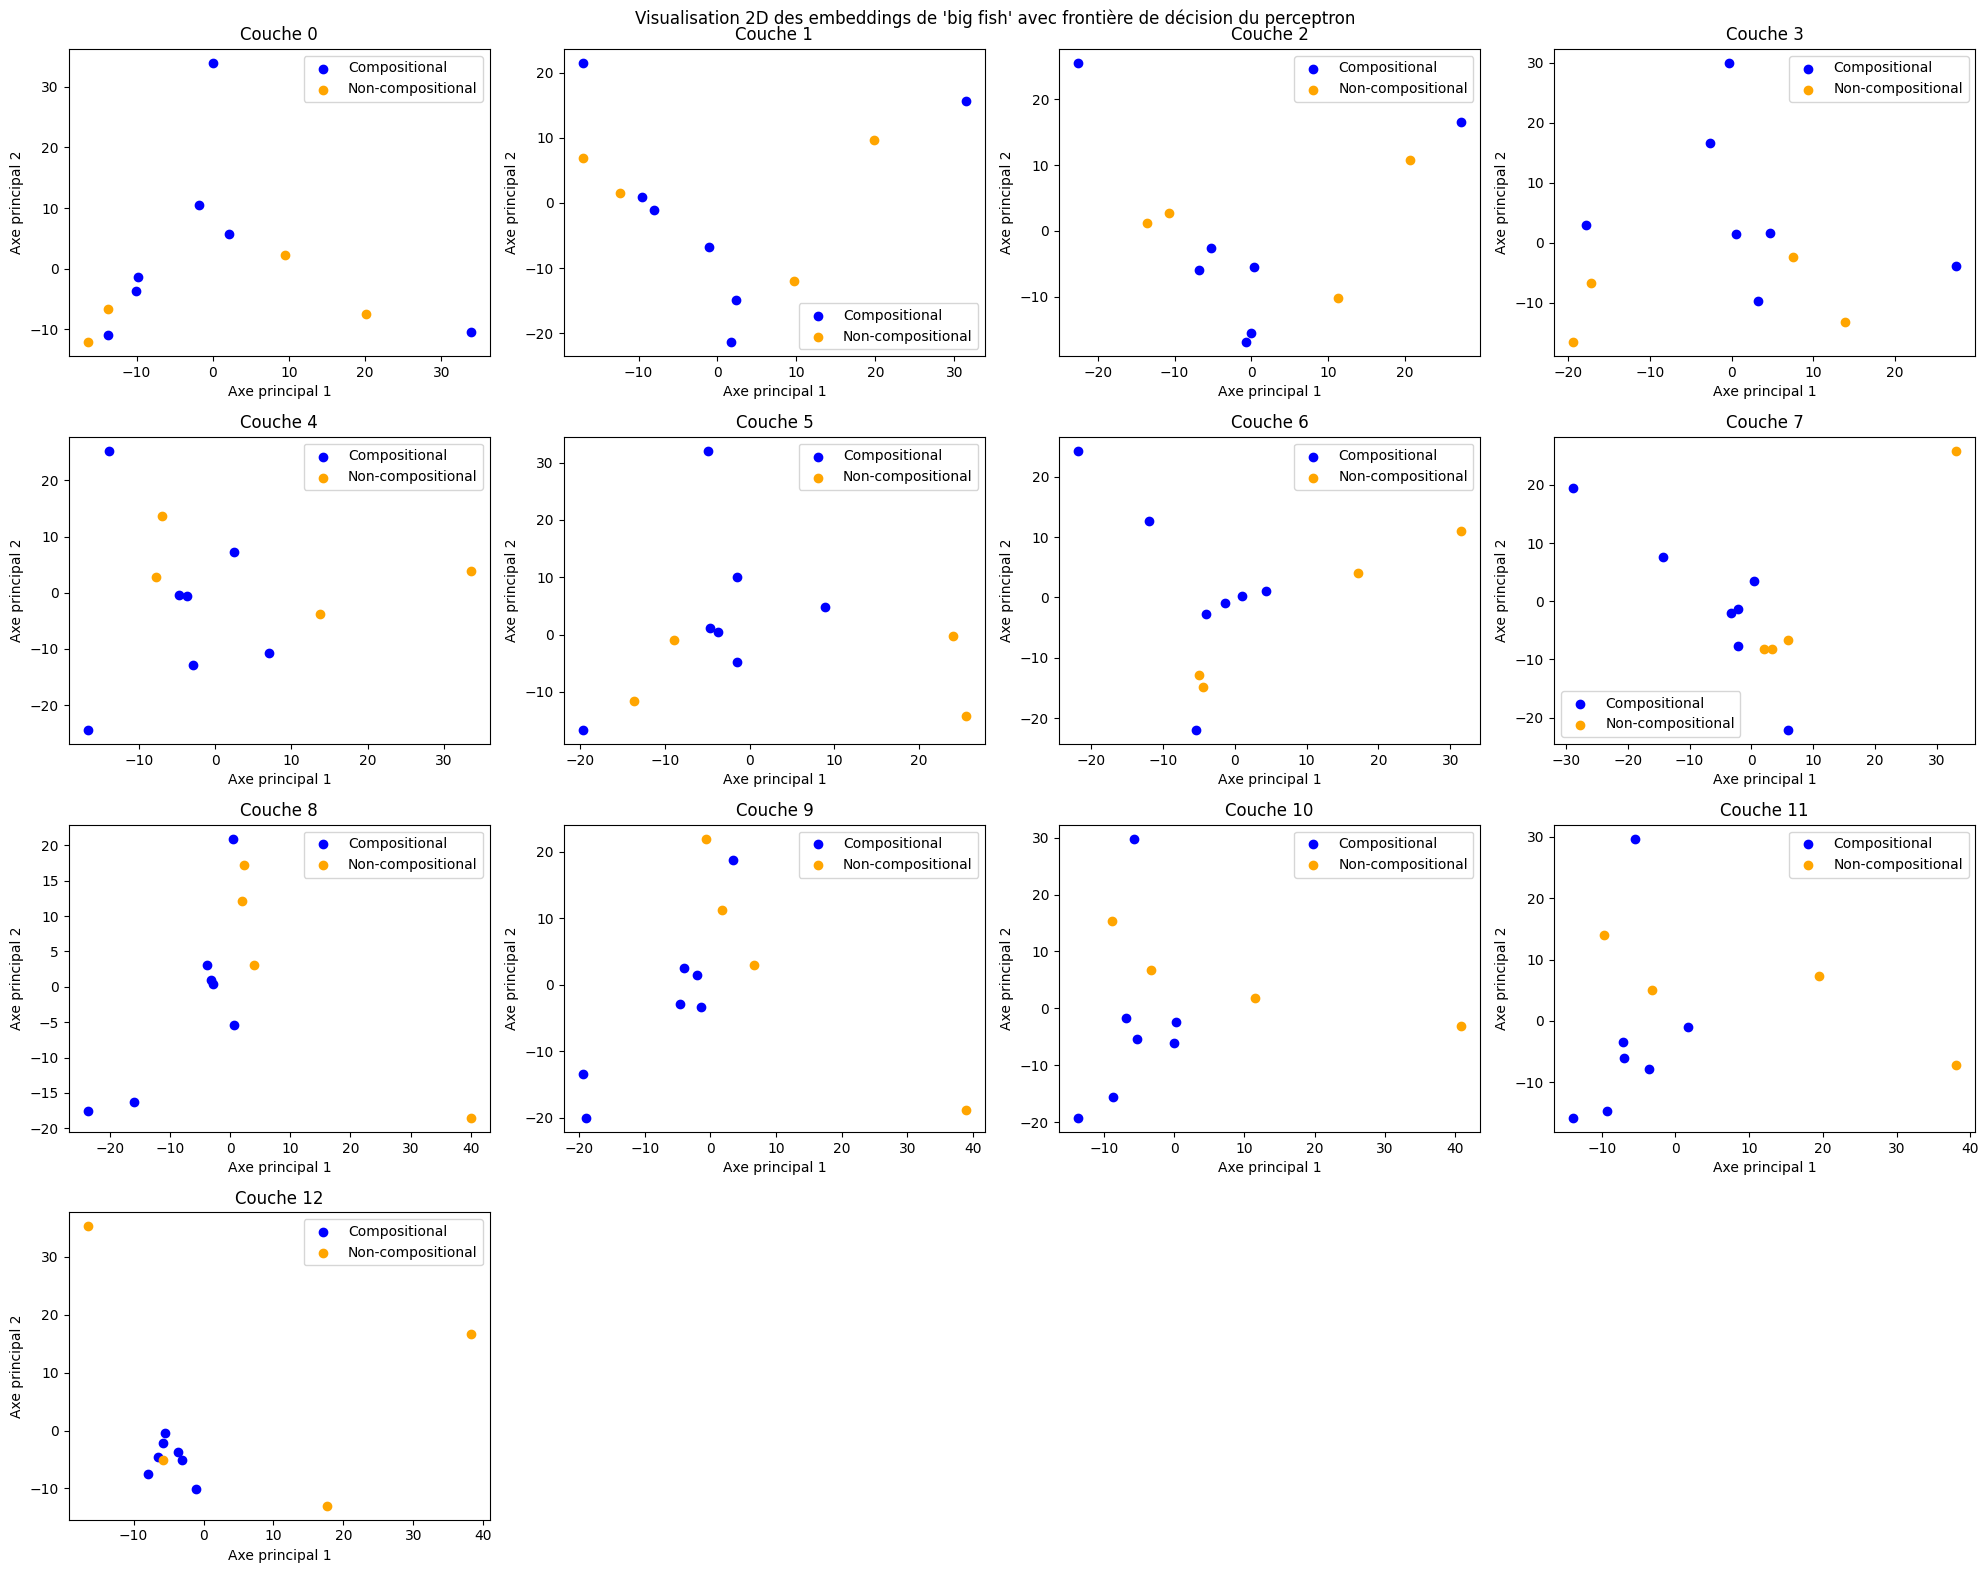

Layer 0
Training accuracy: 88.24% => data is not linearly separable.
Layer 1
Training accuracy: 94.12% => data is not linearly separable.
Layer 2
Training accuracy: 94.12% => data is not linearly separable.
Layer 3
Training accuracy: 94.12% => data is not linearly separable.
Layer 4
Training accuracy: 94.12% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 94.12% => data is not linearly separable.
Layer 7
Training accuracy: 94.12% => data is not linearly separable.
Layer 8
Training accuracy: 88.24% => data is not linearly separable.
Layer 9
Training accuracy: 94.12% => data is not linearly separable.
Layer 10
Training accuracy: 94.12% => data is not linearly separable.
Layer 11
Training accuracy: 76.47% => data is not linearly separable.
Layer 12
Training accuracy: 76.47% => data is not linearly separable.


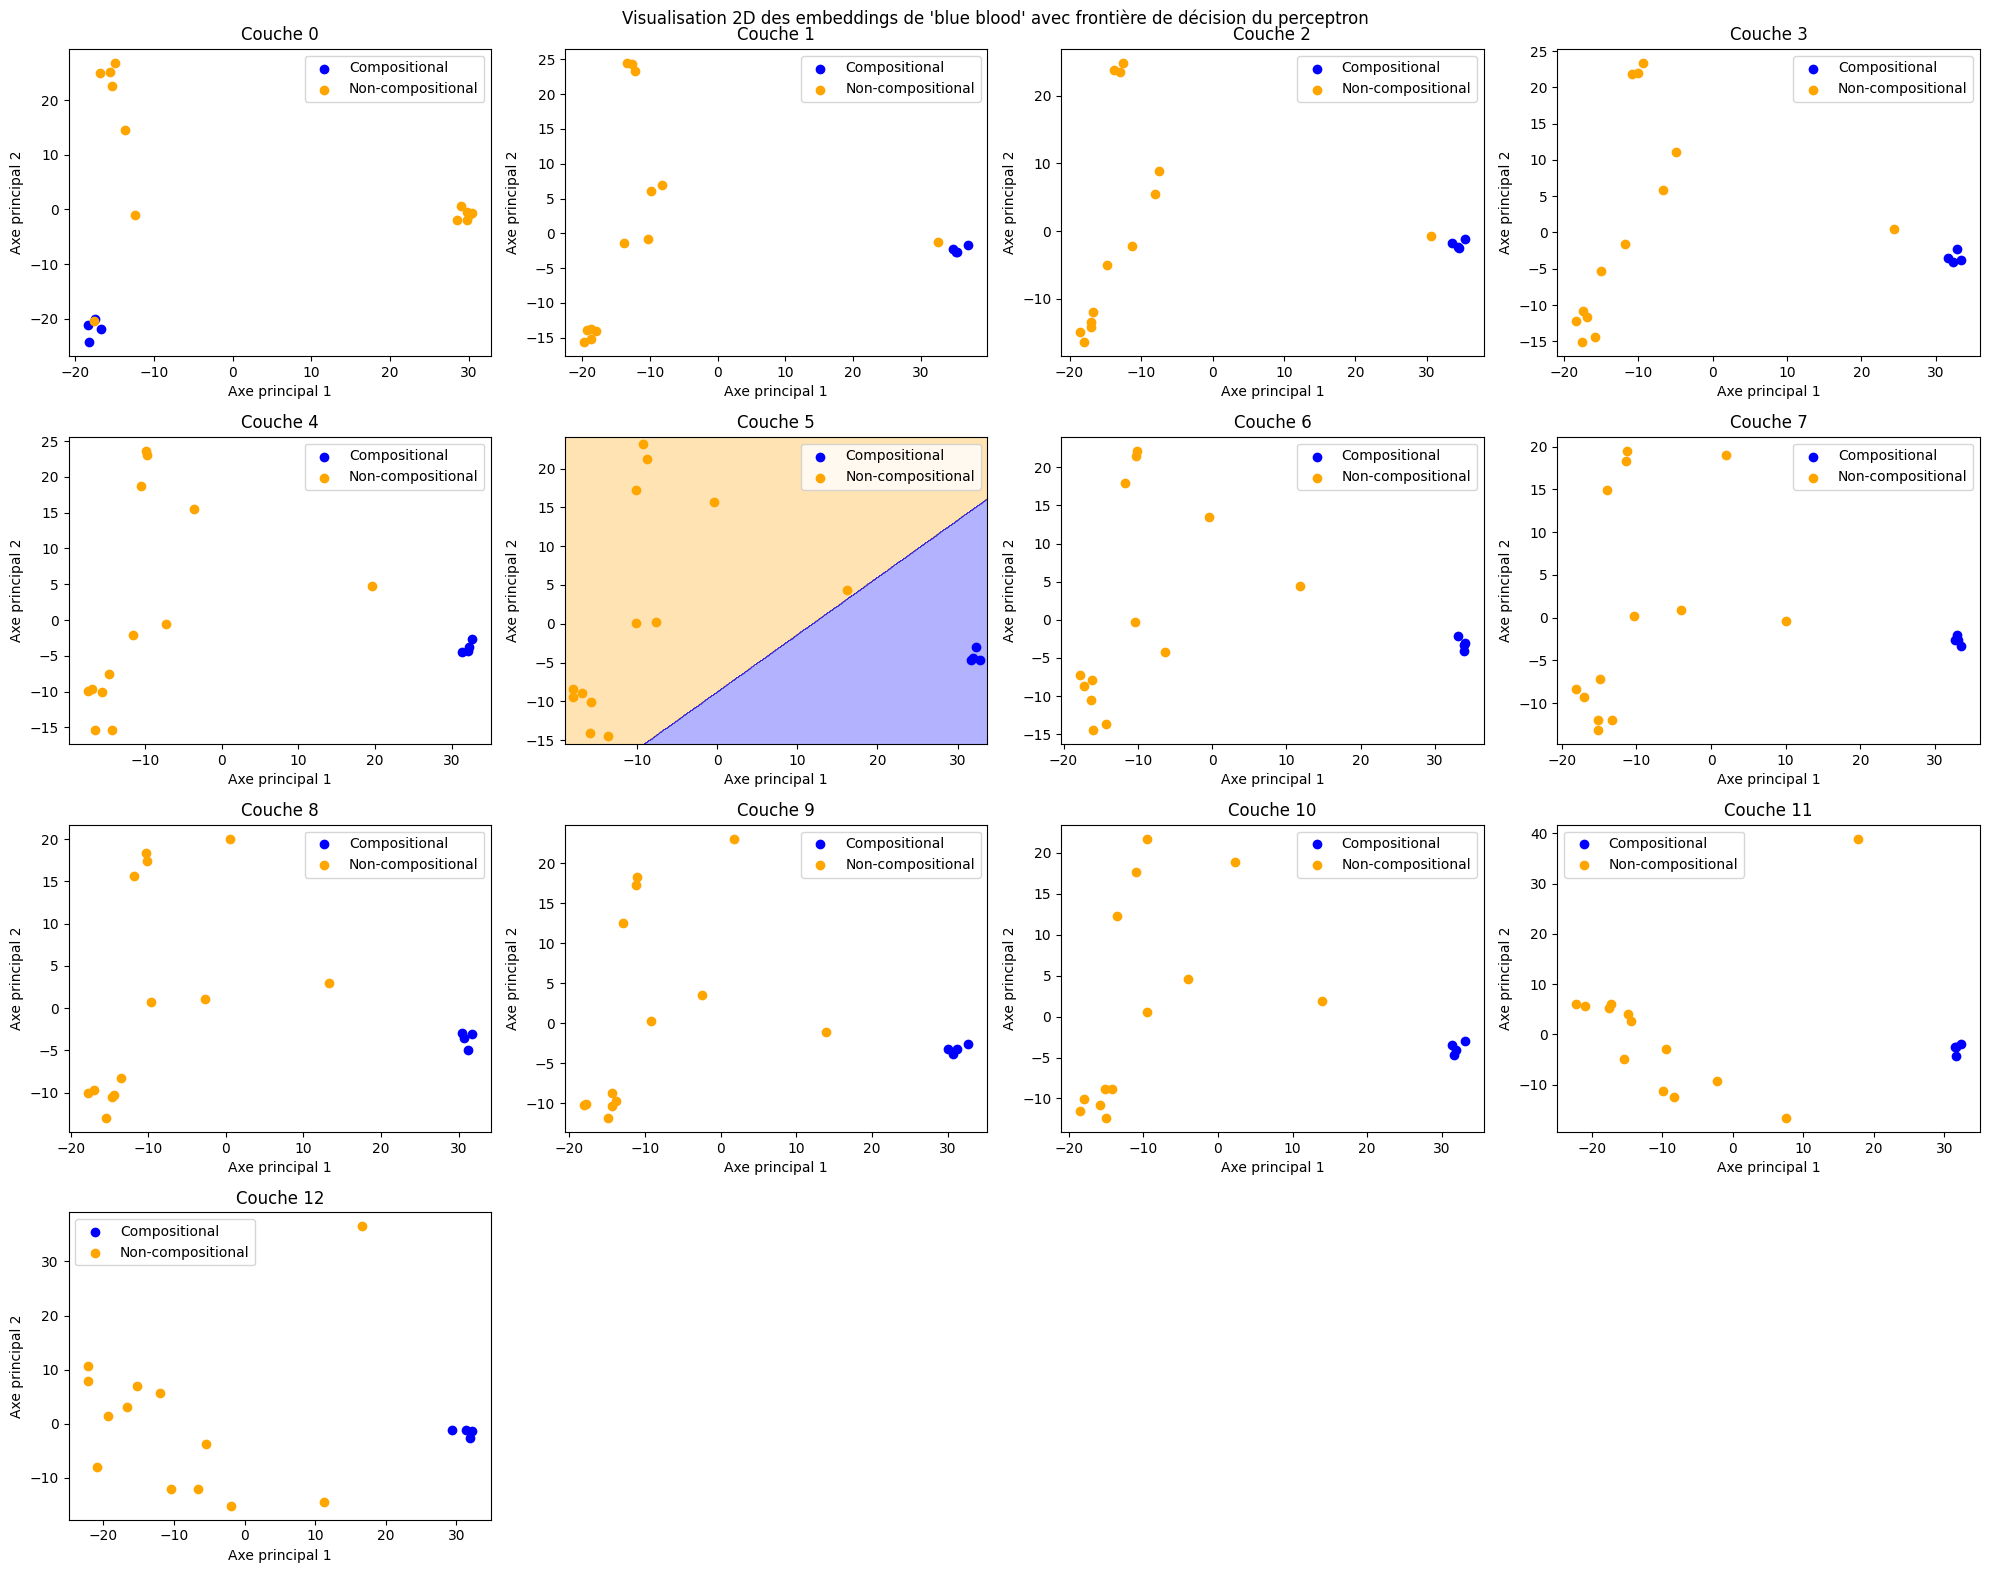

Layer 0
Training accuracy: 52.00% => data is not linearly separable.
Layer 1
Training accuracy: 68.00% => data is not linearly separable.
Layer 2
Training accuracy: 68.00% => data is not linearly separable.
Layer 3
Training accuracy: 80.00% => data is not linearly separable.
Layer 4
Training accuracy: 76.00% => data is not linearly separable.
Layer 5
Training accuracy: 84.00% => data is not linearly separable.
Layer 6
Training accuracy: 92.00% => data is not linearly separable.
Layer 7
Training accuracy: 72.00% => data is not linearly separable.
Layer 8
Training accuracy: 84.00% => data is not linearly separable.
Layer 9
Training accuracy: 84.00% => data is not linearly separable.
Layer 10
Training accuracy: 84.00% => data is not linearly separable.
Layer 11
Training accuracy: 80.00% => data is not linearly separable.
Layer 12
Training accuracy: 64.00% => data is not linearly separable.


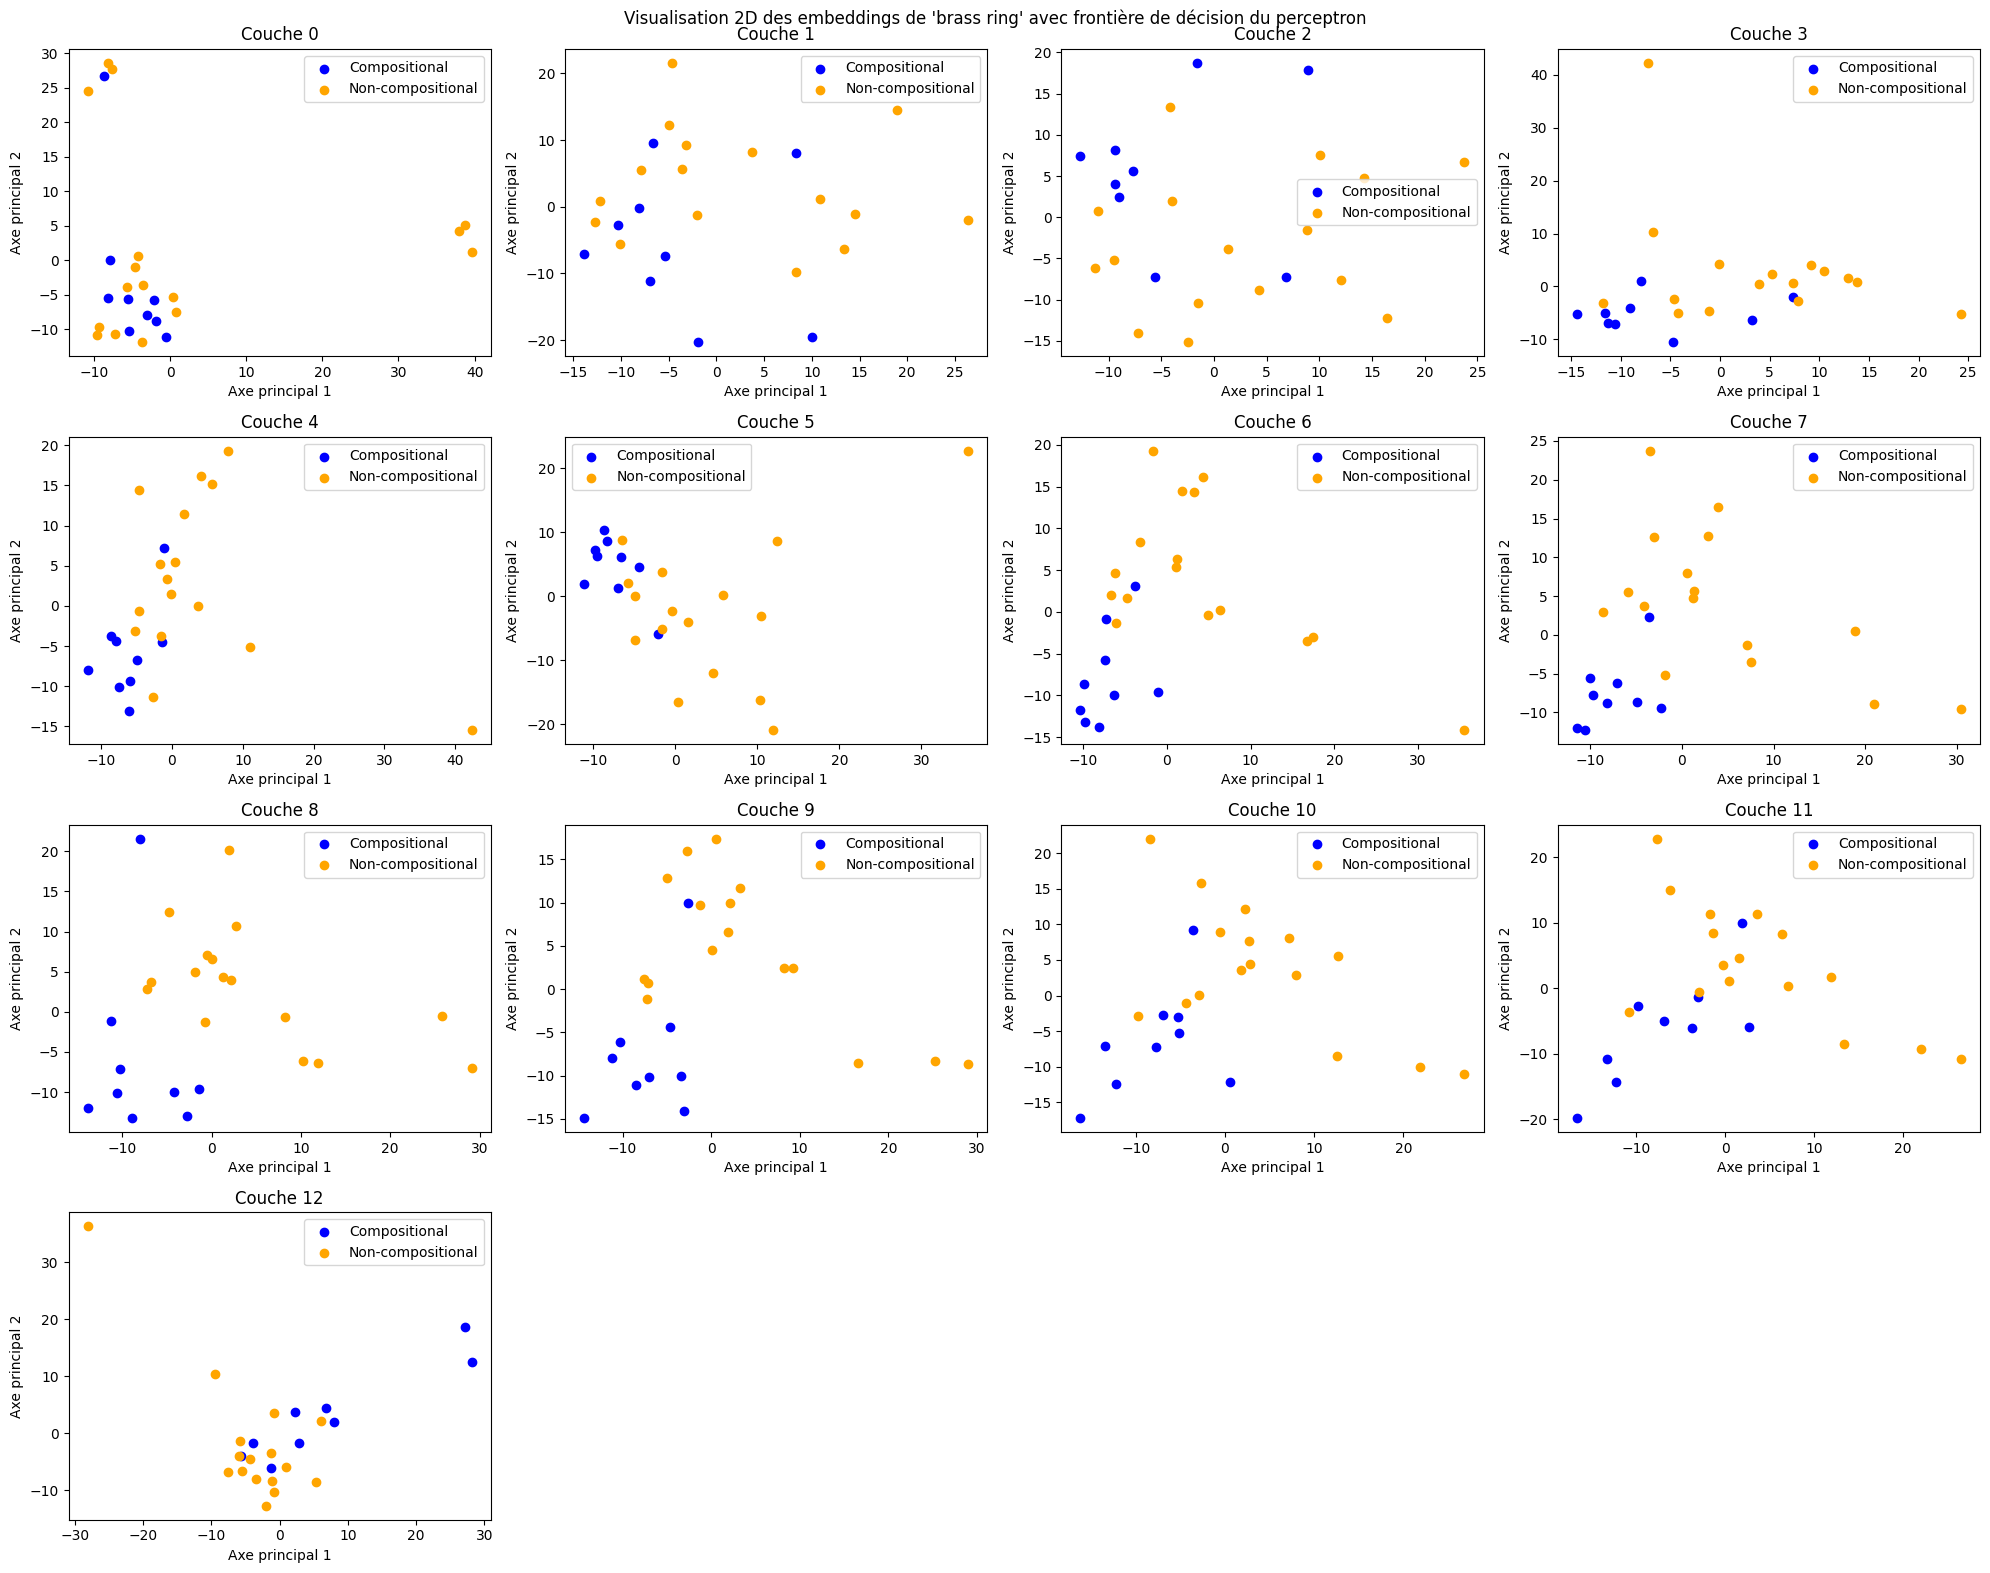

Layer 0
Training accuracy: 93.33% => data is not linearly separable.
Layer 1
Training accuracy: 93.33% => data is not linearly separable.
Layer 2
Training accuracy: 93.33% => data is not linearly separable.
Layer 3
Training accuracy: 93.33% => data is not linearly separable.
Layer 4
Training accuracy: 93.33% => data is not linearly separable.
Layer 5
Training accuracy: 93.33% => data is not linearly separable.
Layer 6
Training accuracy: 93.33% => data is not linearly separable.
Layer 7
Training accuracy: 80.00% => data is not linearly separable.
Layer 8
Training accuracy: 93.33% => data is not linearly separable.
Layer 9
Training accuracy: 93.33% => data is not linearly separable.
Layer 10
Training accuracy: 93.33% => data is not linearly separable.
Layer 11
Training accuracy: 93.33% => data is not linearly separable.
Layer 12
Training accuracy: 93.33% => data is not linearly separable.


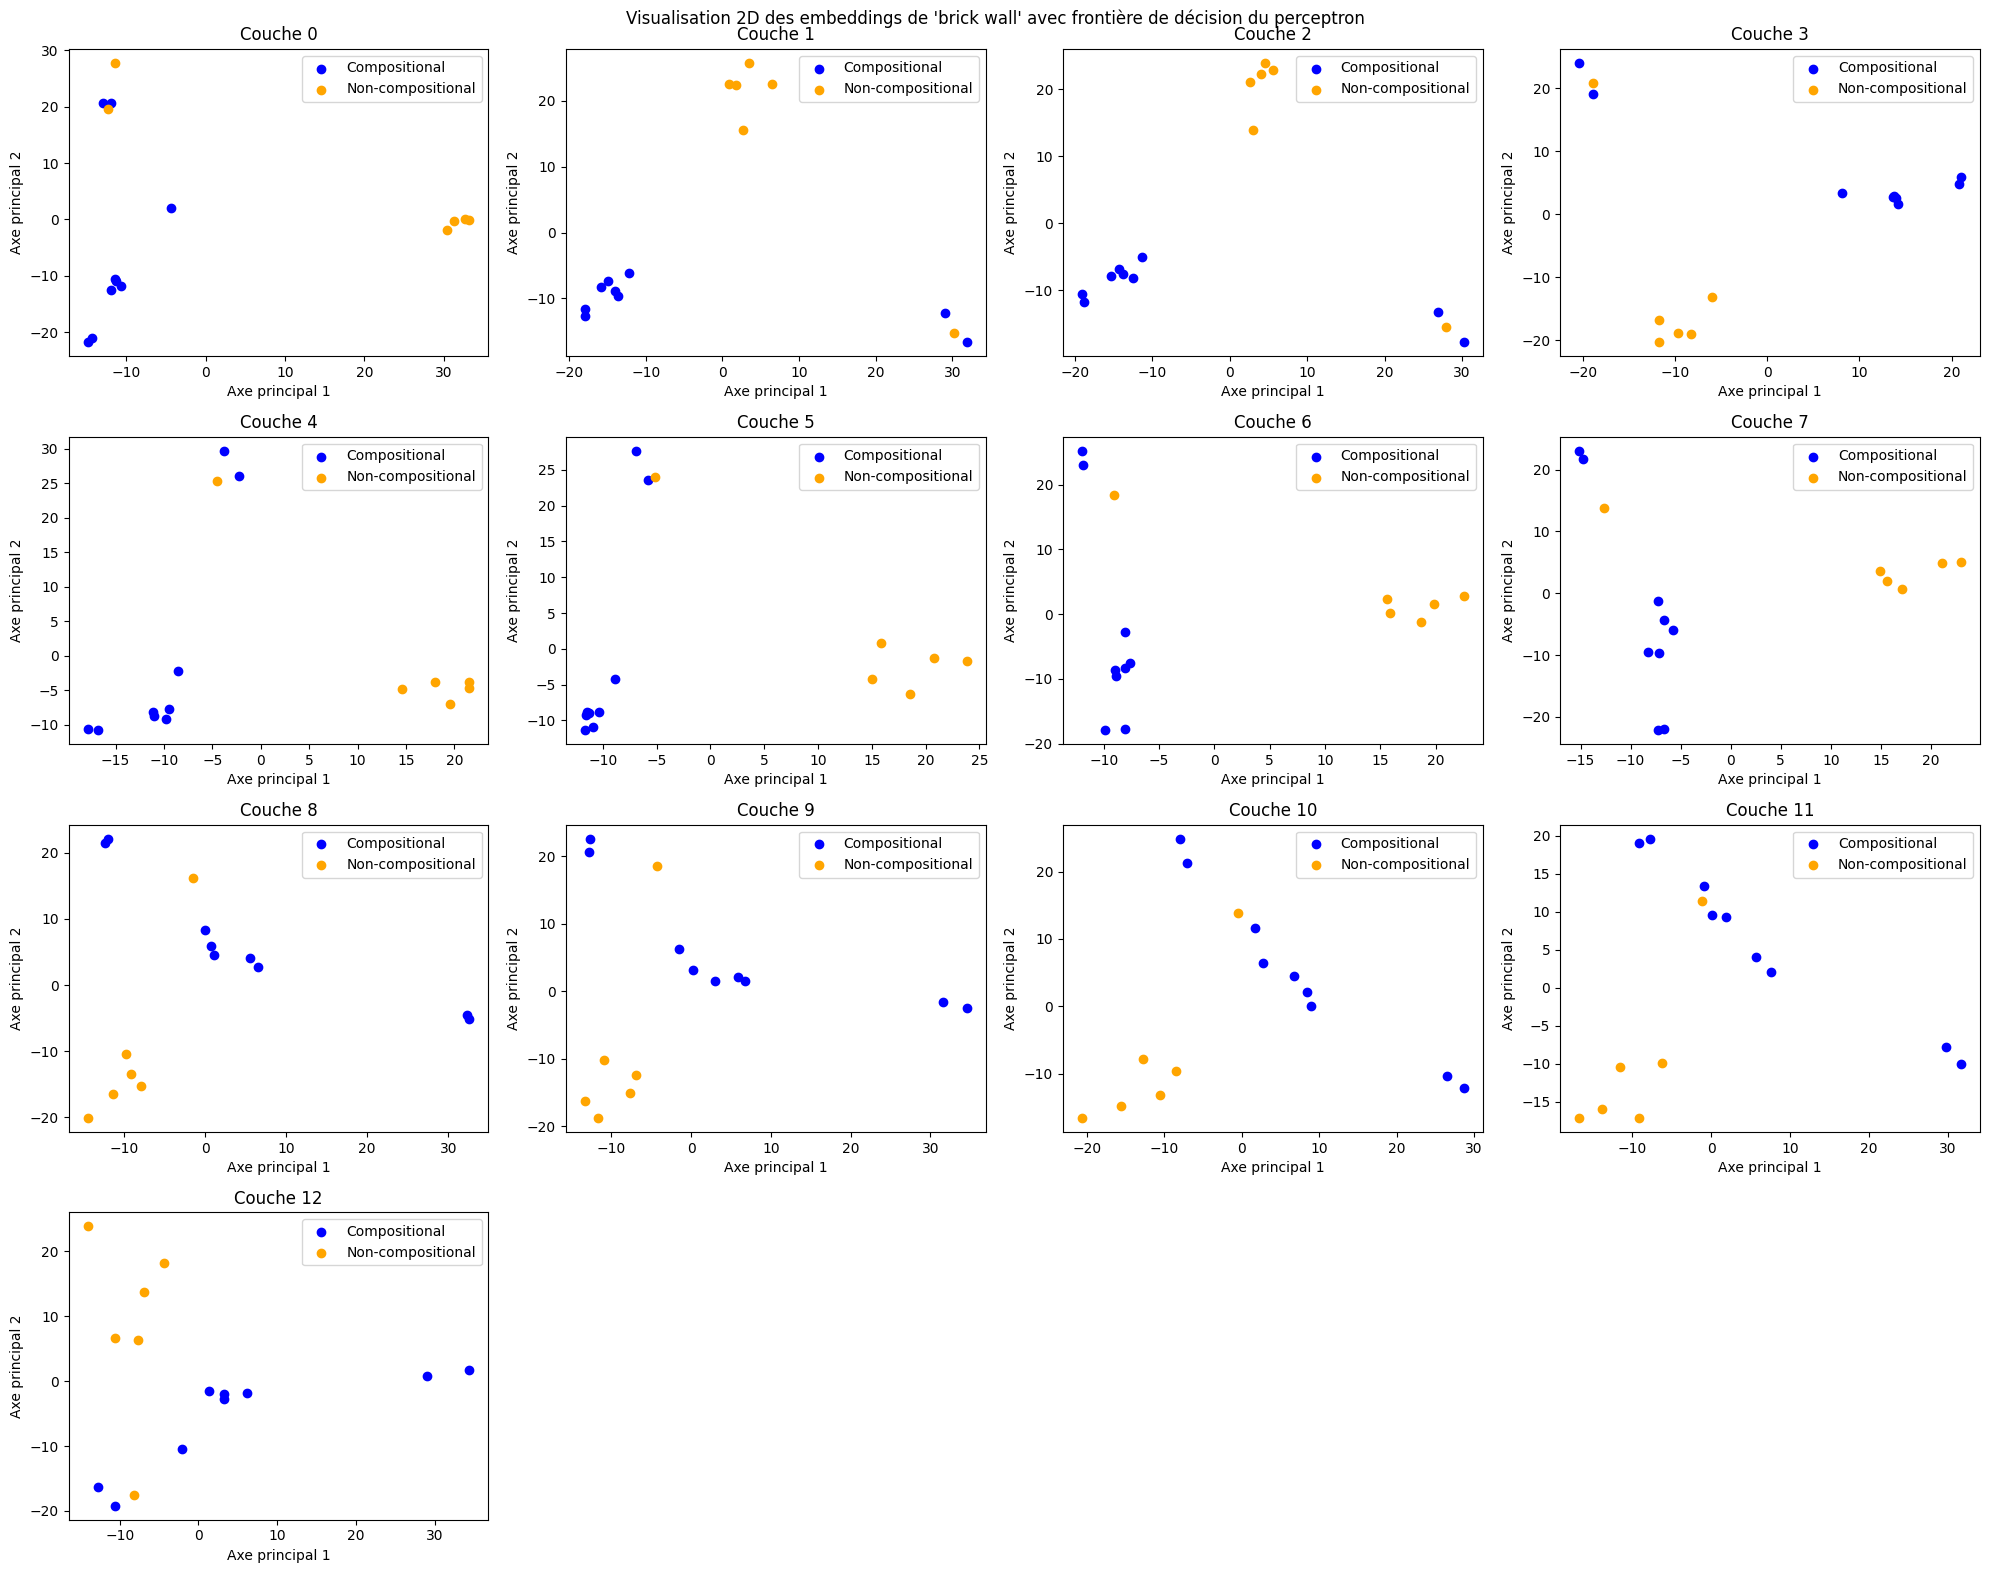

Layer 0
Training accuracy: 66.67% => data is not linearly separable.
Layer 1
Training accuracy: 80.00% => data is not linearly separable.
Layer 2
Training accuracy: 86.67% => data is not linearly separable.
Layer 3
Training accuracy: 86.67% => data is not linearly separable.
Layer 4
Training accuracy: 93.33% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 93.33% => data is not linearly separable.
Layer 11
Training accuracy: 80.00% => data is not linearly separable.
Layer 12
Training accuracy: 93.33% => data is not linearly separable.


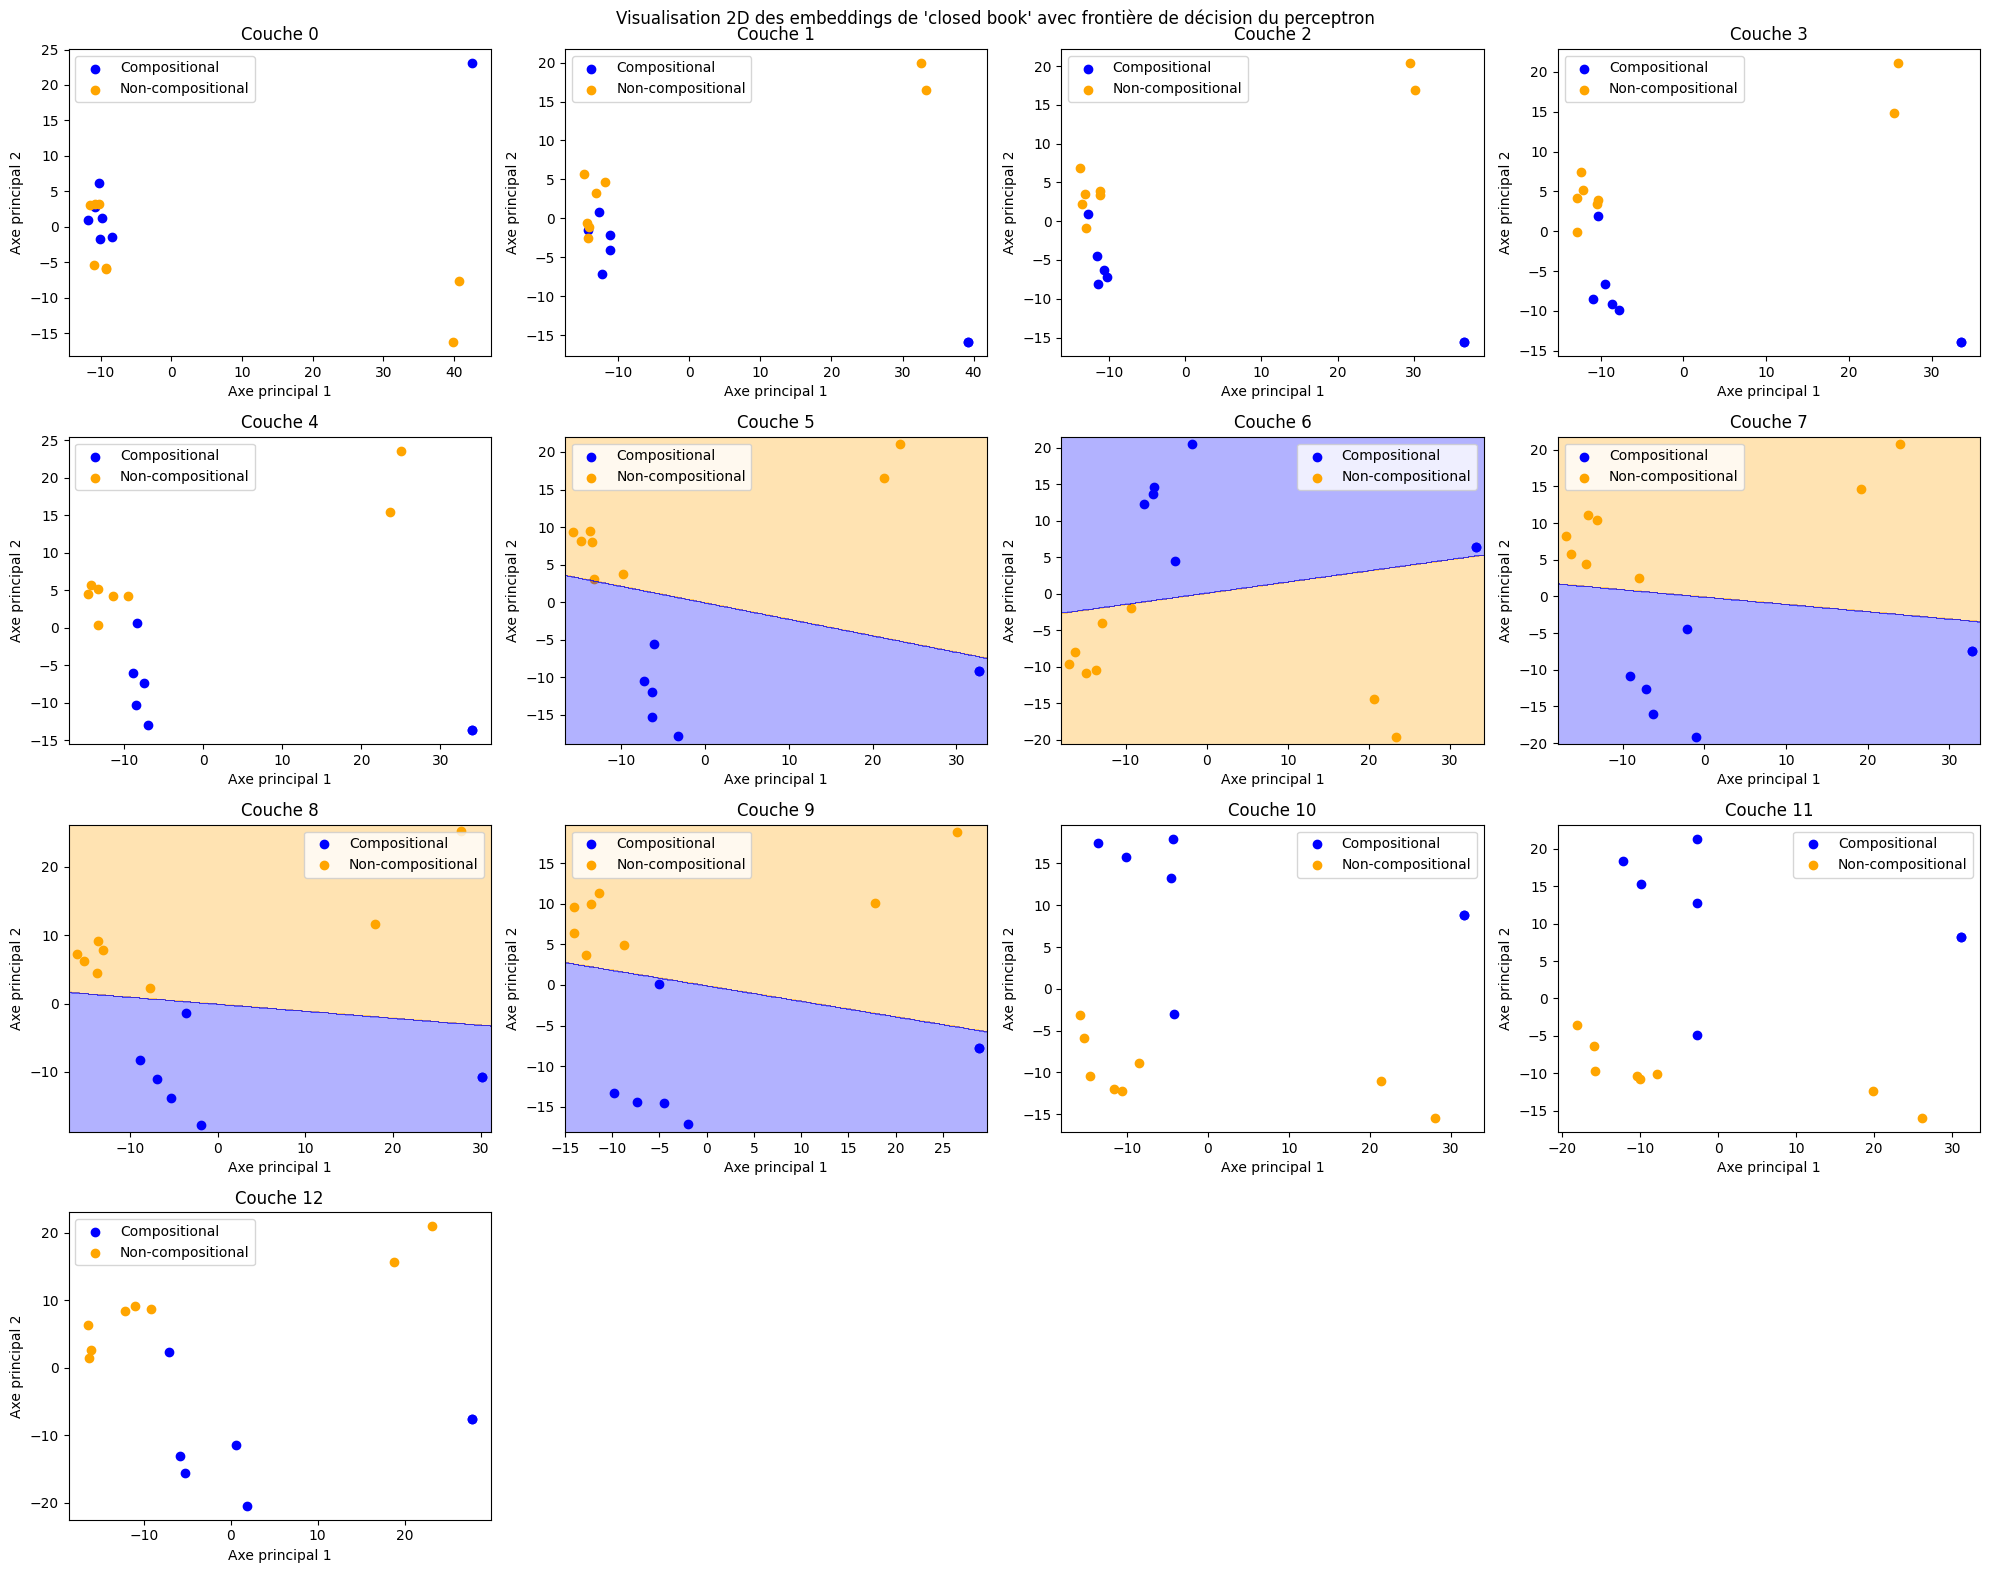

Layer 0
Training accuracy: 44.44% => data is not linearly separable.
Layer 1
Training accuracy: 44.44% => data is not linearly separable.
Layer 2
Training accuracy: 55.56% => data is not linearly separable.
Layer 3
Training accuracy: 77.78% => data is not linearly separable.
Layer 4
Training accuracy: 94.44% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


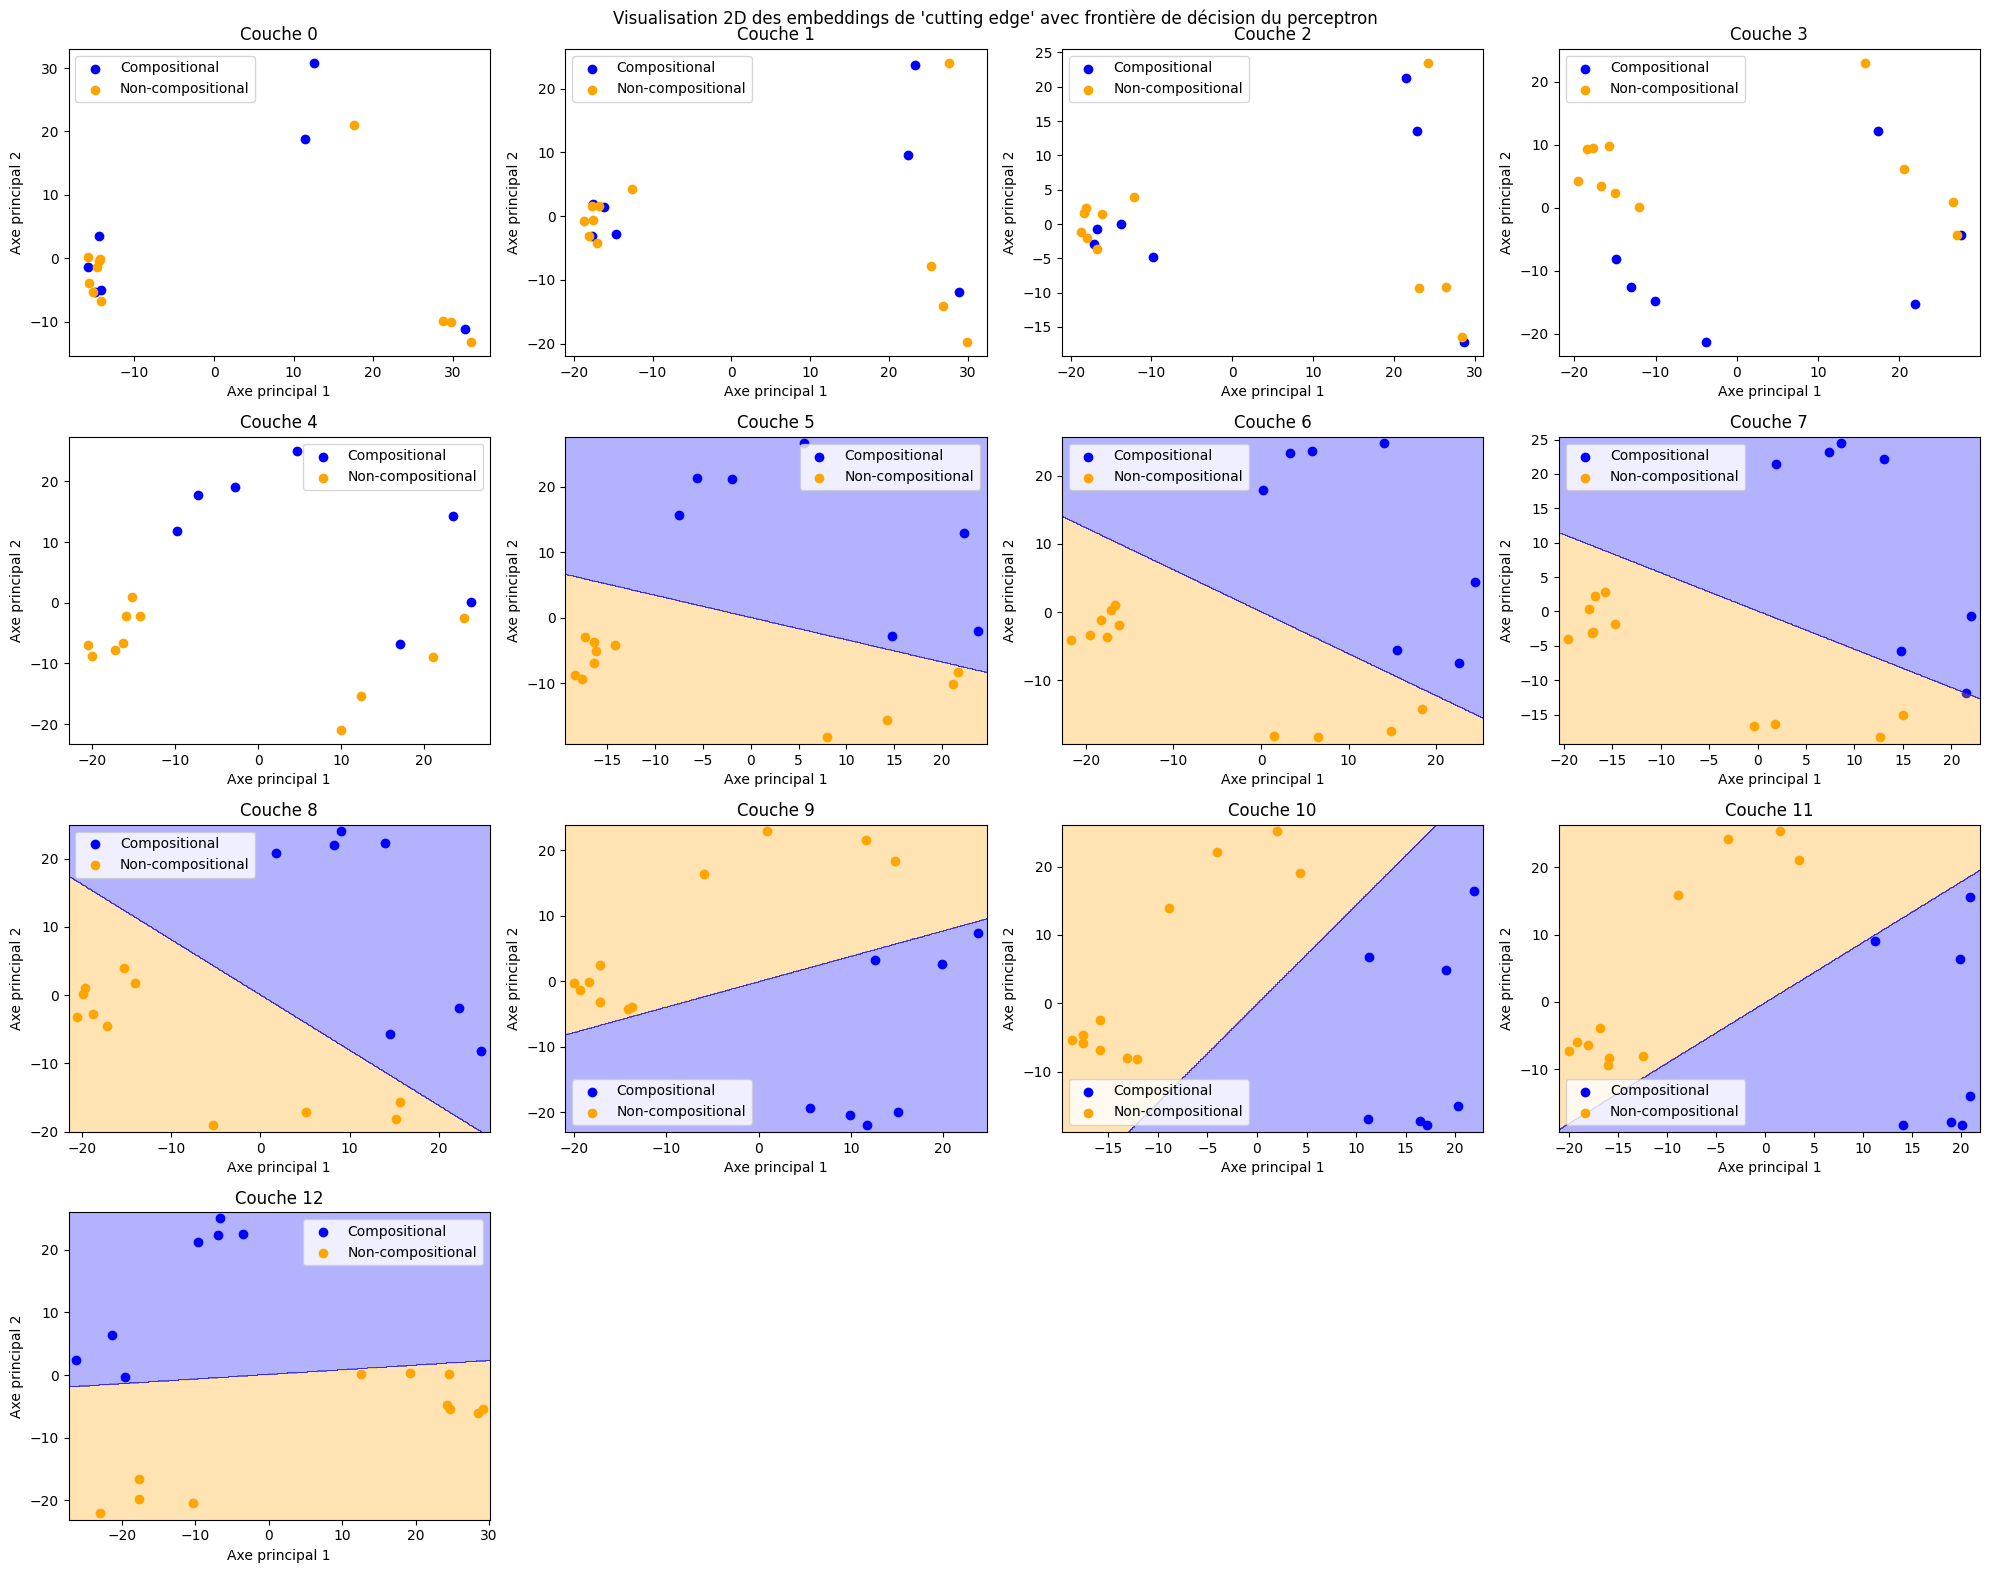

Layer 0
Training accuracy: 76.19% => data is not linearly separable.
Layer 1
Training accuracy: 80.95% => data is not linearly separable.
Layer 2
Training accuracy: 80.95% => data is not linearly separable.
Layer 3
Training accuracy: 85.71% => data is not linearly separable.
Layer 4
Training accuracy: 47.62% => data is not linearly separable.
Layer 5
Training accuracy: 95.24% => data is not linearly separable.
Layer 6
Training accuracy: 61.90% => data is not linearly separable.
Layer 7
Training accuracy: 80.95% => data is not linearly separable.
Layer 8
Training accuracy: 95.24% => data is not linearly separable.
Layer 9
Training accuracy: 95.24% => data is not linearly separable.
Layer 10
Training accuracy: 80.95% => data is not linearly separable.
Layer 11
Training accuracy: 80.95% => data is not linearly separable.
Layer 12
Training accuracy: 95.24% => data is not linearly separable.


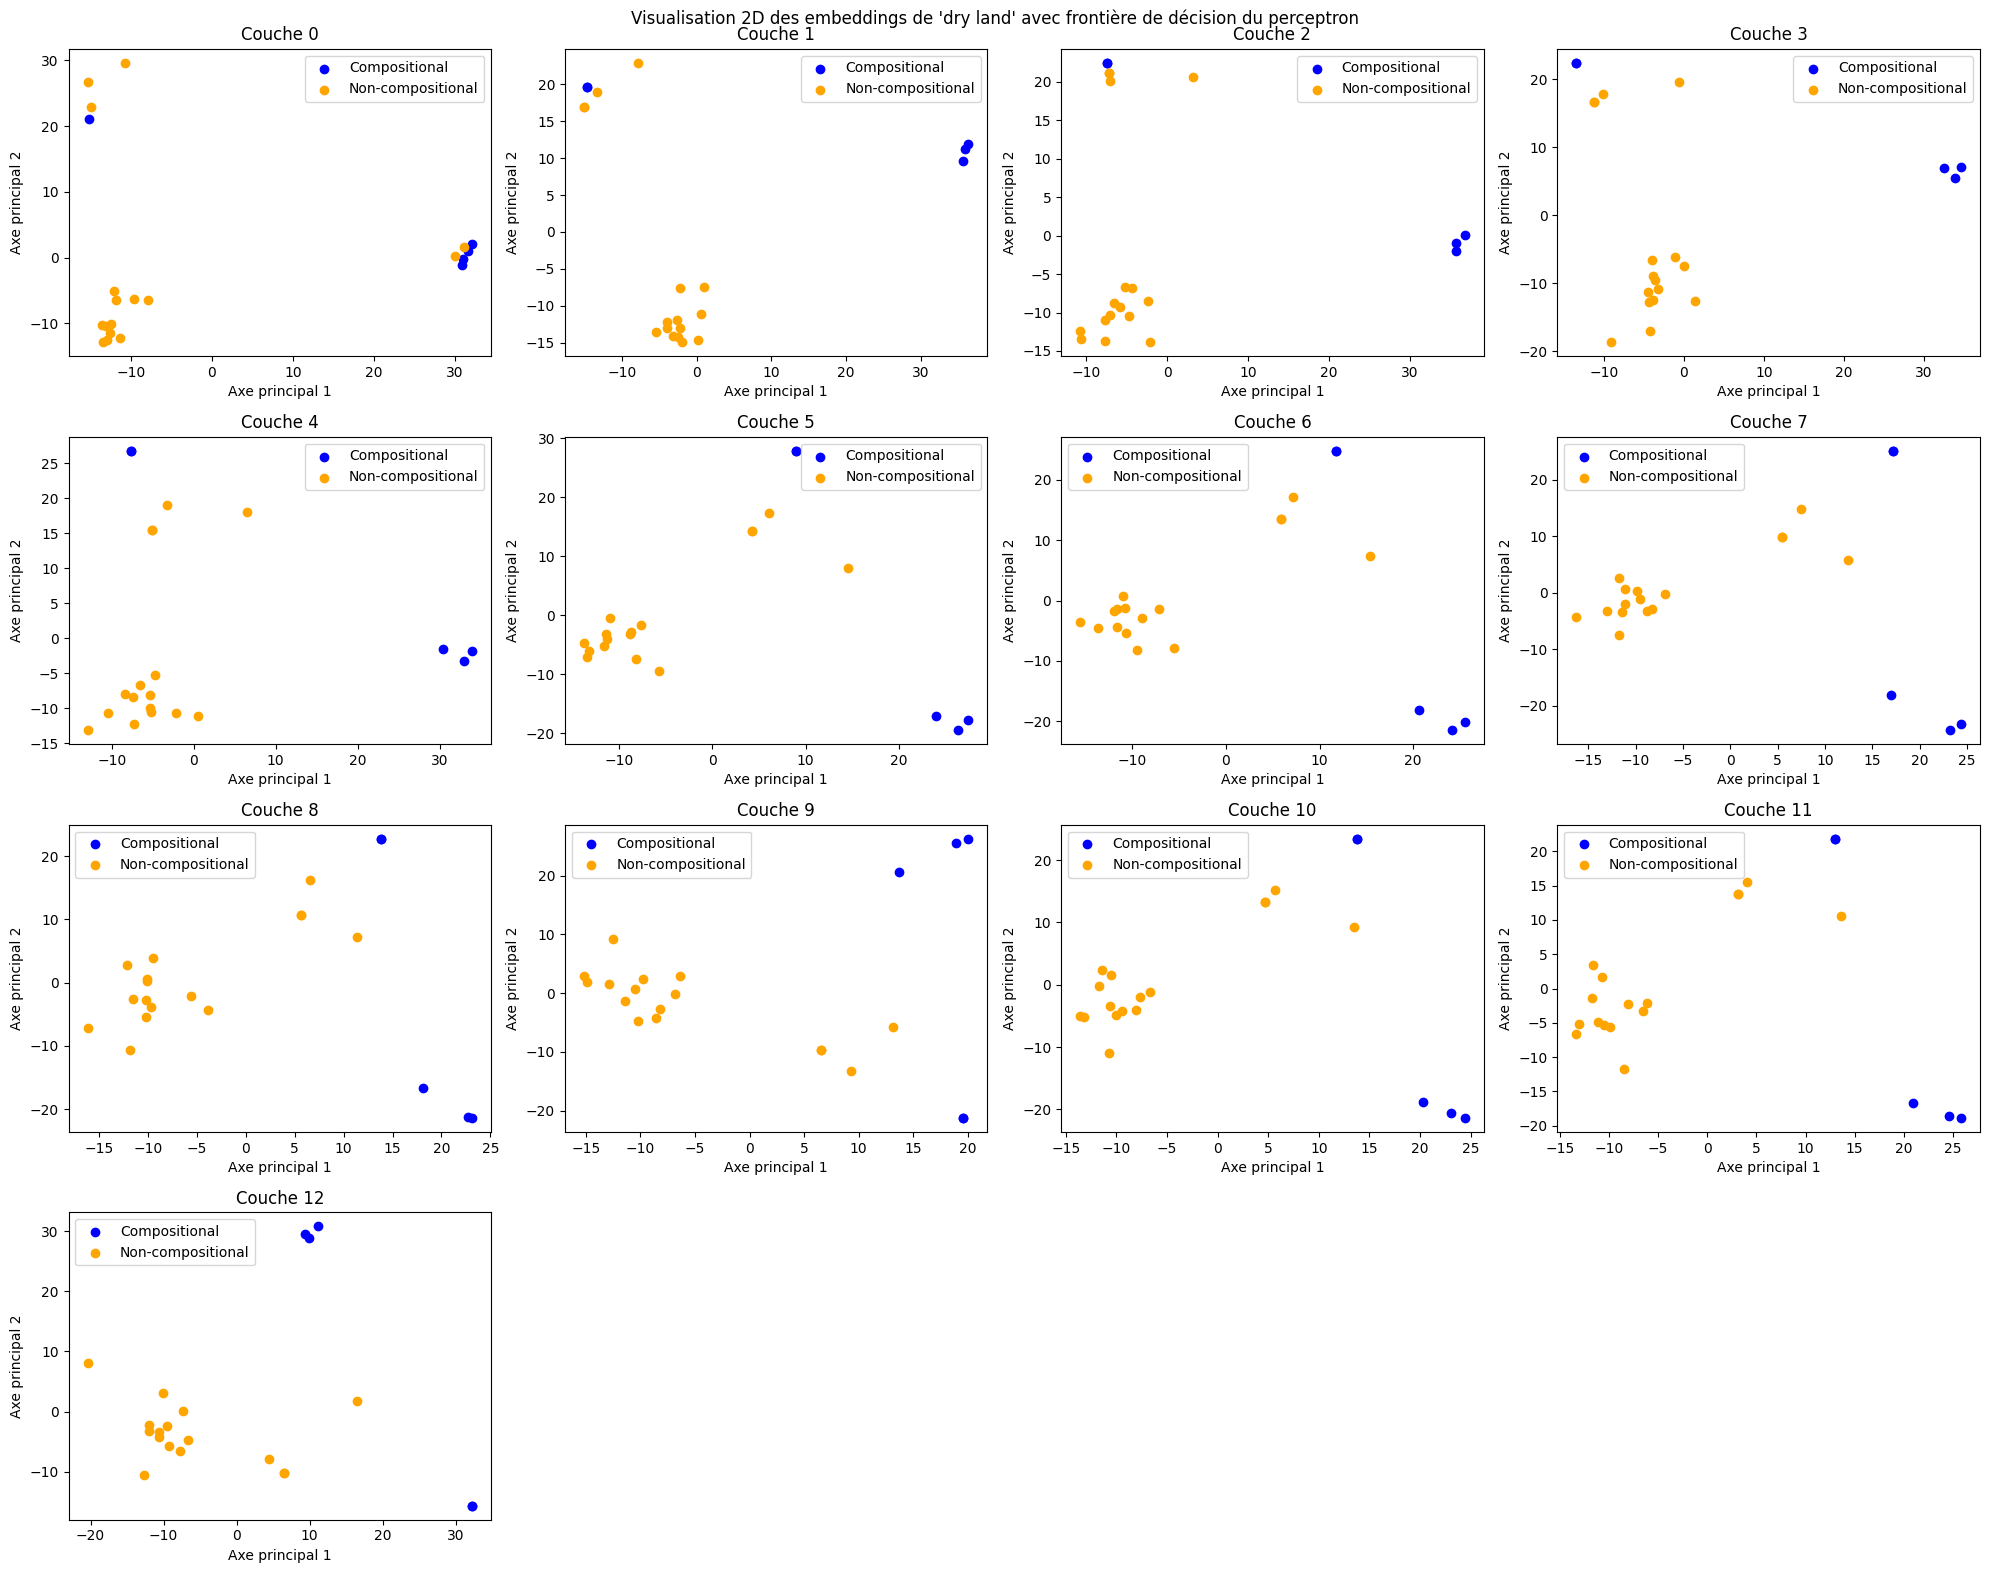

Layer 0
Training accuracy: 84.62% => data is not linearly separable.
Layer 1
Training accuracy: 92.31% => data is not linearly separable.
Layer 2
Training accuracy: 84.62% => data is not linearly separable.
Layer 3
Training accuracy: 76.92% => data is not linearly separable.
Layer 4
Training accuracy: 69.23% => data is not linearly separable.
Layer 5
Training accuracy: 84.62% => data is not linearly separable.
Layer 6
Training accuracy: 61.54% => data is not linearly separable.
Layer 7
Training accuracy: 69.23% => data is not linearly separable.
Layer 8
Training accuracy: 84.62% => data is not linearly separable.
Layer 9
Training accuracy: 84.62% => data is not linearly separable.
Layer 10
Training accuracy: 84.62% => data is not linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 84.62% => data is not linearly separable.


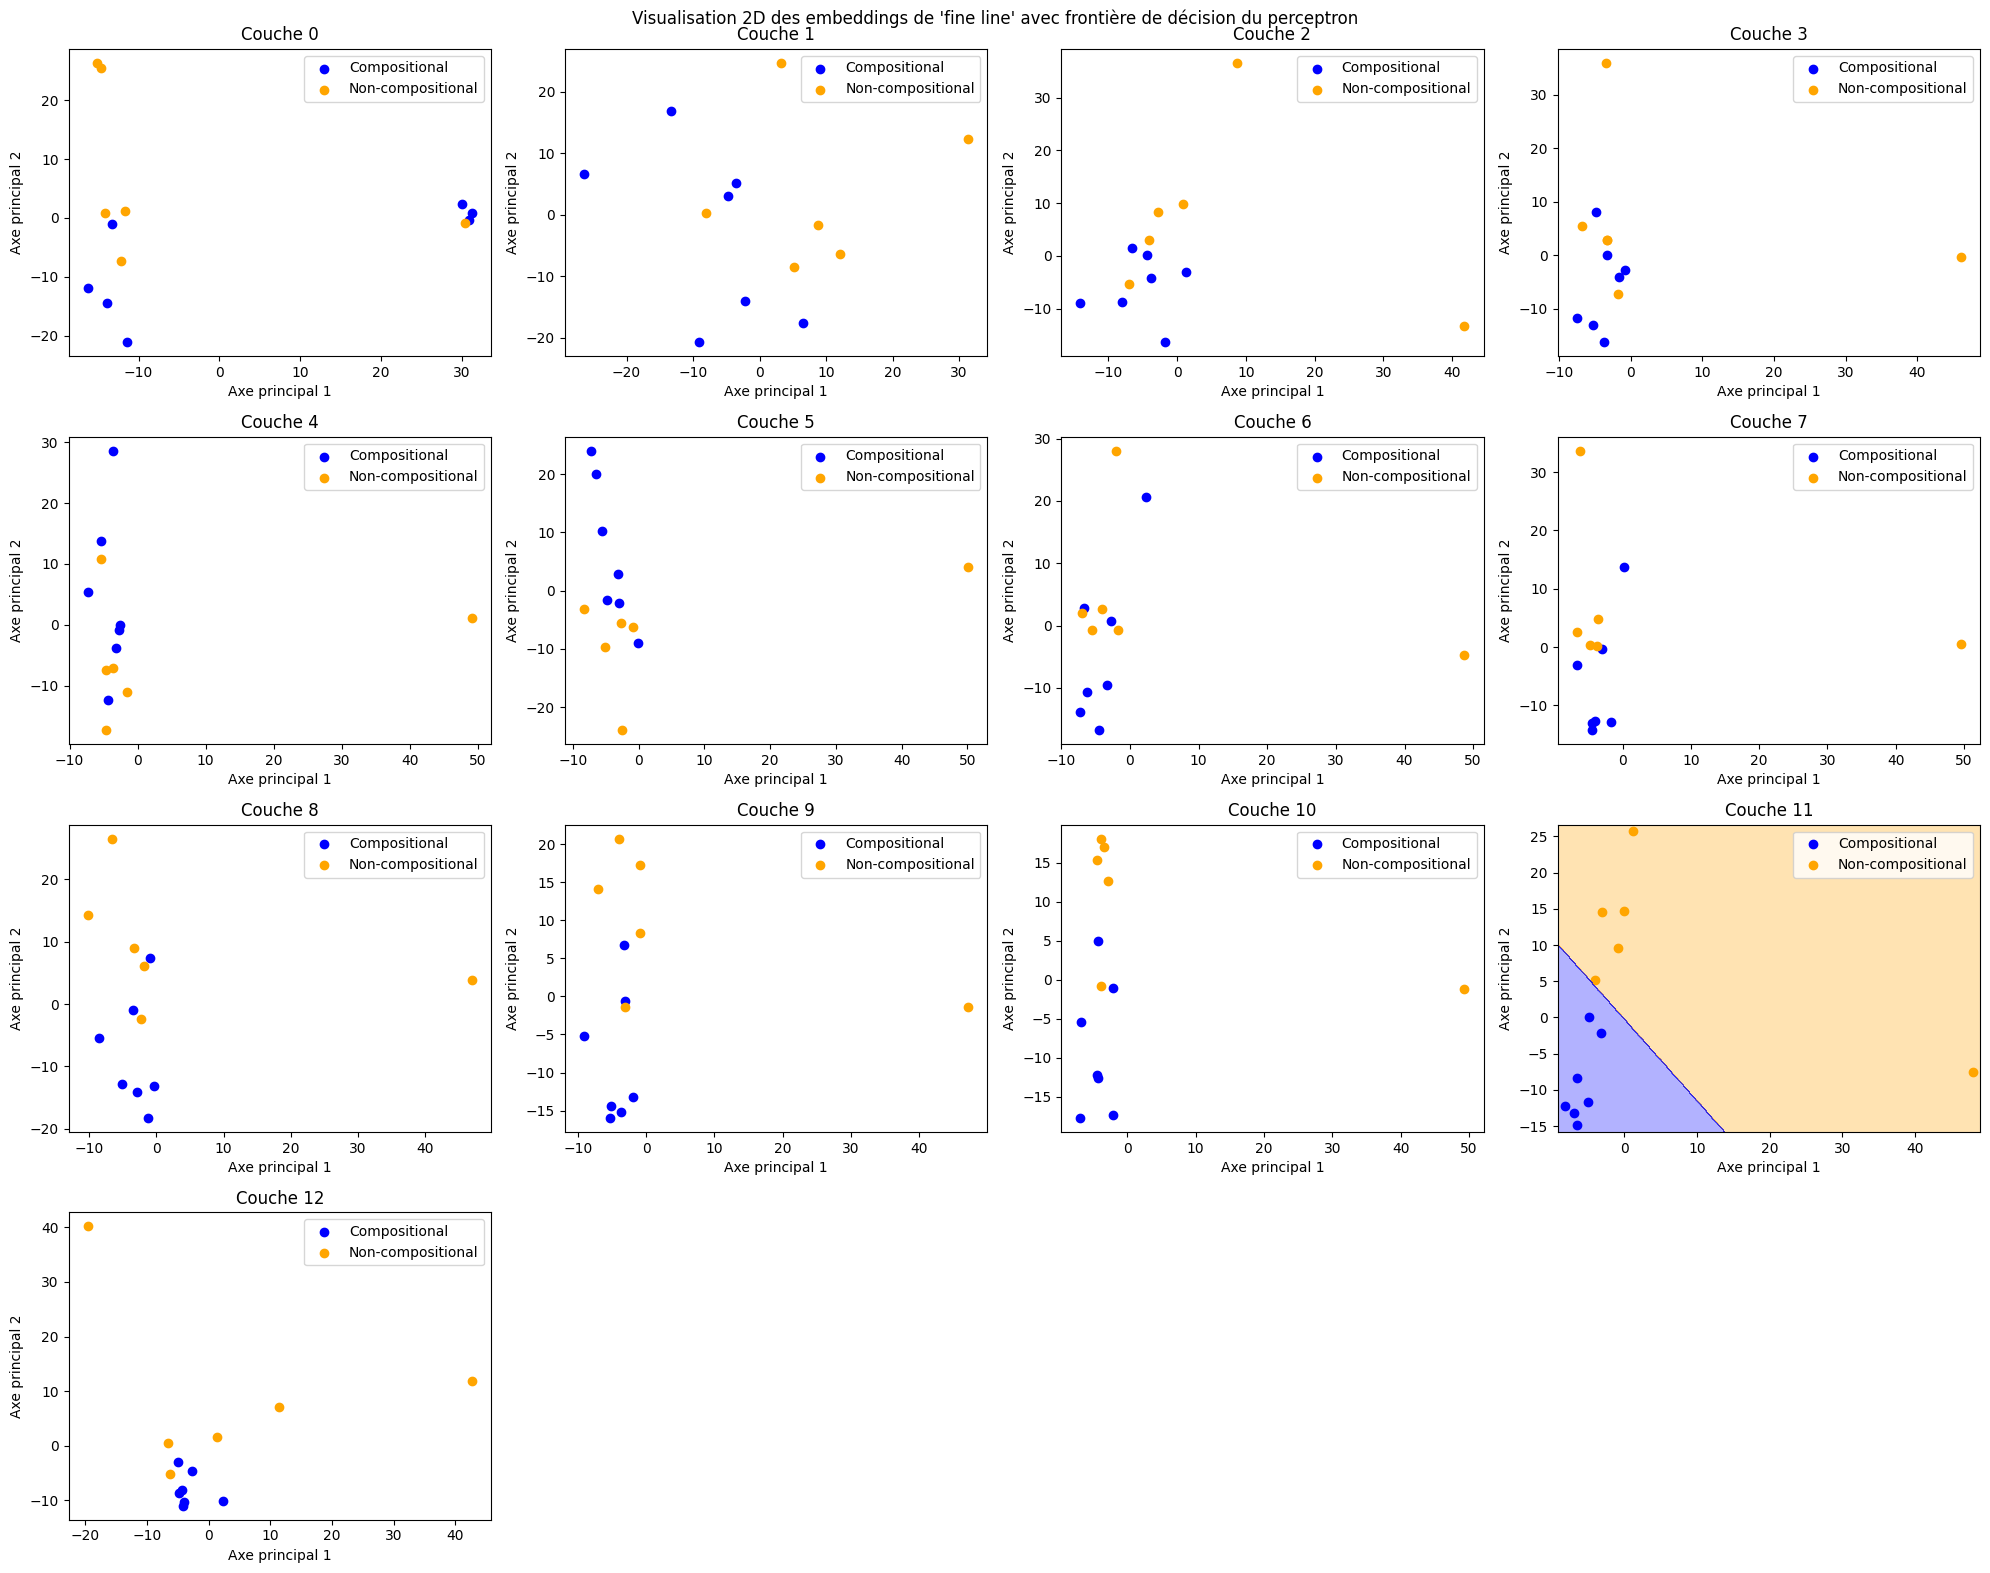

Layer 0
Training accuracy: 91.30% => data is not linearly separable.
Layer 1
Training accuracy: 91.30% => data is not linearly separable.
Layer 2
Training accuracy: 91.30% => data is not linearly separable.
Layer 3
Training accuracy: 91.30% => data is not linearly separable.
Layer 4
Training accuracy: 91.30% => data is not linearly separable.
Layer 5
Training accuracy: 91.30% => data is not linearly separable.
Layer 6
Training accuracy: 91.30% => data is not linearly separable.
Layer 7
Training accuracy: 91.30% => data is not linearly separable.
Layer 8
Training accuracy: 69.57% => data is not linearly separable.
Layer 9
Training accuracy: 82.61% => data is not linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 91.30% => data is not linearly separable.
Layer 12
Training accuracy: 91.30% => data is not linearly separable.


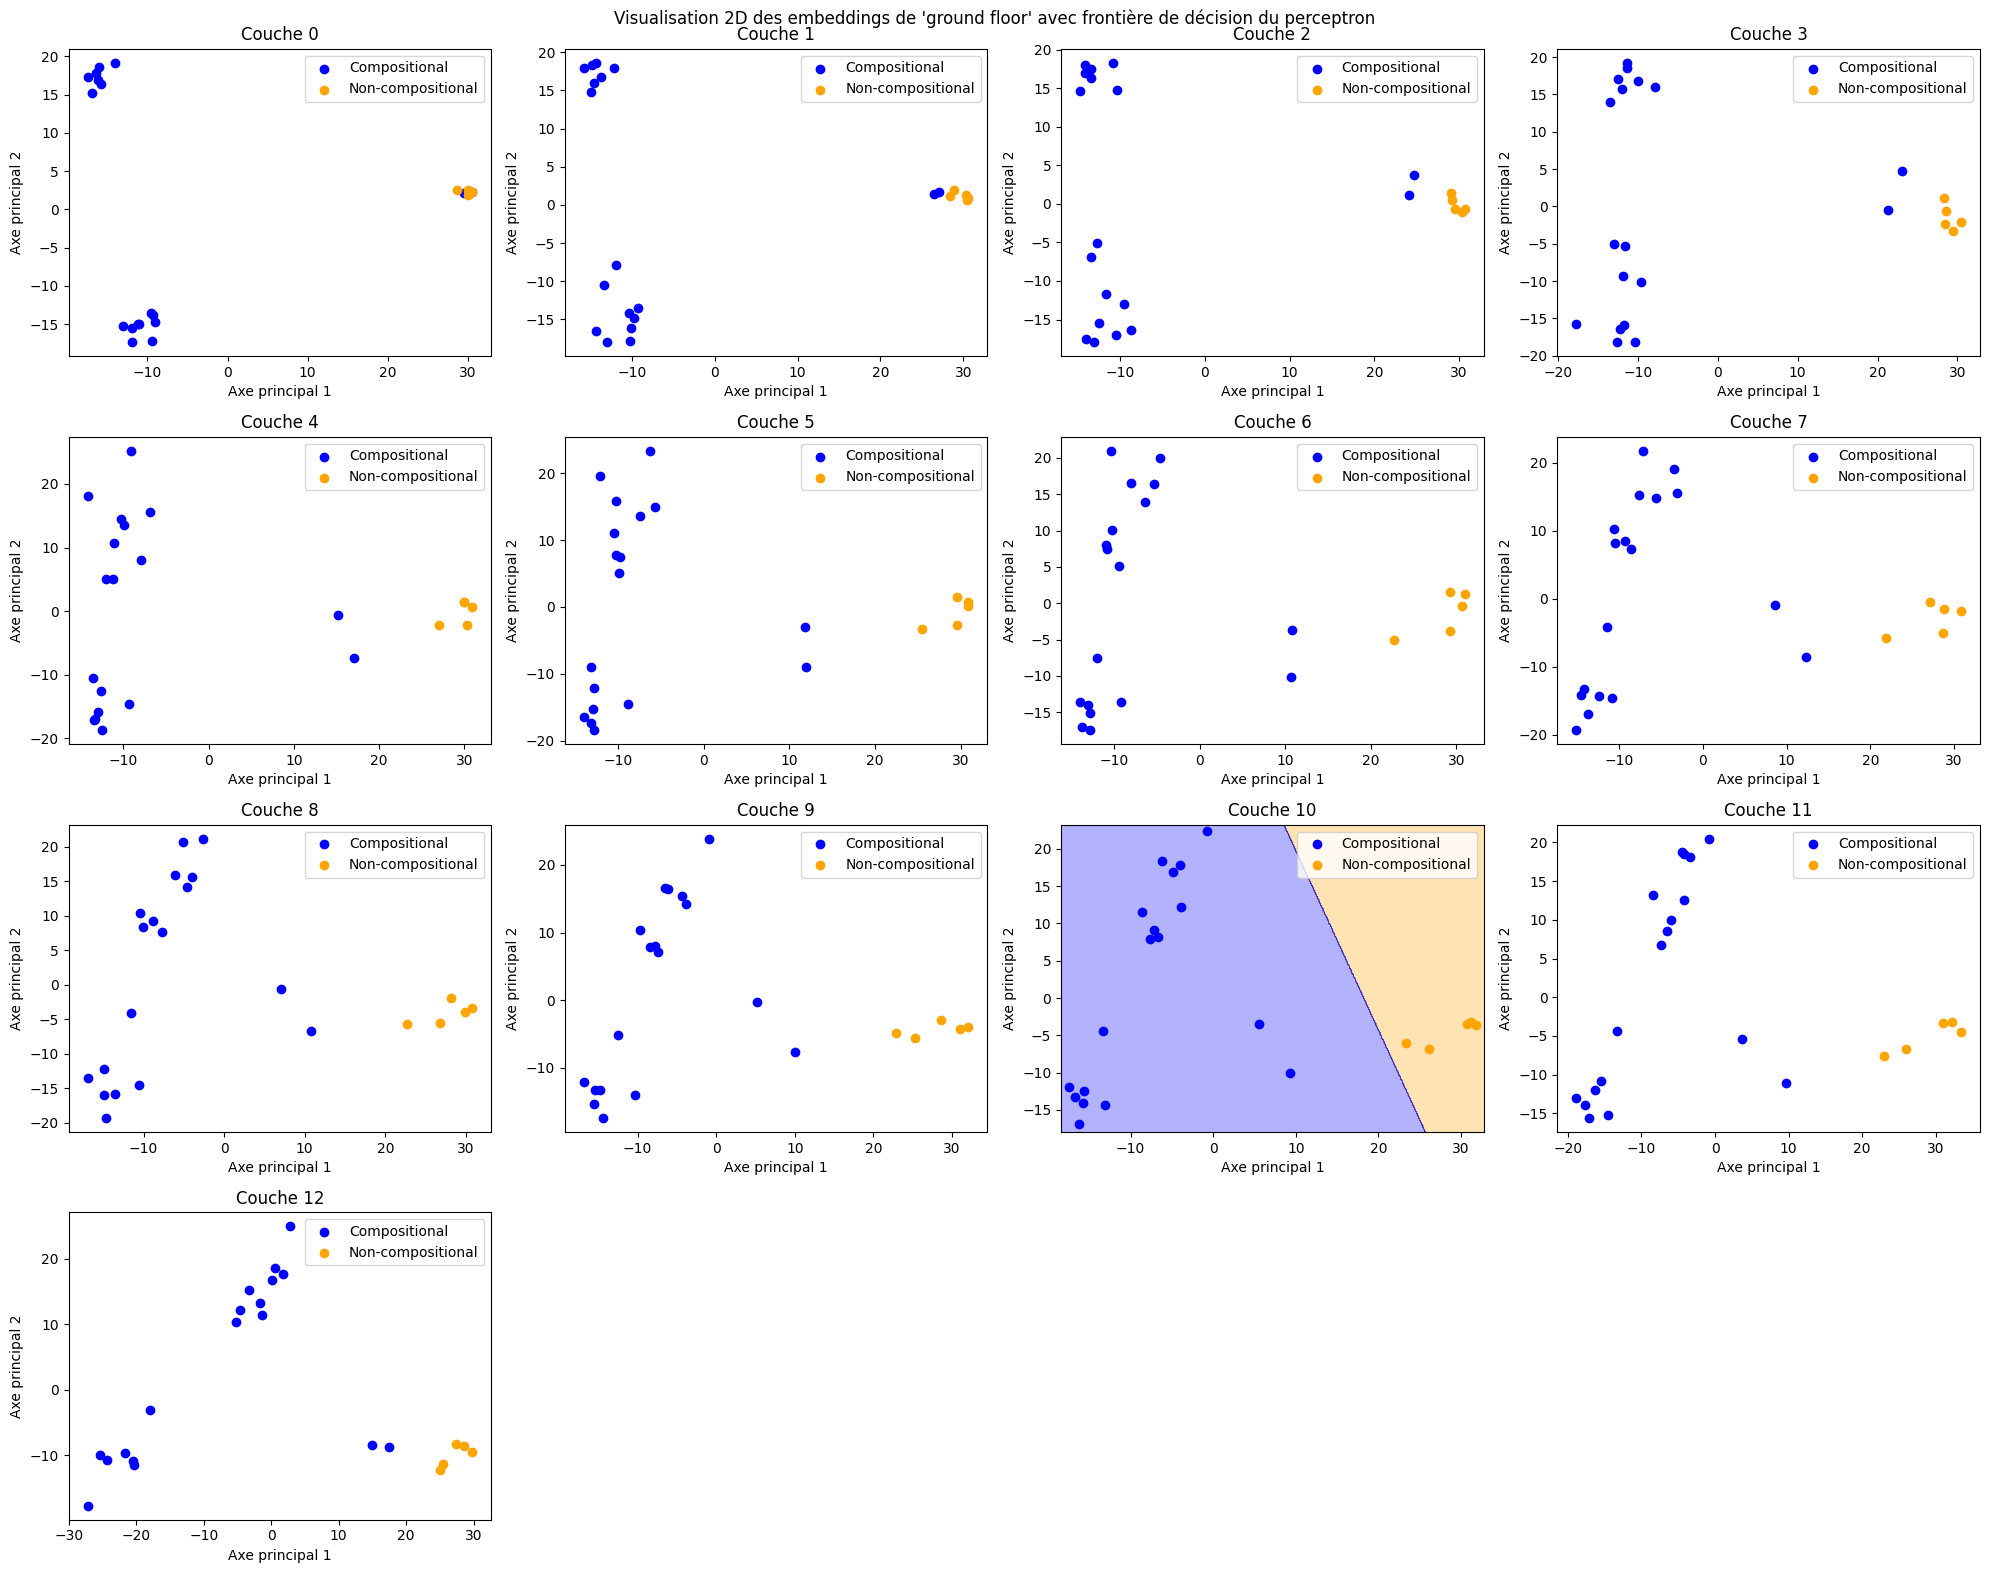

Layer 0
Training accuracy: 66.67% => data is not linearly separable.
Layer 1
Training accuracy: 66.67% => data is not linearly separable.
Layer 2
Training accuracy: 86.67% => data is not linearly separable.
Layer 3
Training accuracy: 86.67% => data is not linearly separable.
Layer 4
Training accuracy: 93.33% => data is not linearly separable.
Layer 5
Training accuracy: 86.67% => data is not linearly separable.
Layer 6
Training accuracy: 93.33% => data is not linearly separable.
Layer 7
Training accuracy: 86.67% => data is not linearly separable.
Layer 8
Training accuracy: 86.67% => data is not linearly separable.
Layer 9
Training accuracy: 93.33% => data is not linearly separable.
Layer 10
Training accuracy: 80.00% => data is not linearly separable.
Layer 11
Training accuracy: 93.33% => data is not linearly separable.
Layer 12
Training accuracy: 60.00% => data is not linearly separable.


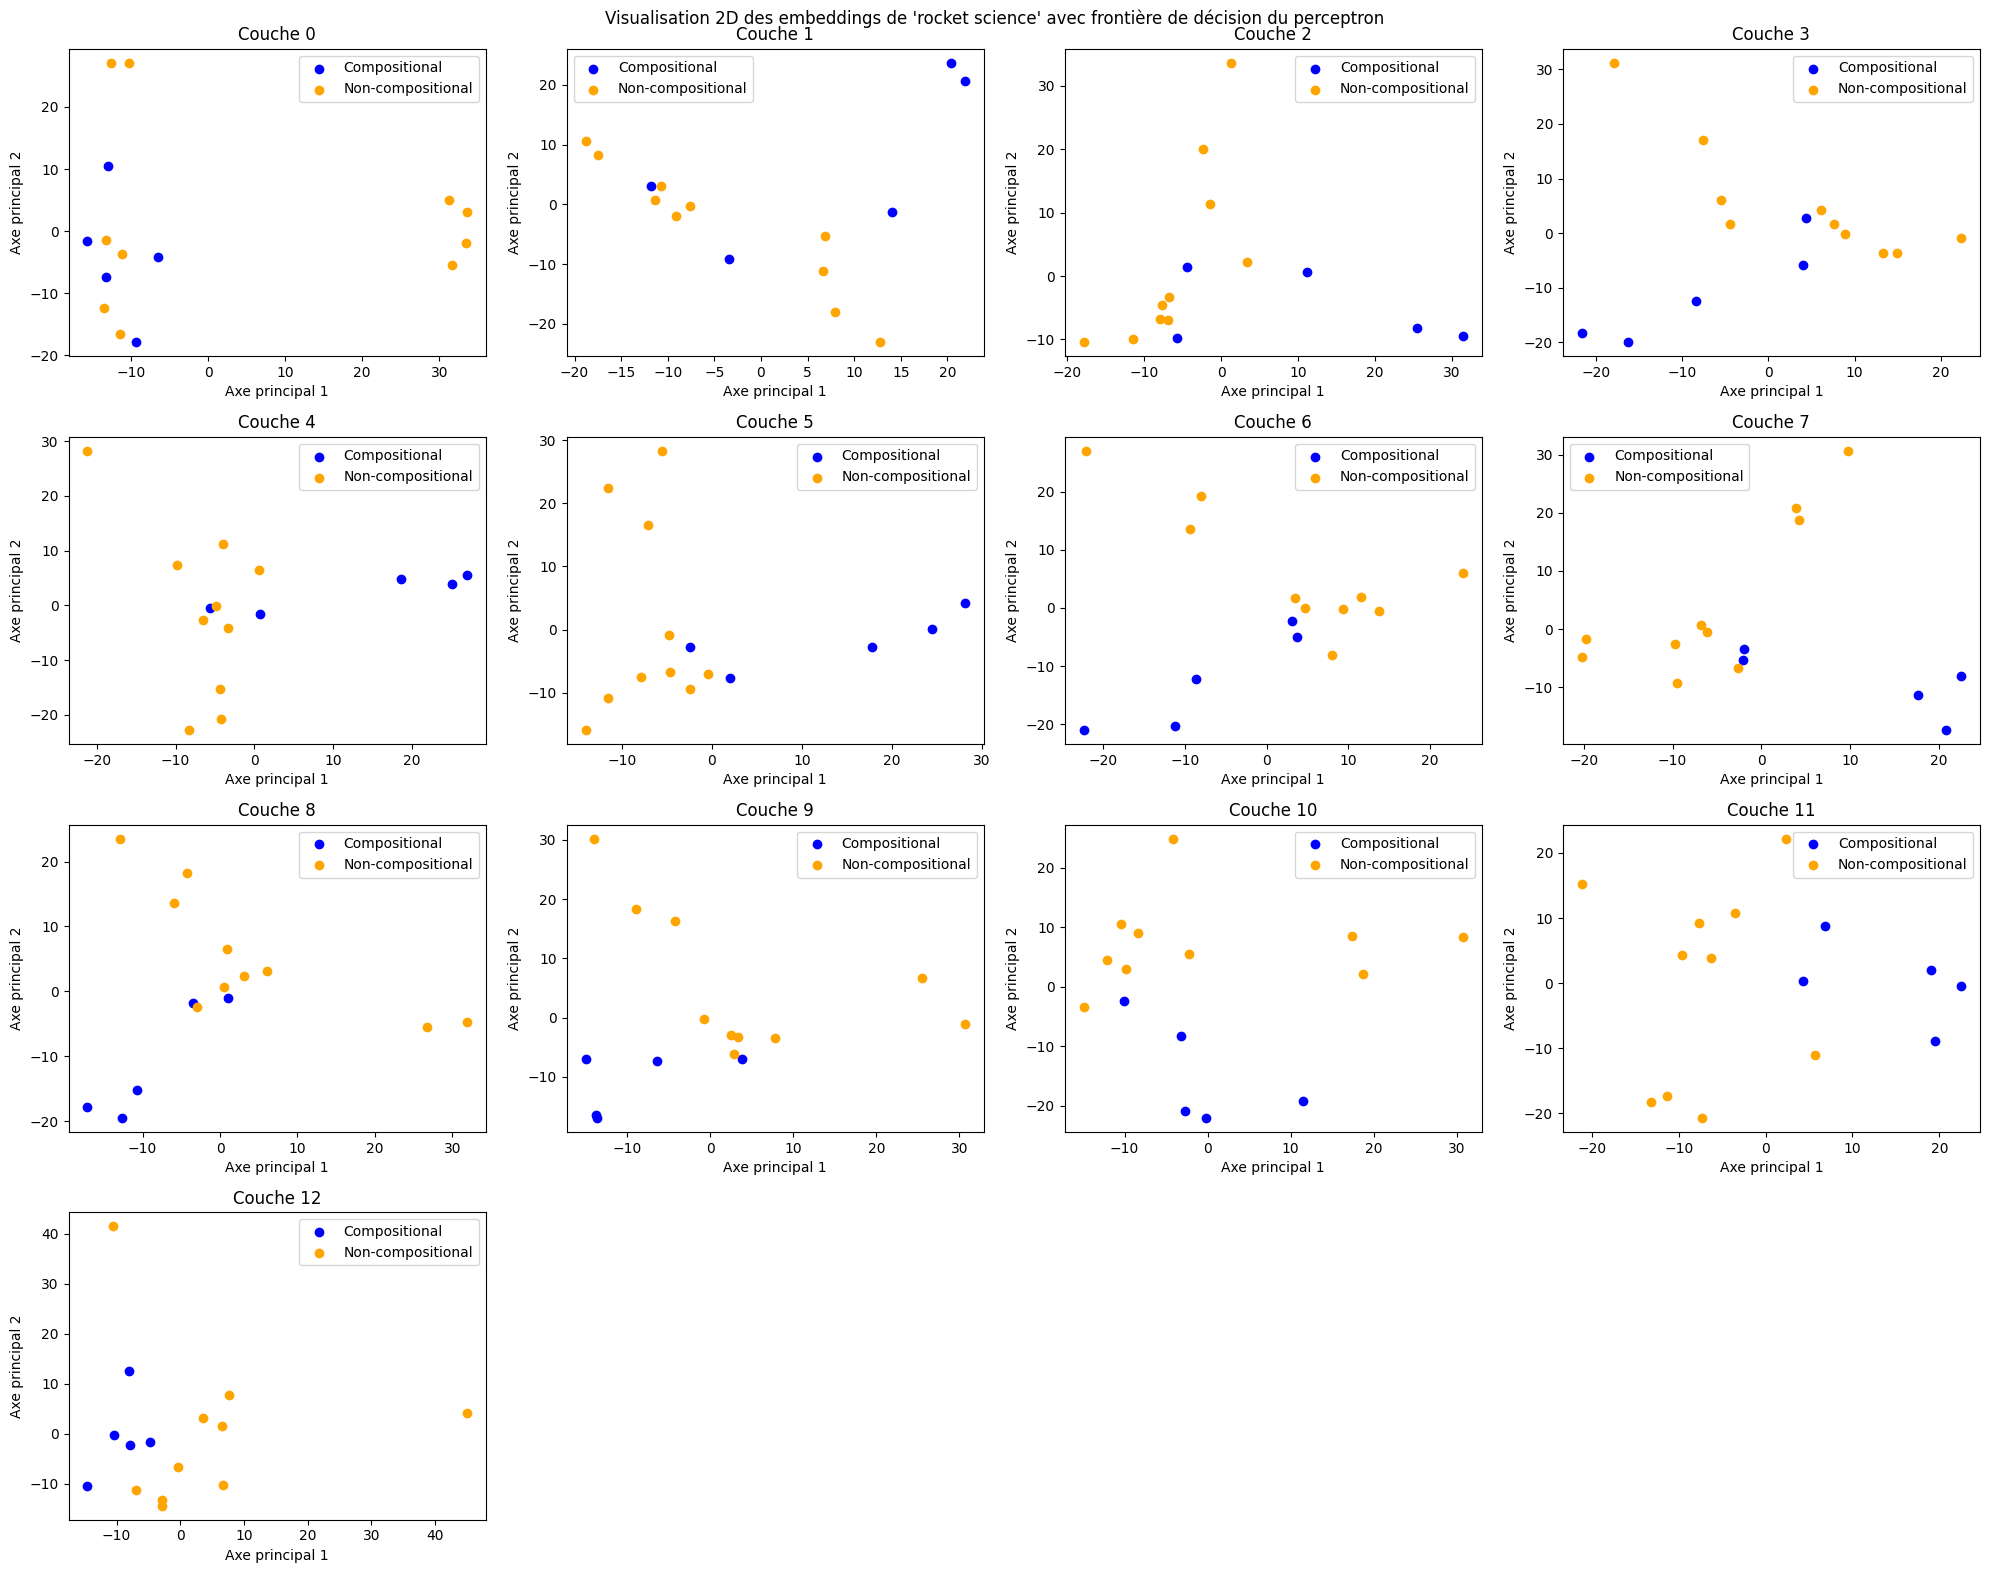

Layer 0
Training accuracy: 76.92% => data is not linearly separable.
Layer 1
Training accuracy: 84.62% => data is not linearly separable.
Layer 2
Training accuracy: 92.31% => data is not linearly separable.
Layer 3
Training accuracy: 69.23% => data is not linearly separable.
Layer 4
Training accuracy: 76.92% => data is not linearly separable.
Layer 5
Training accuracy: 61.54% => data is not linearly separable.
Layer 6
Training accuracy: 84.62% => data is not linearly separable.
Layer 7
Training accuracy: 84.62% => data is not linearly separable.
Layer 8
Training accuracy: 69.23% => data is not linearly separable.
Layer 9
Training accuracy: 61.54% => data is not linearly separable.
Layer 10
Training accuracy: 53.85% => data is not linearly separable.
Layer 11
Training accuracy: 30.77% => data is not linearly separable.
Layer 12
Training accuracy: 61.54% => data is not linearly separable.


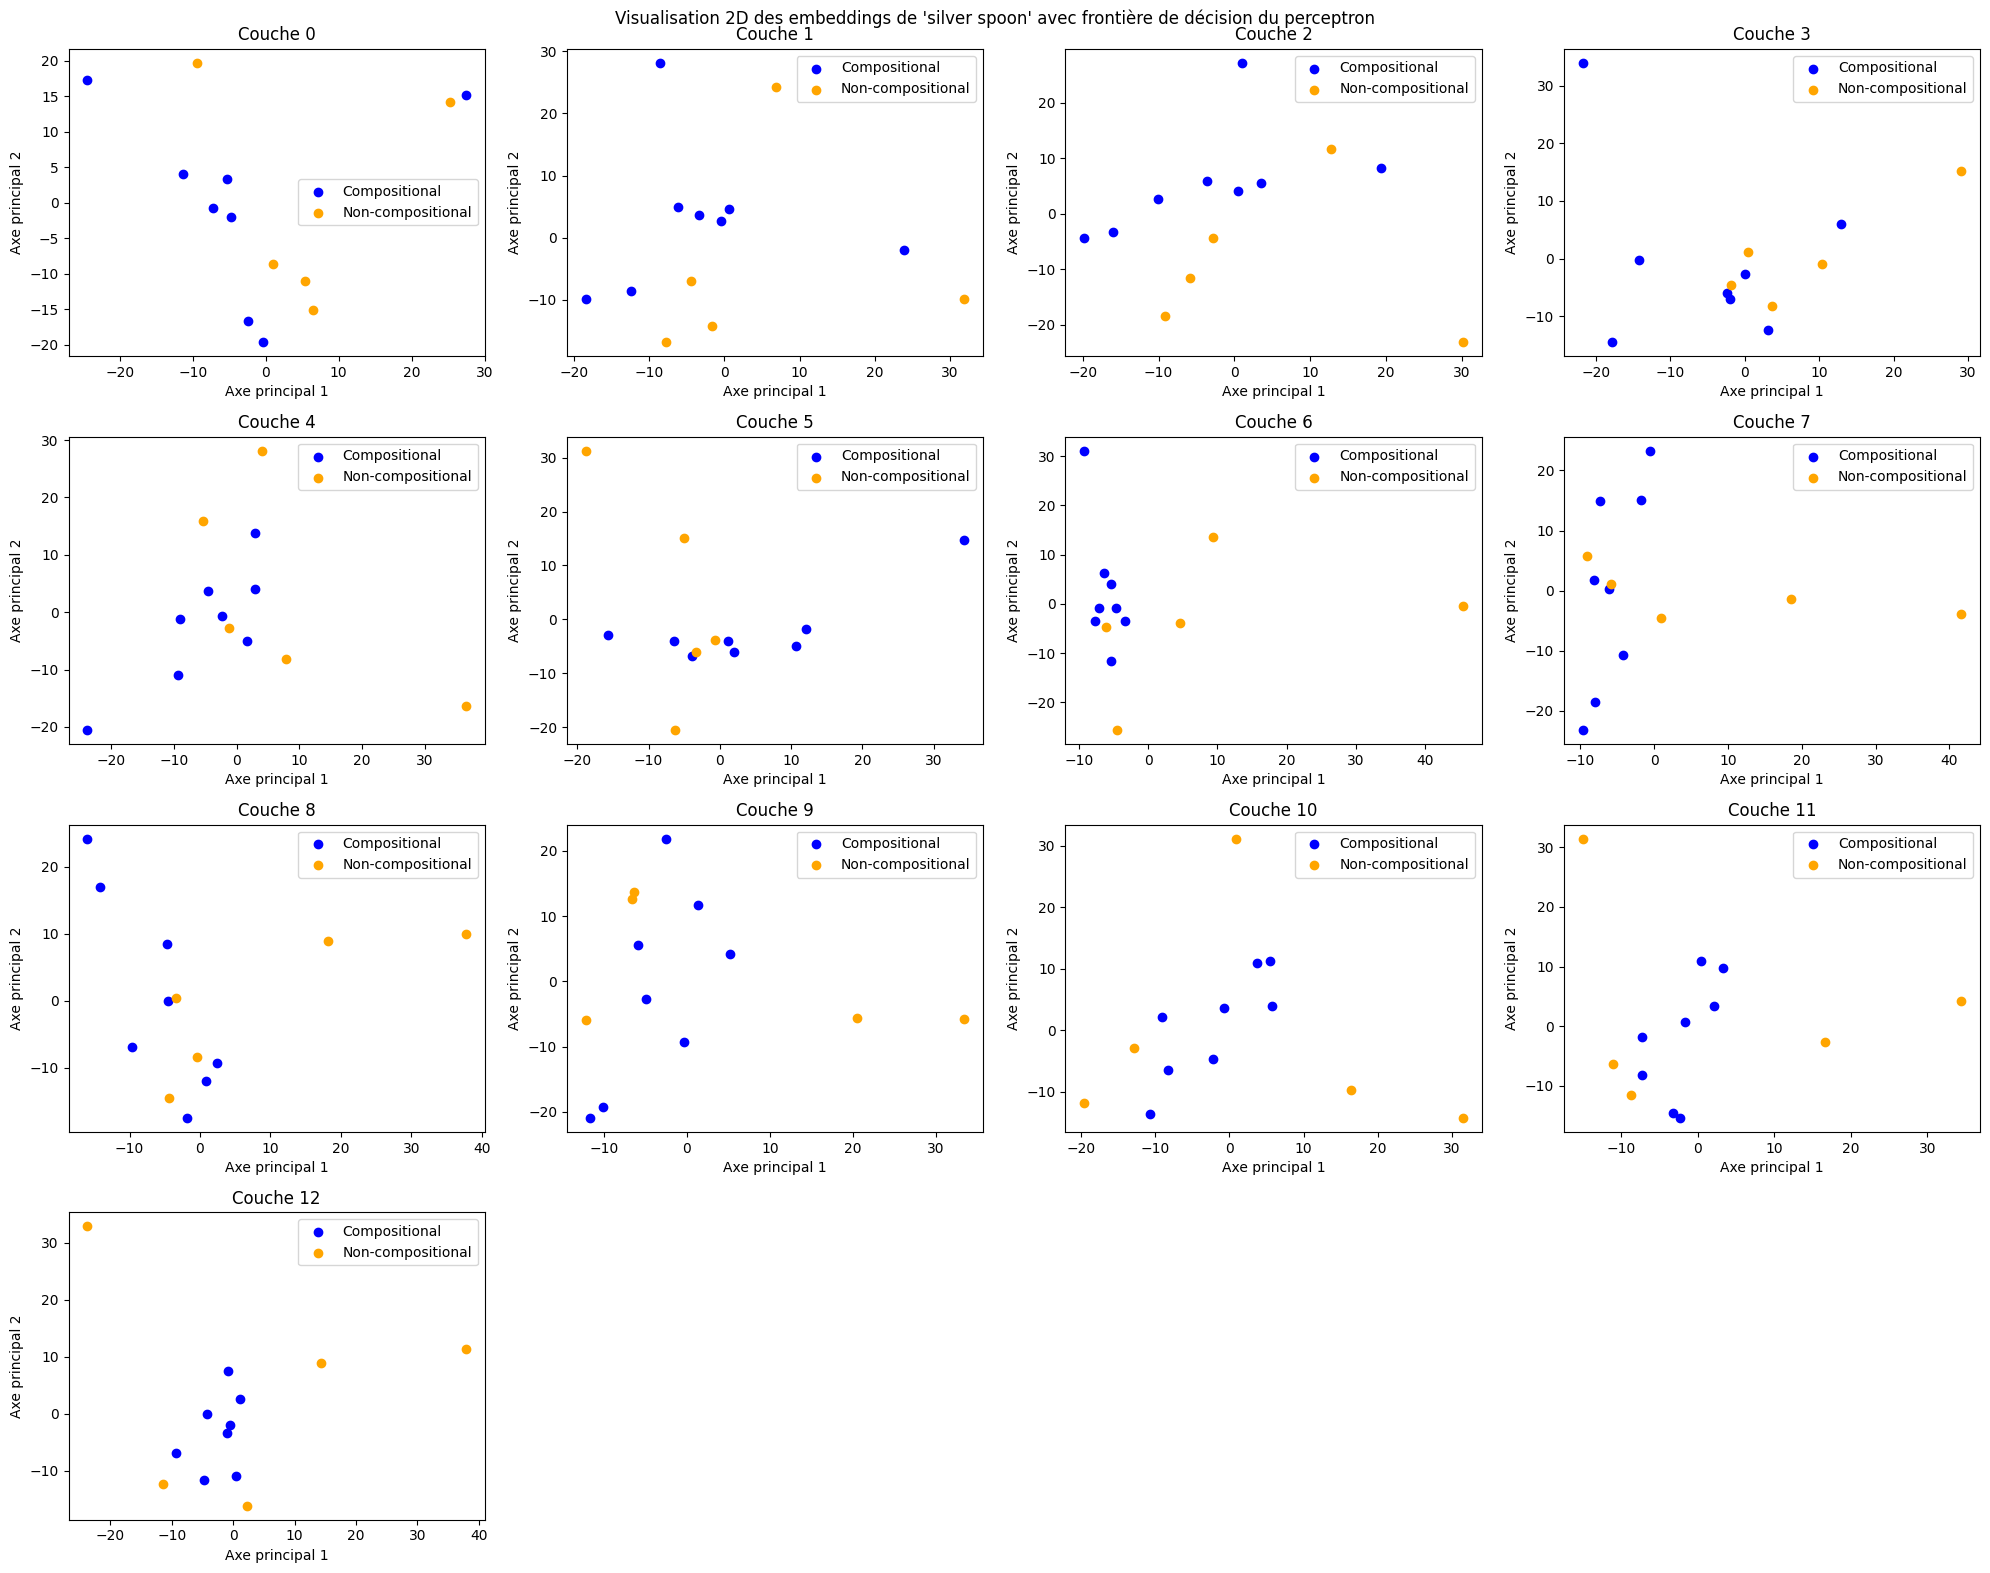

In [15]:
for mwe in pair_df.index:
    plot_decision_boundary_all_layers(mwe, data_df, tokenizer=roberta_tokenizer, model=roberta_model)

In [8]:
# Over all layers
mwes = pair_df.index.tolist()

layer_res = []
for layer_id in range(model.config.num_hidden_layers +1): # including the embedding layer
    mwe_similarities = {}
    for mwe in mwes:
        if mwe != 'grass root':
            mwe_df = data_df[data_df['mwe'] == mwe].copy()
            mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False, tokenizer=tokenizer, model=model)
            mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
            mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
            centroid_lit, centroid_idiom = compute_centroids(mwe_df)
            sim = compute_centroid_cos_sim(centroid_lit, centroid_idiom)
            mwe_similarities[mwe] = sim
    layer_res.append(mwe_similarities)

mwes = sorted(list(layer_res[0].keys()))  # Sort the MWEs alphabetically
result_df = pd.DataFrame(index=mwes)

for layer_id, layer_similarities in enumerate(layer_res):
    layer_values = [layer_similarities.get(mwe, None) for mwe in mwes]
    result_df[layer_id] = layer_values

result_df

0         1         2         3         4         5   \
acid test       -0.163857 -0.142782 -0.134014 -0.111821 -0.086285 -0.087472   
ancient history  0.027406  0.015225  0.056131  0.085234  0.102594  0.101497   
baby blues      -0.135692 -0.076998 -0.071670 -0.034165 -0.034472 -0.021102   
bad hat          0.382054  0.364551  0.365172  0.356967  0.368607  0.318846   
best man        -0.136528 -0.108823 -0.087135 -0.096786 -0.105800 -0.102606   
big cheese       0.728294  0.710013  0.634067  0.592126  0.508235  0.459736   
big fish         0.938004  0.887758  0.833724  0.772165  0.681397  0.611455   
big wig         -0.003027  0.000983  0.029310  0.028214 -0.005344 -0.015813   
blue blood       0.162507  0.157762  0.160812  0.186453  0.165776  0.135803   
brass ring       0.075122  0.106170  0.064688  0.073312  0.033246  0.043044   
brick wall       0.114819  0.152657  0.123658  0.076438  0.066608  0.052562   
busy bee         0.633413  0.587830  0.471045  0.385987  0.360282  0.275990   
chain reaction   0.120120  0.150353  0.145954  0.169044  0.181644  0.188689   
closed book      0.981819  0.921868  0.857554  0.806871  0.770074  0.674148   
cutting edge     0.914677  0.868788  0.788522  0.661397  0.518327  0.421363   
double cross     0.968591  0.934955  0.891108  0.824628  0.781669  0.711599   
dry land        -0.141205 -0.128343 -0.091693 -0.082010 -0.093345 -0.082791   
fine line        0.807682  0.745699  0.670593  0.606732  0.453570  0.305223   
fish story       0.770134  0.737873  0.730220  0.724808  0.694694  0.654349   
food market      0.646598  0.621595  0.578486  0.488203  0.382738  0.319757   
glass ceiling    0.390698  0.413283  0.408569  0.368730  0.306312  0.275717   
gold mine        0.983379  0.882701  0.757096  0.723531  0.554065  0.393776   
goose egg        0.686889  0.624644  0.603989  0.555903  0.519143  0.482403   
ground floor     0.376653  0.358045  0.360945  0.371838  0.319374  0.294495   
hard shoulder   -0.072839 -0.046149 -0.005770  0.015909  0.036836  0.087376   
heavy cross      0.954926  0.879576  0.804990  0.762943  0.705648  0.610683   
low profile      0.031094 -0.011520 -0.031043 -0.015878 -0.017554 -0.032750   
poison pill     -0.018778  0.010333  0.066709  0.096078  0.076627  0.108455   
public service   0.285903  0.297396  0.344471  0.349524  0.307054  0.279642   
rat run          0.743677  0.655226  0.583509  0.459595  0.408776  0.369780   
rocket science   0.444931  0.438610  0.410164  0.388286  0.322505  0.241561   
sacred cow       0.928514  0.844314  0.781772  0.715429  0.673998  0.574131   
silver lining    0.546342  0.504802  0.444715  0.283982  0.193625  0.157270   
silver spoon     0.035200  0.034270 -0.003980 -0.011064 -0.038275 -0.048132   
sitting duck     0.947035  0.875499  0.829539  0.741976  0.664226  0.564971   
small fry        0.300011  0.234594  0.186820  0.196590  0.170377  0.136501   
smoke screen     0.082578  0.077011  0.058837  0.064464  0.059181  0.024769   
top dog         -0.042886 -0.059166 -0.049562 -0.065340 -0.059975 -0.055775   

                       6         7         8         9         10        11  \
acid test       -0.079276 -0.071035 -0.084356 -0.095936 -0.099602 -0.085035   
ancient history  0.105513  0.126625  0.085957  0.101549  0.093283  0.098652   
baby blues      -0.008839 -0.012061 -0.071163 -0.029453 -0.072537 -0.053574   
bad hat          0.330601  0.292915  0.263018  0.284150  0.271745  0.269041   
best man        -0.119504 -0.118917 -0.096069 -0.097869 -0.098963 -0.115556   
big cheese       0.408825  0.399068  0.351652  0.293180  0.245776  0.214478   
big fish         0.535689  0.525581  0.519584  0.539317  0.581718  0.545477   
big wig         -0.037519 -0.025658 -0.038548 -0.048765 -0.081029 -0.063545   
blue blood       0.090066  0.118142  0.120506  0.105842  0.121761  0.096078   
brass ring       0.036734  0.024760  0.005487 -0.000748 -0.014170 -0.056132   
brick wall       0.025387  0.032731  0.005893 -0.005522  0.030527  0.006

In [7]:
# For the paper
mwe_stats = {}

for layer_id, layer_similarities in enumerate(layer_res):
    mwe_sims = list(layer_similarities.values())
    
    for mwe, sim in layer_similarities.items():
        if mwe not in mwe_stats:
            mwe_stats[mwe] = []
        
        mwe_stats[mwe].append(sim)

mwe_stats_series = pd.Series({mwe: [np.min(sims), np.max(sims), np.std(sims), np.median(sims)] for mwe, sims in mwe_stats.items()})

for mwe, stats in mwe_stats_series.items():
    print(f"{mwe}: min={stats[0]:.2f}, max={stats[1]:.2f}, std={stats[2]:.2f}, median={stats[3]:.2f}")


acid test: min=-0.16, max=-0.07, std=0.03, median=-0.10
baby blues: min=0.36, max=0.71, std=0.12, median=0.42
bad hat: min=0.26, max=0.38, std=0.04, median=0.32
best man: min=-0.18, max=-0.09, std=0.02, median=-0.11
big cheese: min=0.21, max=0.77, std=0.19, median=0.43
big fish: min=0.52, max=0.94, std=0.15, median=0.58
big wig: min=-0.08, max=0.03, std=0.03, median=-0.02
blue blood: min=0.08, max=0.18, std=0.03, median=0.12
chain reaction: min=0.07, max=0.19, std=0.03, median=0.14
closed book: min=0.66, max=0.98, std=0.11, median=0.68
cutting edge: min=0.17, max=0.90, std=0.25, median=0.31
double cross: min=0.50, max=0.98, std=0.15, median=0.60
dry land: min=-0.14, max=-0.01, std=0.04, median=-0.08
fine line: min=0.17, max=0.81, std=0.22, median=0.30
fish story: min=0.57, max=0.77, std=0.06, median=0.64
food market: min=0.23, max=0.65, std=0.15, median=0.32
glass ceiling: min=0.20, max=0.41, std=0.08, median=0.25
gold mine: min=0.27, max=0.98, std=0.24, median=0.39
ground floor: min=0

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_he

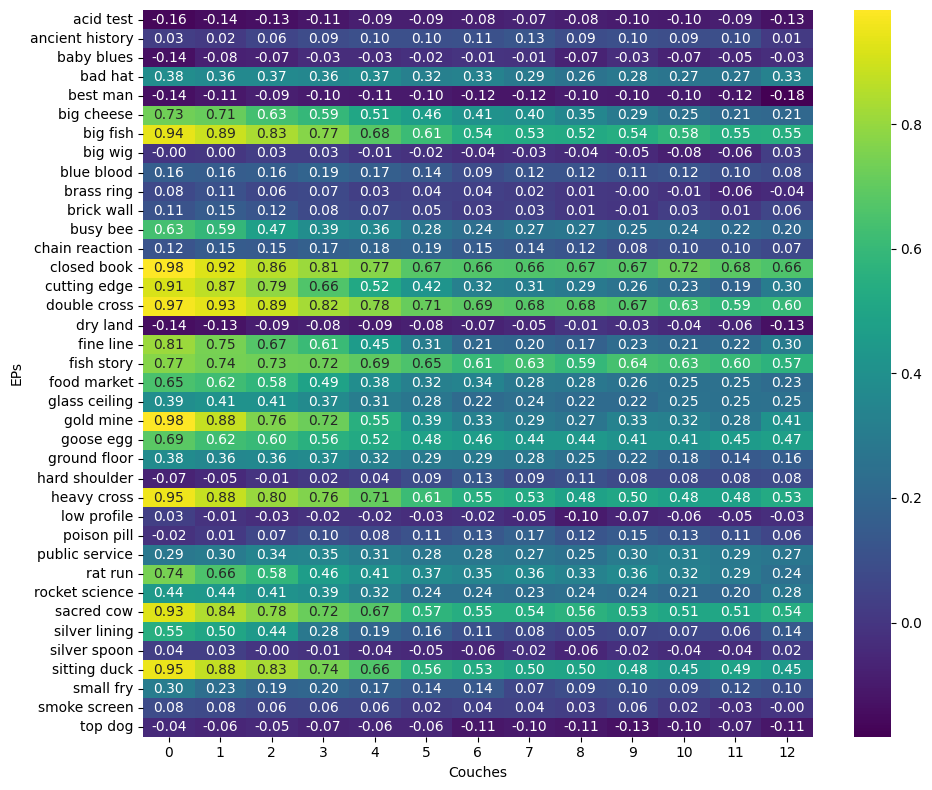

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(result_df, cmap='viridis', annot=True, fmt=".2f")
# plt.title('C et NC similarités à travers toutes les couches (roberta-base)')
plt.xlabel('Couches')
plt.ylabel('EPs')
# plt.xticks(rotation=35)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(f"../results/plots/Heatmap-RoBERTa-base.pdf")
plt.show()

## Roberta-large

In [3]:
model = roberta_large_model
tokenizer = roberta_large_tokenizer
print(f"{model.config._name_or_path} has {model.config.num_hidden_layers} hidden layers.")

# Preprocessing 
data_df = retrieve_preprocessed_df("../data/en_TaskIndependentData.json",print_ignored=True, tokenizer=tokenizer) 
data_df.head()

roberta-large has 24 hidden layers.
We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
Only MWEs that are tokenized like row['mwe'].split() have been retrieved at this step.      Specifically, we kept MWEs split into 2 tokens, in the singular form, and no different form from the MWE string ('running' != 'run').      To see the ignored rows, set print_ignored=True.
40 rows dropped where MWE not found as sublist in sentence.
There are 1,884 remaining sentences in the dataset.


id         mwe literal_meaning                _1    _2    _3  0/1  \
0  38  sacred cow      divine cow  above criticism   None  None    1   
1  38  sacred cow      divine cow  above criticism   None  None    0   
2  38  sacred cow      divine cow  above criticism   None  None    0   
3  38  sacred cow      divine cow  above criticism   None  None    0   
4  38  sacred cow      divine cow  above criticism   None  None    0   

       fine_grained                                              prior  \
0        divine cow     Like beef, pork is also forbidden in Hinduism.   
1  above criticism   Besides, the Rights group said the Minister of...   
2  above criticism   But in the Macquarie judgment, Judge Sandy Str...   
3  above criticism   The Commissioner of Police, CP Abutu Yaro, who...   
4  above criticism   The committee shall come up with findings and ...   

                                            sentence  \
0  However, unlike the sacred cow, the pig repres...   
1  The Rights group said the ministry has continu...   
2  Barwick says historically there has been littl...   
3  The state police boss also directed the full e...   
4  There is no sacred cow under the law of probit...   

                                               after  \
0  This is considered to be particularly impure a...   
1  HURIWA recalled that the Federal Government on...   
2  The Fair Work Act is clear that employers cann...   
3  No stone would be left unturned because we are...   
4  For a deterrent in future, the Chairman shall ...   

                                        prior_tokens  \
0  [Like, Ġbeef, ,, Ġpork, Ġis, Ġalso, Ġforbidden...   
1  [Besides, ,, Ġthe, ĠRights, Ġgroup, Ġsaid, Ġth...   
2  [But, Ġin, Ġthe, ĠMac, qu, arie, Ġjudgment, ,,...   
3  [The, ĠCommissioner, Ġof, ĠPolice, ,, ĠCP, ĠAb...   
4  [The, Ġcommittee, Ġshall, Ġcome, Ġup, Ġwith, Ġ...   

                                     sentence_tokens  \
0  [However, ,, Ġunlike, Ġthe, Ġsacred, Ġcow, ,, ...   
1  [The, ĠRights, Ġgroup, Ġsaid, Ġthe, Ġministry,...   
2  [Bar, wick, Ġsays, Ġhistorically, Ġthere, Ġhas...   
3  [The, Ġstate, Ġpolice, Ġboss, Ġalso, Ġdirected...   
4  [There, Ġis, Ġno, Ġsacred, Ġcow, Ġunder, Ġthe,...   

                                        after_tokens  tokenized_mwe  \
0  [This, Ġis, Ġconsidered, Ġto, Ġbe, Ġparticular...  [sacred, cow]   
1  [H, URI, WA, Ġrecalled, Ġthat, Ġthe, ĠFederal,...  [sacred, cow]   
2  [The, ĠFair, ĠWork, ĠAct, Ġis, Ġclear, Ġthat, ...  [sacred, cow]   
3  [No, Ġstone, Ġwould, Ġbe, Ġleft, Ġunt, urned, ...  [sacred, cow]   
4  [For, Ġa, Ġdeterrent, Ġin, Ġfuture, ,, Ġthe, Ġ...  [sacred, cow]   

                          normalized_sentence_tokens  
0  [However, ,, unlike, the, sacred, cow, ,, the,...  
1  [The, Rights, group, said, the, ministry, has,...  
2  [Bar, wick, says, historically, there, has, be...  
3  [The, state, police, boss, also, directed, the...  
4  [There, is, no, sacred, cow, under, the, law, ...

Layer 0
Training accuracy: 46.15% => data is not linearly separable.
Layer 1
Training accuracy: 84.62% => data is not linearly separable.
Layer 2
Training accuracy: 76.92% => data is not linearly separable.
Layer 3
Training accuracy: 69.23% => data is not linearly separable.
Layer 4
Training accuracy: 53.85% => data is not linearly separable.
Layer 5
Training accuracy: 84.62% => data is not linearly separable.
Layer 6
Training accuracy: 76.92% => data is not linearly separable.
Layer 7
Training accuracy: 76.92% => data is not linearly separable.
Layer 8
Training accuracy: 84.62% => data is not linearly separable.
Layer 9
Training accuracy: 76.92% => data is not linearly separable.
Layer 10
Training accuracy: 84.62% => data is not linearly separable.
Layer 11
Training accuracy: 76.92% => data is not linearly separable.
Layer 12
Training accuracy: 84.62% => data is not linearly separable.
Layer 13
Training accuracy: 92.31% => data is not linearly separable.
Layer 14
Training accuracy: 84

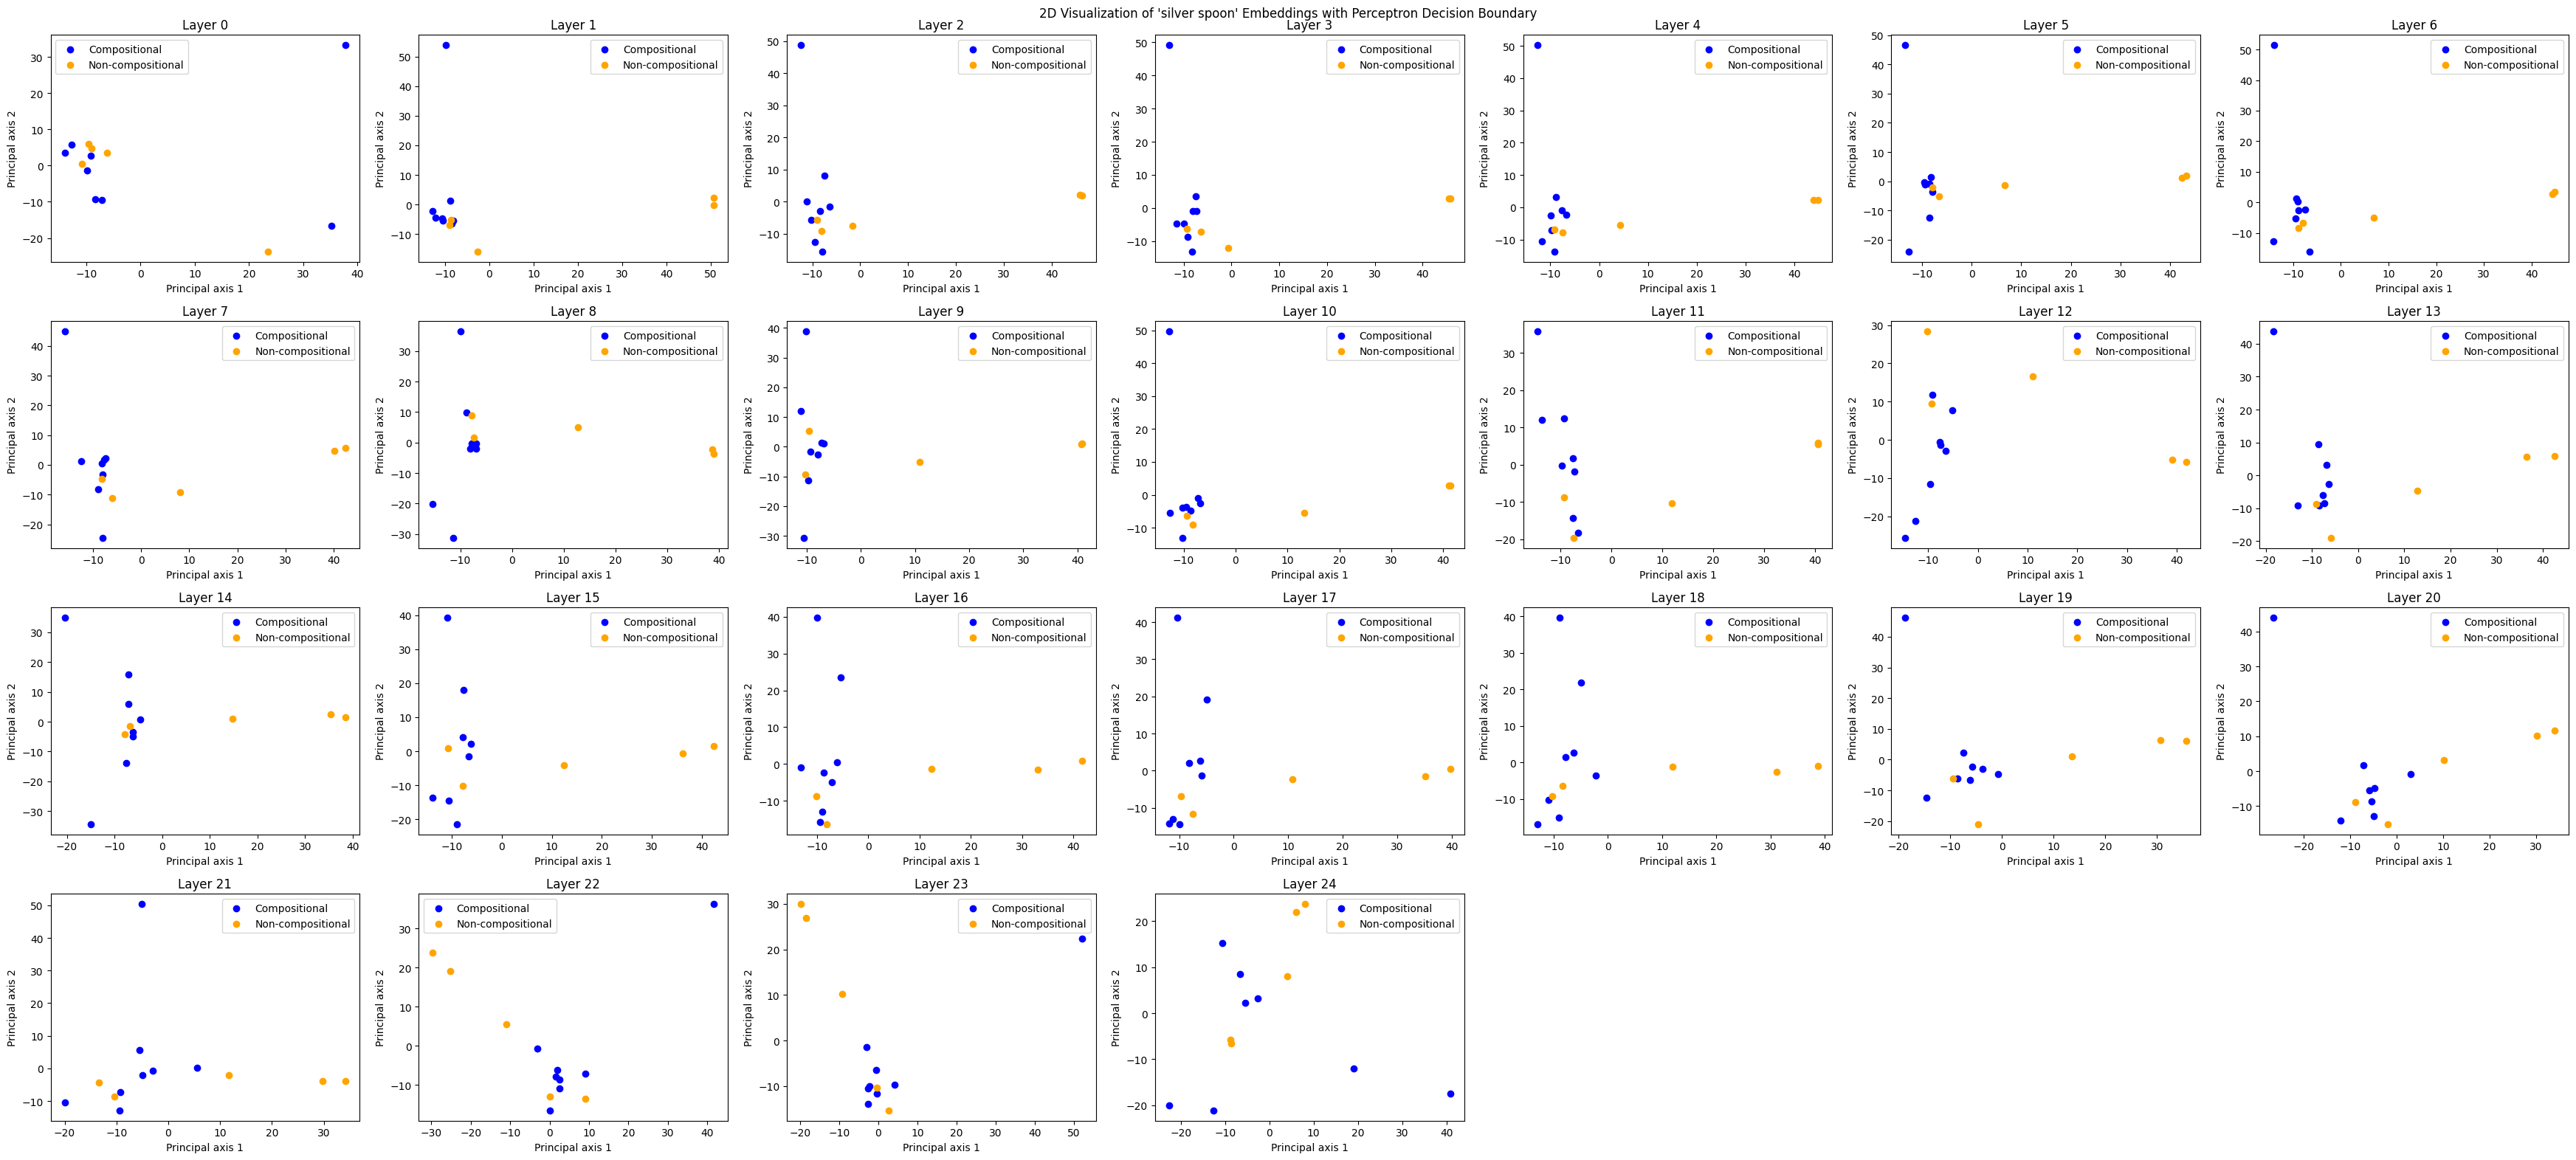

In [93]:
# roberta-large
plot_decision_boundary_all_layers('silver spoon', data_df, tokenizer=roberta_large_tokenizer, model=roberta_large_model)

In [7]:
selected_pairs, pair_info = create_literal_idiomatic_pairs(data_df, unique_occurrences=False)
pair_df = get_pair_info_df(pair_info)
pair_df['difference'] = pair_df.apply(lambda row: compute_difference(row, 'literal', 'idiomatic'), axis=1)
pair_df['most_represented'] = pair_df.apply(get_most_represented, axis=1)
pair_df = pair_df[pair_df['literal'] > 3]
pair_df = pair_df.sort_index()
pair_df

mwe              literal  idiomatic  difference most_represented
acid test              7          9           2        idiomatic
ancient history       15          7           8          literal
baby blues            17          3          14          literal
bad hat                9          8           1          literal
best man              10         10           0            equal
big fish               7          4           3          literal
blue blood             4         13           9        idiomatic
brass ring             9         16           7        idiomatic
brick wall             9          6           3          literal
closed book            7          8           1        idiomatic
cutting edge           7         11           4        idiomatic
dry land               5         16          11        idiomatic
fine line              7          6           1          literal
gold mine             13          3          10          literal
ground floor          19          5          14          literal
rocket science         5         10           5        idiomatic
silver spoon           8          5           3          literal

In [8]:
# Over all layers
mwes = pair_df.index.tolist()
    
layer_res = []
for layer_id in range(model.config.num_hidden_layers +1): # including the embedding layer
    mwe_similarities = {}
    for mwe in mwes:
        if mwe != 'grass root':
            mwe_df = data_df[data_df['mwe'] == mwe].copy()
            mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False, tokenizer=tokenizer, model=model)
            mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
            mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
            centroid_lit, centroid_idiom = compute_centroids(mwe_df)
            sim = compute_centroid_cos_sim(centroid_lit, centroid_idiom)
            mwe_similarities[mwe] = sim
    layer_res.append(mwe_similarities)

mwes = sorted(list(layer_res[0].keys()))  # Sort the MWEs alphabetically
result_df = pd.DataFrame(index=mwes)

for layer_id, layer_similarities in enumerate(layer_res):

    layer_values = [layer_similarities.get(mwe, None) for mwe in mwes]
    result_df[layer_id] = layer_values

result_df

0         1         2         3         4         5   \
acid test       -0.149531 -0.121301 -0.129983 -0.122321 -0.067510 -0.054615   
ancient history  0.007028  0.061138  0.072648  0.086235  0.113541  0.113321   
baby blues      -0.086339 -0.106766 -0.087146 -0.072398 -0.033773 -0.014124   
bad hat          0.424264  0.430828  0.412455  0.392713  0.376771  0.385412   
best man        -0.131700 -0.144736 -0.106766 -0.114105 -0.072553 -0.059199   
big fish         0.940123  0.943092  0.918995  0.907313  0.891420  0.849271   
blue blood       0.138535  0.122805  0.151883  0.131769  0.128921  0.146089   
brass ring       0.087296  0.078927  0.094528  0.098787  0.096915  0.083246   
brick wall       0.097515  0.108942  0.129879  0.139322  0.143825  0.138704   
closed book      0.985148  0.974775  0.943860  0.934734  0.916752  0.885293   
cutting edge     0.900968  0.908517  0.829552  0.784260  0.790813  0.754751   
dry land        -0.100038 -0.116429 -0.081661 -0.054338 -0.064925 -0.073912   
fine line        0.824512  0.804343  0.769193  0.736256  0.735685  0.709496   
gold mine        0.983390  0.958935  0.899093  0.856445  0.824124  0.763245   
ground floor     0.372913  0.365158  0.326502  0.308972  0.337655  0.343071   
rocket science   0.415782  0.412069  0.429210  0.435424  0.409747  0.391786   
silver spoon     0.027652 -0.015686  0.004457  0.005784  0.011107 -0.000675   

                       6         7         8         9   ...        15  \
acid test       -0.044157 -0.095061 -0.075075 -0.060346  ... -0.082721   
ancient history  0.153690  0.151239  0.150266  0.151093  ...  0.139862   
baby blues       0.000331 -0.013242 -0.018563 -0.017901  ... -0.041002   
bad hat          0.415826  0.381867  0.388322  0.383587  ...  0.309537   
best man        -0.045109 -0.084425 -0.063715 -0.050361  ... -0.100287   
big fish         0.777240  0.755685  0.669396  0.640521  ...  0.505397   
blue blood       0.156055  0.136372  0.134464  0.113308  ...  0.099203   
brass ring       0.087213  0.081543  0.077805  0.069166  ...  0.026325   
brick wall       0.102294  0.115708  0.099521  0.060419  ... -0.057529   
closed book      0.860857  0.837390  0.834657  0.788610  ...  0.631900   
cutting edge     0.706366  0.676176  0.568880  0.475607  ...  0.227831   
dry land        -0.097737 -0.090744 -0.096882 -0.108158  ... -0.040996   
fine line        0.693308  0.654863  0.633682  0.541478  ...  0.321029   
gold mine        0.696625  0.671340  0.610377  0.498300  ...  0.322821   
ground floor     0.360851  0.360829  0.354374  0.319299  ...  0.231157   
rocket science   0.361359  0.354143  0.342965  0.314790  ...  0.254601   
silver spoon     0.024244  0.019068  0.001998 -0.021107  ...  0.002968   

                       16        17        18        19        20        21  \
acid test       -0.058434 -0.071273 -0.069888 -0.100369 -0.087174 -0.095196   
ancient history  0.141537  0.127732  0.139727  0.129168  0.137006  0.096028   
baby blues      -0.052476 -0.038857 -0.052272 -0.062062 -0.057223 -0.047248   
bad hat          0.322684  0.278957  0.283142  0.302283  0.291466  0.285178   
best man        -0.118775 -0.115310 -0.113969 -0.098706 -0.113704 -0.106240   
big fish         0.515125  0.519261  0.525189  0.538827  0.553938  0.604438   
blue blood       0.091722  0.076700  0.068445  0.081269  0.102013  0.100087   
brass ring       0.039765  0.024532  0.005923  0.011202  0.033097  0.026004   
brick wall      -0.048024 -0.062059 -0.037799 -0.008159 -0.001387 -0.008612   
closed book      0.634712  0.637117  0.649409  0.670124  0.701165  0.713011   
cutting edge     0.188553  0.211540  0.243463  0.258550  0.281734  0.253573   
dry land        -0.017084 -0.024473 -0.029580 -0.059102 -0.080003 -0.091628   
fine line        0.296920  0.322657  0.304692  0.333009  0.383736  0.412402   
gold mine        0.319584  0.333155  0.366830  0.379288  0.391090  0.377642   
ground floor     0.219366  0.191359  0.192941  0.213477  0.206263  0.186631   
roc

In [10]:
# For the paper
mwe_stats = {}

for layer_id, layer_similarities in enumerate(layer_res):
    mwe_sims = list(layer_similarities.values())
    
    for mwe, sim in layer_similarities.items():
        if mwe not in mwe_stats:
            mwe_stats[mwe] = []
        
        mwe_stats[mwe].append(sim)

mwe_stats_series = pd.Series({mwe: [np.min(sims), np.max(sims), np.std(sims), np.median(sims)] for mwe, sims in mwe_stats.items()})

for mwe, stats in mwe_stats_series.items():
    print(f"{mwe}: min={stats[0]:.2f}, max={stats[1]:.2f}, std={stats[2]:.2f}, median={stats[3]:.2f}")


acid test: min=-0.15, max=-0.04, std=0.03, median=-0.08
baby blues: min=0.31, max=0.82, std=0.17, median=0.50
bad hat: min=0.27, max=0.43, std=0.05, median=0.32
best man: min=-0.14, max=-0.05, std=0.02, median=-0.09
big cheese: min=0.33, max=0.77, std=0.15, median=0.44
big fish: min=0.51, max=0.94, std=0.15, median=0.61
big wig: min=-0.15, max=-0.01, std=0.04, median=-0.07
blue blood: min=0.06, max=0.16, std=0.03, median=0.10
chain reaction: min=0.07, max=0.15, std=0.02, median=0.11
closed book: min=0.61, max=0.99, std=0.12, median=0.72
cutting edge: min=0.18, max=0.90, std=0.25, median=0.28
double cross: min=0.52, max=0.98, std=0.16, median=0.57
dry land: min=-0.12, max=-0.02, std=0.03, median=-0.07
fine line: min=0.30, max=0.82, std=0.18, median=0.45
fish story: min=0.59, max=0.80, std=0.07, median=0.69
food market: min=0.21, max=0.72, std=0.15, median=0.33
glass ceiling: min=0.22, max=0.40, std=0.06, median=0.26
gold mine: min=0.32, max=0.98, std=0.22, median=0.41
ground floor: min=

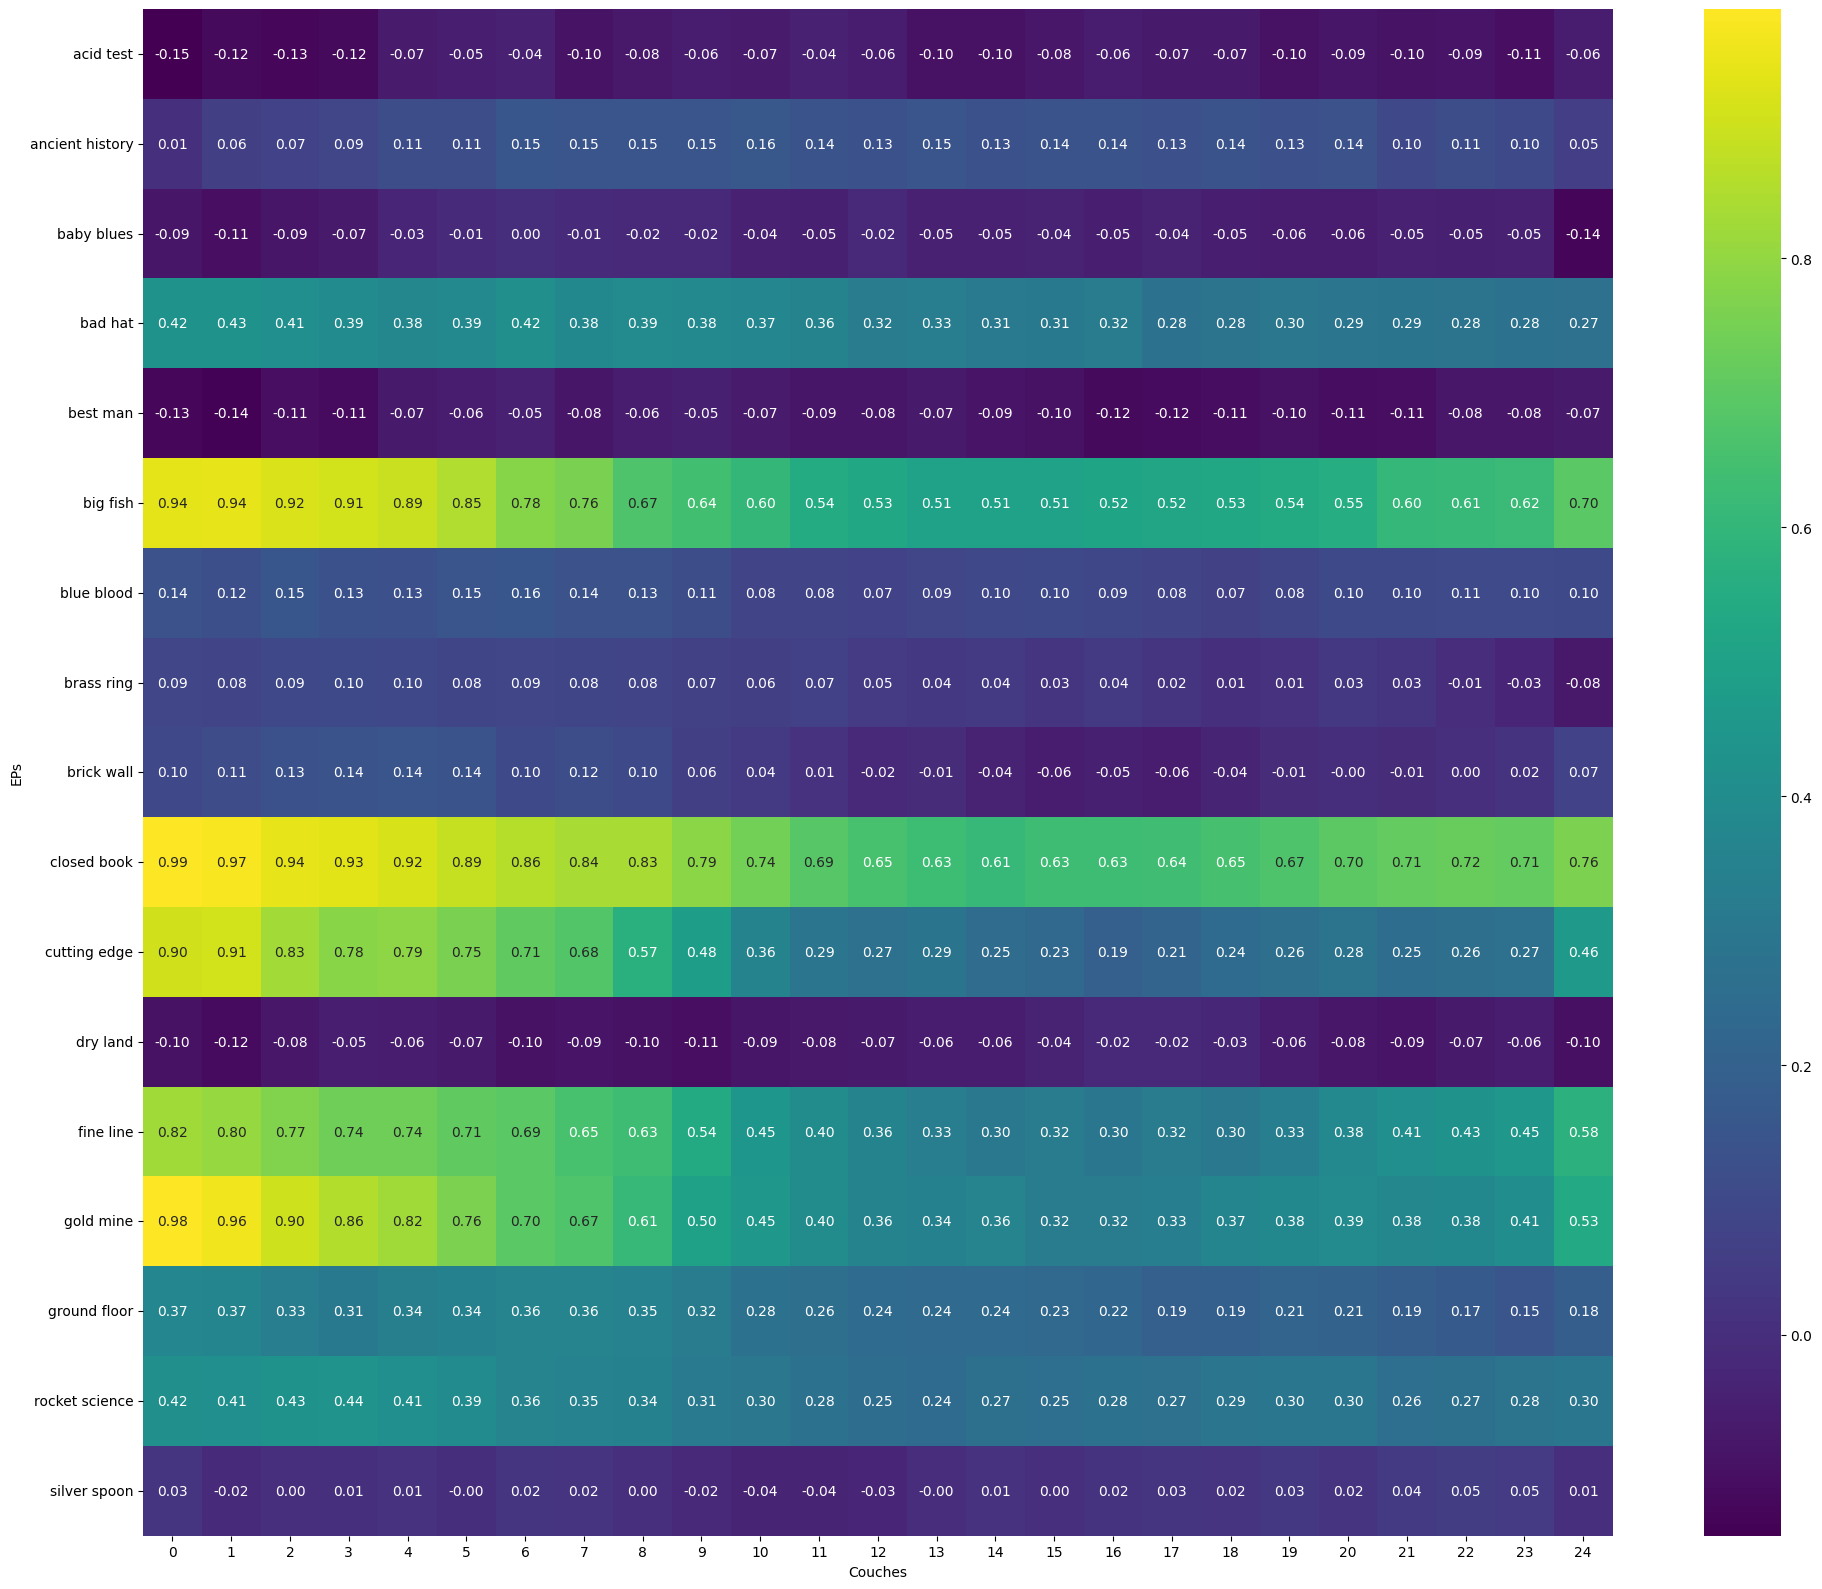

In [9]:
plt.figure(figsize=(20, 16))
sns.heatmap(result_df, cmap='viridis', annot=True, fmt=".2f")
# plt.title('C et NC similarités à travers toutes les couches (roberta-large)')
plt.xlabel('Couches')
plt.ylabel('EPs')
# plt.xticks(rotation=35)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(f"../results/plots/Heatmap-RoBERTa-large_more_than_3.pdf")
plt.show()